In [206]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVC
# from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from itertools import combinations

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")


In [207]:
#Import Libraries

import warnings
warnings.filterwarnings("ignore")
from pandas_datareader import data as wb
import os
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [208]:
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv  # those functions can be used directly
import numpy as np  # a package useful for numerical computations
import scipy.stats as st
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt   # all functions func in the package can be used as plt.func
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import os  # some terminal commands
import matplotlib #only needed to determine Matplotlib version number
import sklearn # sklearn is a popular statistical learning package; we use it to do linear regression
from sklearn import datasets 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Enable inline plotting
%matplotlib inline

In [381]:
# set display options
pd.options.display.max_rows, pd.options.display.max_columns = 10, 25
factor = pd.read_csv('5_factors.csv')
factor.index = factor['Time'].values
del factor['Time']
factor.dropna(inplace = True)
# factor = factor[-409:]
factor = factor.loc[198701:,:]
factor

Mkt-RF   SMB   HML   RMW   CMA    RF
198701   12.47 -1.51 -3.18  0.20 -1.09  0.42
198702    4.39  3.41 -5.99 -0.90 -2.76  0.43
198703    1.64  0.21  1.66  1.36  4.03  0.47
198704   -2.11 -1.55 -0.33 -0.46  1.22  0.44
198705    0.11 -0.59  0.13  0.52  1.32  0.38
...        ...   ...   ...   ...   ...   ...
202006    2.46  1.94 -2.22  0.04  0.34  0.01
202007    5.77 -3.03 -1.31  0.55  1.06  0.01
202008    7.63 -0.94 -2.95  4.27 -1.44  0.01
202009   -3.63  0.07 -2.56 -1.15 -1.77  0.01
202010   -2.10  4.76  3.88 -0.60 -0.53  0.01

[406 rows x 6 columns]

In [382]:
# # set display options
# pd.options.display.max_rows, pd.options.display.max_columns = 10, 25
# BTC_price_origin = pd.read_csv('HSI_Monthly.csv')
# BTC_price_origin.dropna(inplace = True)
# BTC_price_origin = BTC_price_origin[:-1]
# BTC_price_origin

BTC_price_origin = wb.get_data_yahoo('^HSI',start='1987-2-1', end='2020-11-1', interval='m')
BTC_price_origin

High           Low          Open         Close  \
Date                                                                 
1987-01-31   2879.000000   2585.199951   2585.199951   2877.899902   
1987-02-28   2939.100098   2629.300049   2894.300049   2713.800049   
1987-03-31   2785.500000   2589.500000   2695.899902   2659.899902   
1987-04-30   2950.800049   2685.399902   2685.399902   2950.800049   
1987-05-31   3179.000000   2934.100098   2934.100098   3178.199951   
...                  ...           ...           ...           ...   
2020-06-30  26782.619141  24526.910156  24563.570312  24595.349609   
2020-07-31  25847.109375  24167.789062  24566.810547  25177.050781   
2020-08-31  25254.140625  23124.250000  25085.669922  23459.050781   
2020-09-30  24970.589844  23674.519531  24039.390625  24107.419922   
2020-10-31  27040.410156  24232.660156  24274.830078  26341.490234   

                 Volume     Adj Close  
Date                                   
1987-01-31            0   2877.899902  
1987-02-28            0   2713.800049  
1987-03-31            0   2659.899902  
1987-04-30            0   2950.800049  
1987-05-31            0   3178.199951  
...                 ...           ...  
2020-06-30  48701717400  24595.349609  
2020-07-31  35256937100  25177.050781  
2020-08-31  38637026300  23459.050781  
2020-09-30  37826792700  24107.419922  
2020-10-31  56229675200  26341.490234  

[406 rows x 6 columns]

In [383]:
BTC_price_origin = BTC_price_origin[['Open','High','Low','Close','Volume']]
                                     
BTC_price_origin['Mkt-RF'] = factor['Mkt-RF'].values
BTC_price_origin['SMB'] = factor['SMB'].values
BTC_price_origin['HML'] = factor['HML'].values
BTC_price_origin['RMW'] = factor['RMW'].values
BTC_price_origin['CMA'] = factor['CMA'].values
BTC_price_origin['RF'] = factor['RF'].values
BTC_price_origin['Return-RF'] = (BTC_price_origin['Close'] - BTC_price_origin['Open']) / BTC_price_origin['Open']

# BTC_price_origin.index = BTC_price_origin['Time'].values
# del BTC_price_origin['Time']
BTC_price_origin

Open          High           Low         Close  \
Date                                                                 
1987-01-31   2585.199951   2879.000000   2585.199951   2877.899902   
1987-02-28   2894.300049   2939.100098   2629.300049   2713.800049   
1987-03-31   2695.899902   2785.500000   2589.500000   2659.899902   
1987-04-30   2685.399902   2950.800049   2685.399902   2950.800049   
1987-05-31   2934.100098   3179.000000   2934.100098   3178.199951   
...                  ...           ...           ...           ...   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234   

                 Volume  Mkt-RF   SMB   HML   RMW   CMA    RF  Return-RF  
Date                                                                      
1987-01-31            0   12.47 -1.51 -3.18  0.20 -1.09  0.42   0.113221  
1987-02-28            0    4.39  3.41 -5.99 -0.90 -2.76  0.43  -0.062364  
1987-03-31            0    1.64  0.21  1.66  1.36  4.03  0.47  -0.013354  
1987-04-30            0   -2.11 -1.55 -0.33 -0.46  1.22  0.44   0.098831  
1987-05-31            0    0.11 -0.59  0.13  0.52  1.32  0.38   0.083194  
...                 ...     ...   ...   ...   ...   ...   ...        ...  
2020-06-30  48701717400    2.46  1.94 -2.22  0.04  0.34  0.01   0.001294  
2020-07-31  35256937100    5.77 -3.03 -1.31  0.55  1.06  0.01   0.024840  
2020-08-31  38637026300    7.63 -0.94 -2.95  4.27 -1.44  0.01  -0.064843  
2020-09-30  37826792700   -3.63  0.07 -2.56 -1.15 -1.77  0.01   0.002830  
2020-10-31  56229675200   -2.10  4.76  3.88 -0.60 -0.53  0.01   0.085136  

[406 rows x 12 columns]

# CAPM

In [384]:
features = ['Mkt-RF']
target = ['Return-RF']

X = BTC_price_origin[features]
Y = BTC_price_origin[target]


model = linear_model.LinearRegression()
model.fit(X, Y)
Y_Pred = model.predict(X) 


In [385]:
r2_score(Y, Y_Pred)

6.862940618579394e-05

### Statistical Analysis

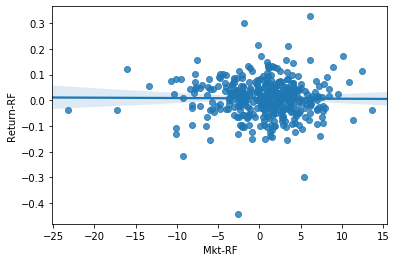

In [386]:
# Seaborn is a statistical data visualization package
import seaborn as sns
# Use seaborn to visualize the trend
sns.regplot(x="Mkt-RF", y = "Return-RF", data=BTC_price_origin)
plt.show()

In [387]:
# Import the object from linear_model
from sklearn.linear_model import LinearRegression
# Create an object
lm = LinearRegression()
# Fit 'Return-RF' and 'Mkt-RF'
# Here is another trick here. np.array(bos['CRIM']) returns a 1D array. But the coefficient matrix provided to lm.fit has to be 2D. So we use reshape to make it 2D.
lm.fit(X=np.array(BTC_price_origin['Mkt-RF']).reshape(-1,1), y=BTC_price_origin['Return-RF'])
# Report result
print('Intercept: ',  lm.intercept_)
print('Coefficient: ', lm.coef_)

Intercept:  0.007599360664226076
Coefficient:  [-0.00013567]


In [388]:
# Import statsmodels to do the linear regression
import statsmodels.api as sm
# We need the intercept, so add a constant column
X = sm.add_constant(np.array(BTC_price_origin['Mkt-RF']))
y = BTC_price_origin['Return-RF']
# Fit the model using OLS (ordinary least square, as opposed to generalized least square)
lm1 = sm.OLS(y,X).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02773
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.868
Time:                        00:24:20   Log-Likelihood:                 485.48
No. Observations:                 406   AIC:                            -967.0
Df Residuals:                     404   BIC:                            -958.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.004      2.063      0.0

In [389]:
# Consider two observation of 'Mkt-RF'
test = np.array([0.005, 0.006])
test = sm.add_constant(test)
# Use the estimated lm1 object to predict 'Return-RF' for the new 'Mkt-RF' data
lm1.predict(test)

array([0.00759868, 0.00759855])

### Regression diagonostics

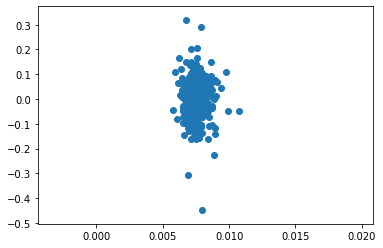

In [390]:
# The results object has an attribute resid, representing the residuals
residual = lm1.resid
fitted = lm1.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

The residuals seem to be i.i.d.; there is no trend in the fitted value. Next we check the QQ-plot (normal probability plot) for normality. Scipy has a function for that.

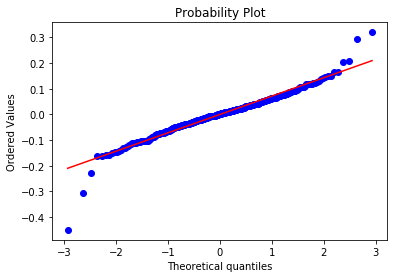

In [391]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

The normality assumption seem to be satisfied, with a heavy tail

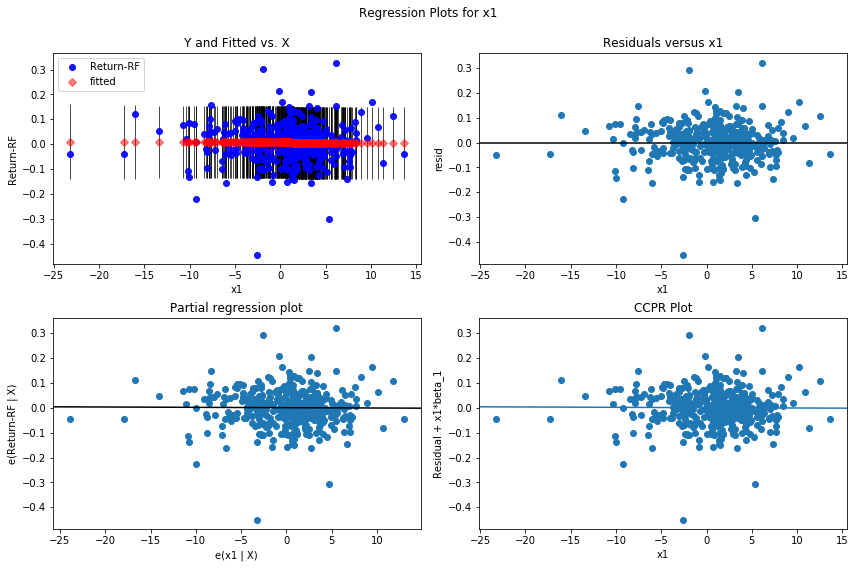

In [392]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm1, 'x1', fig=fig)
plt.show()

# Fama–French three-factor model

In [393]:
features = ['Mkt-RF','SMB','HML']
target = ['Return-RF']

X = BTC_price_origin[features]
Y = BTC_price_origin[target]


model = linear_model.LinearRegression()
model.fit(X, Y)
Y_Pred = model.predict(X) 


In [394]:
r2_score(Y, Y_Pred)

0.002061541863011329

### Statistical Analysis

In [395]:
# Specify the matrices
X = sm.add_constant(BTC_price_origin[features])
y = BTC_price_origin[target]
lm2 = sm.OLS(y,X).fit()
# Show results
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2768
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.842
Time:                        00:24:22   Log-Likelihood:                 485.88
No. Observations:                 406   AIC:                            -963.8
Df Residuals:                     402   BIC:                            -947.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.004      2.098      0.0

### Hypothesis testing on factors

In [396]:
print(lm2.f_test('SMB = 0'))

<F test: F=array([[0.00129867]]), p=0.9712707209177422, df_denom=402, df_num=1>


In [397]:
print(lm2.f_test('HML = 0'))

<F test: F=array([[0.79987097]]), p=0.37166708809759863, df_denom=402, df_num=1>


In [398]:
print(lm2.f_test('SMB = HML = 0'))

<F test: F=array([[0.40140291]]), p=0.6696482939439542, df_denom=402, df_num=2>


### Regression diagonostics

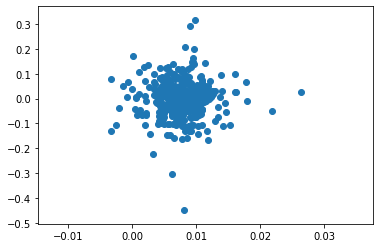

In [399]:
# The results object has an attribute resid, representing the residuals
residual = lm2.resid
fitted = lm2.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

The residuals seem to be i.i.d.; there is no trend in the fitted value. Next we check the QQ-plot (normal probability plot) for normality. Scipy has a function for that.

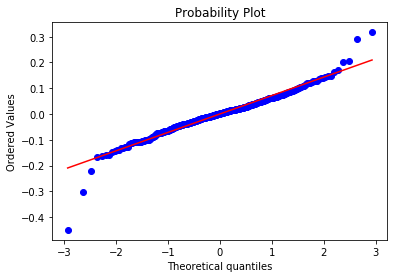

In [400]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

The normality assumption seem to be satisfied, with a heavy tail

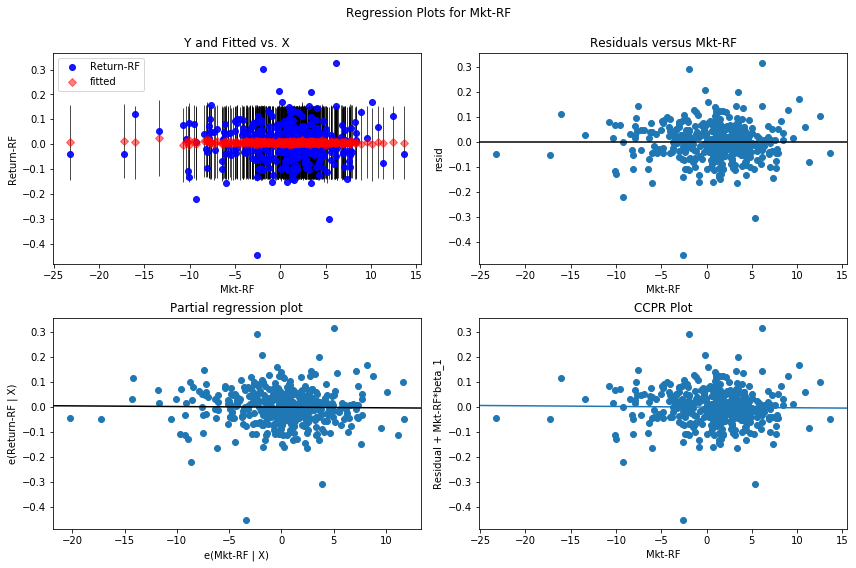

In [401]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm2, 'Mkt-RF', fig=fig)
plt.show()

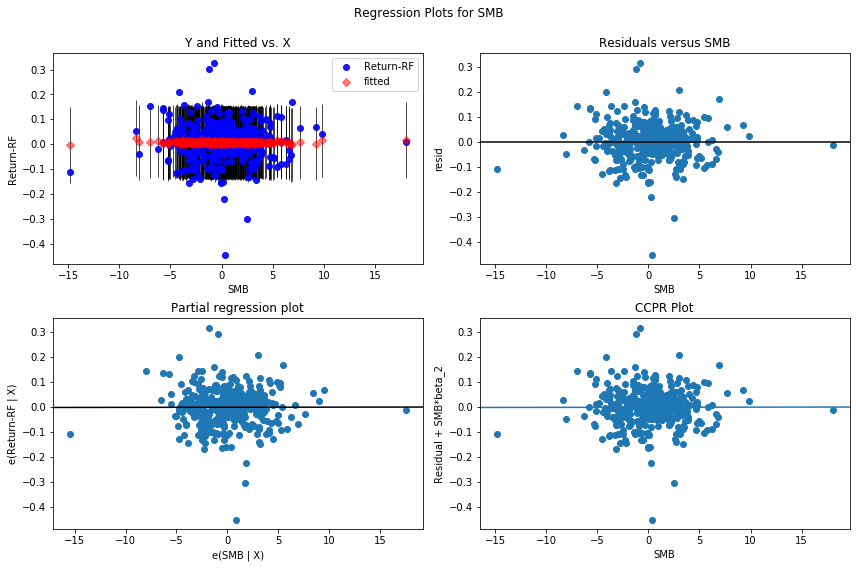

In [402]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm2, 'SMB', fig=fig)
plt.show()

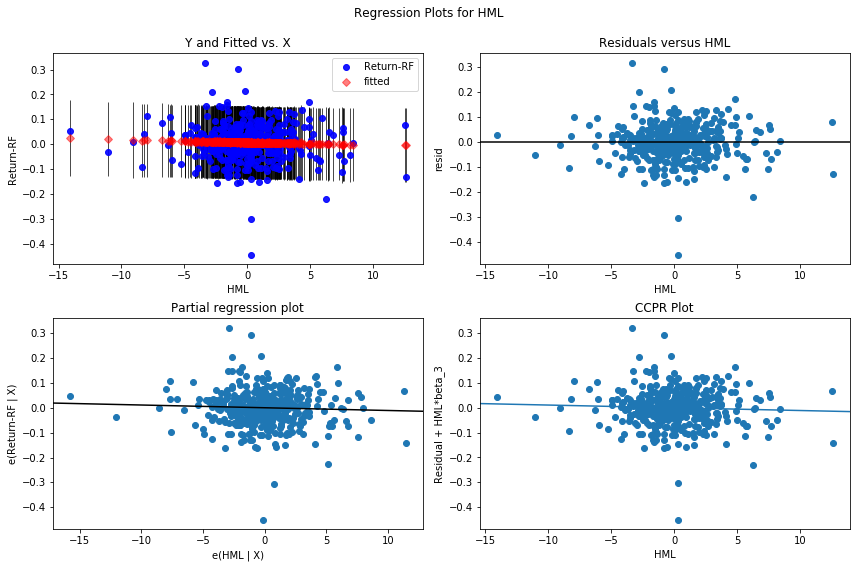

In [403]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm2, 'HML', fig=fig)
plt.show()

### Detecting Multicollinearity with VIF

In [404]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = BTC_price_origin[features].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(BTC_price_origin[features].values, i) 
                          for i in range(len(BTC_price_origin[features].columns))] 
  
vif_data

feature       VIF
0  Mkt-RF  1.081405
1     SMB  1.059271
2     HML  1.024584

# Fama–French five-factor model

In [405]:
features = ['Mkt-RF','SMB','HML','RMW','CMA']
target = ['Return-RF']

X = BTC_price_origin[features]
Y = BTC_price_origin[target]


model = linear_model.LinearRegression()
model.fit(X, Y)
Y_Pred = model.predict(X) 


In [406]:
r2_score(Y, Y_Pred)

0.006713100343744838

### Statistical Analysis

In [407]:
# Specify the matrices
X = sm.add_constant(BTC_price_origin[features])
y = BTC_price_origin[target]
lm3 = sm.OLS(y,X).fit()
# Show results
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5407
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.745
Time:                        00:24:27   Log-Likelihood:                 486.83
No. Observations:                 406   AIC:                            -961.7
Df Residuals:                     400   BIC:                            -937.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.004      2.267      0.0

### Hypothesis testing on factors

In [408]:
print(lm3.f_test('Mkt-RF = 0'))

<F test: F=array([[0.2707863]]), p=0.6030926957398871, df_denom=400, df_num=1>


In [409]:
print(lm3.f_test('SMB = 0'))

<F test: F=array([[0.26358836]]), p=0.60794900463773, df_denom=400, df_num=1>


In [410]:
print(lm3.f_test('HML = 0'))

<F test: F=array([[0.12477303]]), p=0.7241004099876814, df_denom=400, df_num=1>


In [411]:
print(lm3.f_test('RMW = 0'))

<F test: F=array([[1.82238703]]), p=0.1777928090190581, df_denom=400, df_num=1>


In [412]:
print(lm3.f_test('CMA = 0'))

<F test: F=array([[0.00570547]]), p=0.9398271513089791, df_denom=400, df_num=1>


In [413]:
print(lm3.f_test('SMB = HML = RMW = CMA = 0'))

<F test: F=array([[0.66893774]]), p=0.6138603381697852, df_denom=400, df_num=4>


### Regression diagonostics

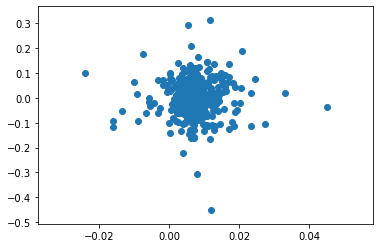

In [414]:
# The results object has an attribute resid, representing the residuals
residual = lm3.resid
fitted = lm3.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

The residuals seem to be i.i.d.; there is no trend in the fitted value. Next we check the QQ-plot (normal probability plot) for normality. Scipy has a function for that.

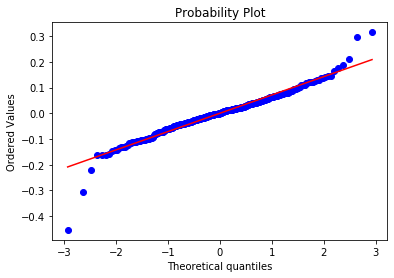

In [415]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

The normality assumption seem to be satisfied, with a heavy tail

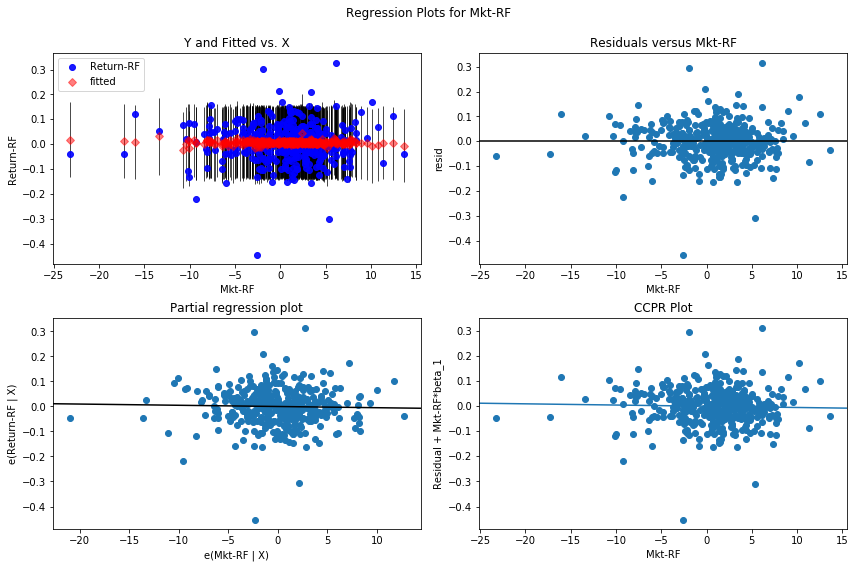

In [416]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm3, 'Mkt-RF', fig=fig)
plt.show()

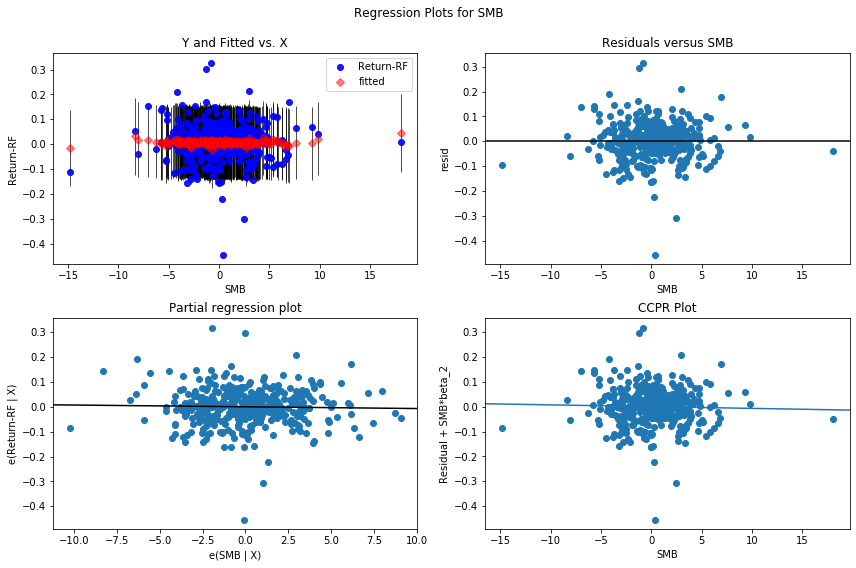

In [417]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm3, 'SMB', fig=fig)
plt.show()

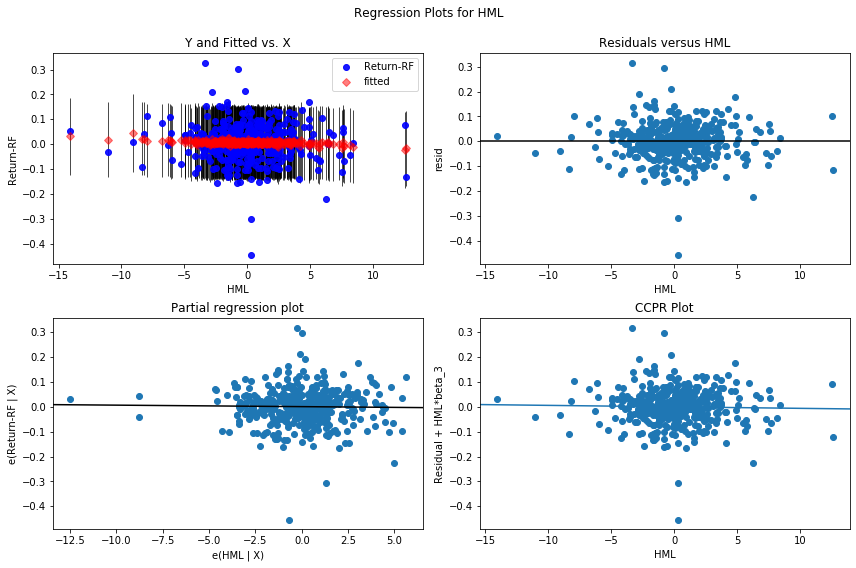

In [418]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm3, 'HML', fig=fig)
plt.show()

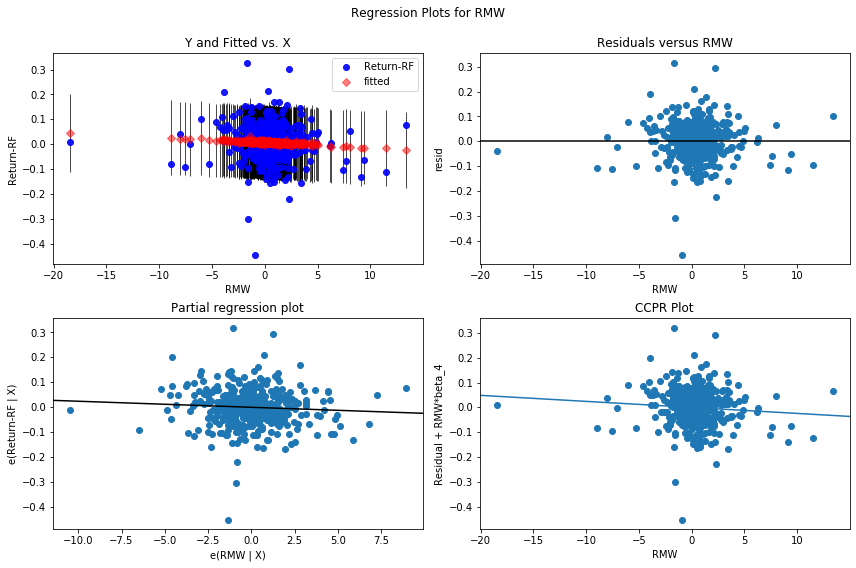

In [419]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm3, 'RMW', fig=fig)
plt.show()

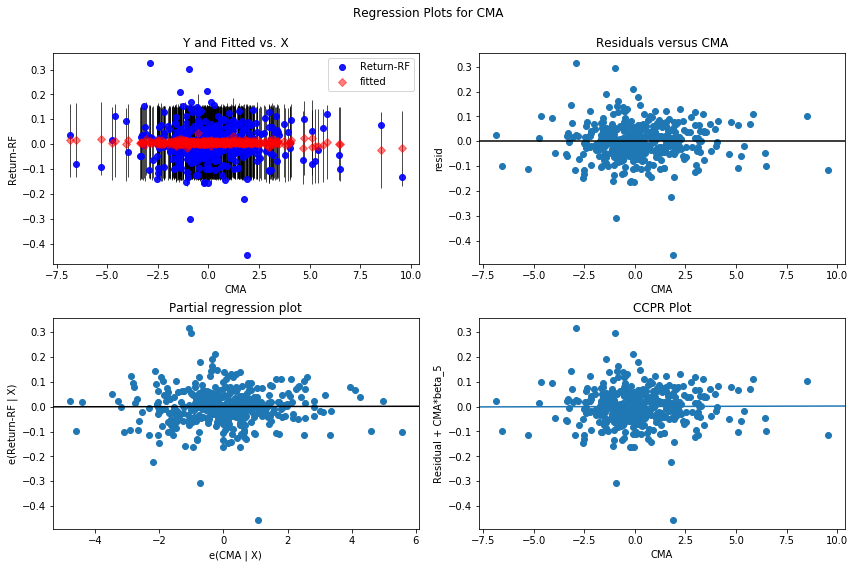

In [420]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm3, 'CMA', fig=fig)
plt.show()

### Detecting Multicollinearity with VIF

In [421]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = BTC_price_origin[features].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(BTC_price_origin[features].values, i) 
                          for i in range(len(BTC_price_origin[features].columns))] 
  
vif_data

feature       VIF
0  Mkt-RF  1.260869
1     SMB  1.255893
2     HML  1.905279
3     RMW  1.444893
4     CMA  1.933027

# Technical Indicators

In [422]:
stock_high = BTC_price_origin['High']
stock_low = BTC_price_origin['Low']
stock_open = BTC_price_origin['Open']
stock_close = BTC_price_origin['Close']
stock_volume = BTC_price_origin['Volume']


# Oscillators and Trend Following Indicators

# 1. MACD and MACD HISTOGRAM

In [423]:
#Compute MACD and MACD Histogram
macd, macdsignal, macdhist = talib.MACD(stock_close, fastperiod=26, slowperiod=12, signalperiod=9)

dict = {'MACD': macd, 'MSIG': macdsignal}
macdata = []
macdata = pd.DataFrame(data=dict)
macdata.dropna(inplace=True)

macdata['MACD_Signal1'] = macdata.apply(lambda x : 1 if x['MACD'] > x['MSIG'] else 0, axis = 1)

n_days = len(macdata['MACD'])
Signal = macdata['MACD_Signal1'].values

psy = []


for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
macdata['MACD_Signal'] = psy

del macdata['MACD_Signal1']

dict = {'MHIST': macdhist, 'PrevMHIST': macdhist.shift(1)}
machdata = []
machdata = pd.DataFrame(data=dict)
machdata.dropna(inplace=True)

machdata['MHIST_Signal1'] = machdata['MHIST'] - machdata['PrevMHIST']

machdata.loc[machdata[machdata['MHIST'] > machdata['PrevMHIST']].index ,'MHIST_Signal1'] = 1
machdata.loc[machdata[machdata['MHIST'] < machdata['PrevMHIST']].index ,'MHIST_Signal1'] = -1

n_days = len(machdata['MHIST'])
Signal = machdata['MHIST_Signal1'].values
psy = []

for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
    elif Signal[d] == -1:
        psycology = -1
        psy.append(psycology)
        
machdata['MHIST_Signal'] = psy

del machdata['MHIST_Signal1']


In [424]:
macdata

MACD        MSIG  MACD_Signal
Date                                           
1989-10-31  -40.151346  -51.603627            1
1989-11-30  -24.928536  -46.268609            1
1989-12-31  -19.498374  -40.914562            1
1990-01-31    0.964548  -32.538740            1
1990-02-28   20.575503  -21.915891            1
...                ...         ...          ...
2020-06-30 -788.972039 -407.208321            0
2020-07-31 -746.577139 -475.082084            0
2020-08-31 -841.902193 -548.446106            0
2020-09-30 -855.270982 -609.811081            0
2020-10-31 -677.781992 -623.405264            0

[373 rows x 3 columns]

In [425]:
macdata[macdata['MACD_Signal'] == 1]

MACD         MSIG  MACD_Signal
Date                                             
1989-10-31   -40.151346   -51.603627            1
1989-11-30   -24.928536   -46.268609            1
1989-12-31   -19.498374   -40.914562            1
1990-01-31     0.964548   -32.538740            1
1990-02-28    20.575503   -21.915891            1
...                 ...          ...          ...
2018-01-31  2129.136522  1423.115558            1
2018-02-28  2117.643740  1562.021195            1
2018-03-31  2141.549221  1677.926800            1
2018-04-30  2108.759842  1764.093408            1
2018-05-31  1938.307558  1798.936238            1

[228 rows x 3 columns]

In [426]:
machdata

MHIST   PrevMHIST  MHIST_Signal
Date                                            
1989-11-30   21.340073   11.452281             1
1989-12-31   21.416188   21.340073             1
1990-01-31   33.503288   21.416188             1
1990-02-28   42.491394   33.503288             1
1990-03-31   43.161686   42.491394             1
...                ...         ...           ...
2020-06-30 -381.763719 -460.612245             1
2020-07-31 -271.495055 -381.763719             1
2020-08-31 -293.456087 -271.495055            -1
2020-09-30 -245.459901 -293.456087             1
2020-10-31  -54.376729 -245.459901             1

[372 rows x 3 columns]

In [427]:
machdata[machdata['MHIST_Signal'] == -1]

MHIST   PrevMHIST  MHIST_Signal
Date                                            
1990-07-31   62.343341   80.183650            -1
1990-08-31   26.531101   62.343341            -1
1990-09-30   16.817709   26.531101            -1
1990-10-31    7.659927   16.817709            -1
1990-11-30    4.673681    7.659927            -1
...                ...         ...           ...
2020-01-31 -263.305332 -246.036480            -1
2020-02-29 -422.920141 -263.305332            -1
2020-03-31 -434.814009 -422.920141            -1
2020-04-30 -526.230991 -434.814009            -1
2020-08-31 -293.456087 -271.495055            -1

[180 rows x 3 columns]

In [428]:
machdata['MACDH'] = machdata['MHIST'] - machdata['PrevMHIST']
machdata

MHIST   PrevMHIST  MHIST_Signal       MACDH
Date                                                        
1989-11-30   21.340073   11.452281             1    9.887792
1989-12-31   21.416188   21.340073             1    0.076115
1990-01-31   33.503288   21.416188             1   12.087099
1990-02-28   42.491394   33.503288             1    8.988106
1990-03-31   43.161686   42.491394             1    0.670292
...                ...         ...           ...         ...
2020-06-30 -381.763719 -460.612245             1   78.848526
2020-07-31 -271.495055 -381.763719             1  110.268664
2020-08-31 -293.456087 -271.495055            -1  -21.961032
2020-09-30 -245.459901 -293.456087             1   47.996186
2020-10-31  -54.376729 -245.459901             1  191.083172

[372 rows x 4 columns]

# 2. Average Directional Index (ADX)

In [429]:
#Compute Average Directional Index (ADX)
adx = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)

dict = {'Close': stock_close, 'ADX': adx }

adxdata = []
adxdata = pd.DataFrame(data=dict)
adxdata.dropna(inplace=True)

adxdata['adx1'] = adxdata.apply(lambda x : 1 if x['ADX'] > 25 else 0, axis=1)
adxdata['adx2'] = adxdata.apply(lambda x : -1 if x['ADX'] < 20 else 0, axis=1)

adxdata['Signw'] = adxdata.apply(lambda x : x['adx1'] + x['adx2'] , axis=1)

n_days = len(adxdata['ADX'])
Signal = adxdata['Signw'].values
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = -1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
        
adxdata['Trend'] = psy

del adxdata['Signw']
del adxdata['adx1']
del adxdata['adx2']


In [430]:
adxdata

Close        ADX  Trend
Date                                      
1989-04-30   2743.899902   7.853138     -1
1989-05-31   2273.899902   8.734179     -1
1989-06-30   2571.100098   9.552288     -1
1989-07-31   2508.600098  10.060231     -1
1989-08-31   2758.199951  10.107371     -1
...                  ...        ...    ...
2020-06-30  24595.349609  19.588596     -1
2020-07-31  25177.050781  19.470573     -1
2020-08-31  23459.050781  19.842403     -1
2020-09-30  24107.419922  20.187674      0
2020-10-31  26341.490234  19.093151     -1

[379 rows x 3 columns]

# 3. Relative Strength Index (RSI)

In [431]:
#Compute Bollinger Bands
rsi = talib.RSI(stock_close, timeperiod=14)

dict = {'Close': stock_close, 'RSI': rsi }

rsidata = []
rsidata = pd.DataFrame(data=dict)
rsidata.dropna(inplace=True)
rsidata['Psycology'] = 0


#Generate the Long and Short Signals
n_days = len(rsidata['RSI'])
cash = 1
stock = 0

position = []

RSI = rsidata['RSI'].values


for d in range(0, n_days):
    
    # Long if spread < lower band & if not bought yet
    if RSI[d] < 30 and cash == 1:
        signal = 1
        cash = 0
        stock = 1
        position.append(signal)
        
        
    # Take Profit if spread > moving average & if already bought
    elif RSI[d] > 50 and stock == 1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
        
    # Short if spread > upper band and no current position
    elif RSI[d] > 70 and cash == 1:
        signal = -1
        cash = 0
        stock = -1
        position.append(signal)
        

    # Take Profit if spread < moving average & if already short
    elif RSI[d] < 50 and stock == -1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
    
    else:
        signal = 0
        position.append(signal)
        
rsidata['Position1'] = position
rsidata['Position1'] = rsidata['Position1'].replace(to_replace=0, method= 'ffill')
rsidata['Position1'] = rsidata['Position1'].replace(3,0)
rsidata['Position'] = rsidata['Position1']

del rsidata['Position1']

t_days = len(rsidata['RSI'])
Signal = rsidata['Position'].values
pos = []

for d in range(0, t_days):
    if Signal[d] == 0:
        strategy = 0
        pos.append(strategy)
    
    elif Signal[d] == 1:
        strategy = 1
        pos.append(strategy)
    
    elif Signal[d] == -1:
        strategy = -1
        pos.append(strategy)

rsidata['Psycology'] = pos


In [432]:
rsidata

Close        RSI  Psycology  Position
Date                                                    
1988-03-31   2602.899902  46.354139          0         0
1988-04-30   2496.699951  44.989806          0         0
1988-05-31   2671.500000  47.717468          0         0
1988-06-30   2678.899902  47.835389          0         0
1988-07-31   2443.800049  44.408405          0         0
...                  ...        ...        ...       ...
2020-06-30  24595.349609  44.773509          0         0
2020-07-31  25177.050781  46.809067          0         0
2020-08-31  23459.050781  41.897378          0         0
2020-09-30  24107.419922  44.273908          0         0
2020-10-31  26341.490234  51.617303          0         0

[392 rows x 4 columns]

# Volatility Indicators

# 4. Bollinger Bands

In [433]:
#Compute Bollinger Bands
upper, middle, lower = talib.BBANDS(stock_close, timeperiod=26)

dict = {'Close': stock_close, 'Middle': middle, 'Upper': upper, 'Lower': lower }

bbdata = []
bbdata = pd.DataFrame(data=dict)
bbdata.dropna(inplace=True)

#Generate the Long and Short Signals
n_days = len(bbdata['Middle'])
cash = 1
stock = 0

position = []

spread = bbdata['Close'].values
ma = bbdata['Middle'].values
upper_band = bbdata['Upper'].values
lower_band = bbdata['Lower'].values

for d in range(0, n_days):
    
    # Long if spread < lower band & if not bought yet
    if spread[d] < lower_band[d] and cash == 1:
        signal = 1
        cash = 0
        stock = 1
        position.append(signal)
        
        
    # Take Profit if spread > moving average & if already bought
    elif spread[d] > ma[d] and stock == 1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
        
    # Short if spread > upper band and no current position
    elif spread[d] > upper_band[d] and cash == 1:
        signal = -1
        cash = 0
        stock = -1
        position.append(signal)
        

    # Take Profit if spread < moving average & if already short
    elif spread[d] < ma[d] and stock == -1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
    
    else:
        signal = 0
        position.append(signal)
        
bbdata['Position1'] = position
bbdata['Position1'] = bbdata['Position1'].replace(to_replace=0, method= 'ffill')
bbdata['Position1'] = bbdata['Position1'].replace(3,0)
bbdata['Position'] = bbdata['Position1']

del bbdata['Position1']

t_days = len(bbdata['Middle'])
Signal = bbdata['Position'].values
pos = []

for d in range(0, t_days):
    if Signal[d] == 0:
        strategy = 0
        pos.append(strategy)
    
    elif Signal[d] == 1:
        strategy = 1
        pos.append(strategy)
    
    elif Signal[d] == -1:
        strategy = -1
        pos.append(strategy)

bbdata['Strategy'] = pos


In [434]:
bbdata

Close        Middle         Upper         Lower  Position  \
Date                                                                           
1989-02-28   3005.000000   2762.773053   3607.294276   1918.251829         0   
1989-03-31   3116.000000   2771.930749   3626.352665   1917.508833         0   
1989-04-30   2743.899902   2773.088435   3627.273695   1918.903176         0   
1989-05-31   2273.899902   2758.242281   3632.951719   1883.532844         0   
1989-06-30   2571.100098   2743.638437   3617.679145   1869.597730         0   
...                  ...           ...           ...           ...       ...   
2020-06-30  24595.349609  26731.865685  30259.827946  23203.903424         1   
2020-07-31  25177.050781  26586.555739  30046.836131  23126.275348         1   
2020-08-31  23459.050781  26389.480394  29954.560285  22824.400502         1   
2020-09-30  24107.419922  26244.052284  29860.773501  22627.331066         1   
2020-10-31  26341.490234  26188.397311  29752.490702  22624.303919         0   

            Strategy  
Date                  
1989-02-28         0  
1989-03-31         0  
1989-04-30         0  
1989-05-31         0  
1989-06-30         0  
...              ...  
2020-06-30         1  
2020-07-31         1  
2020-08-31         1  
2020-09-30         1  
2020-10-31         0  

[381 rows x 6 columns]

In [435]:
bbdata[bbdata['Strategy'] == -1]

Close        Middle         Upper         Lower  Position  \
Date                                                                           
1990-05-31   3278.000000   2774.623066   3261.430308   2287.815823        -1   
1990-06-30   3438.000000   2810.826914   3347.071320   2274.582508        -1   
1990-07-31   3087.000000   2826.807683   3370.208227   2283.407139        -1   
1991-01-31   3552.000000   2942.046152   3490.833683   2393.258621        -1   
1991-02-28   3745.000000   2967.896156   3596.426651   2339.365661        -1   
...                  ...           ...           ...           ...       ...   
2018-04-30  30468.560547  25812.048152  32974.393786  18649.702518        -1   
2018-05-31  28955.109375  26115.435021  33114.506034  19116.364008        -1   
2018-06-30  28583.009766  26414.201172  33140.612289  19687.790054        -1   
2018-07-31  27888.550781  26687.054312  33044.913983  20329.194641        -1   
2018-08-31  27788.519531  26913.867788  32985.523798  20842.211779        -1   

            Strategy  
Date                  
1990-05-31        -1  
1990-06-30        -1  
1990-07-31        -1  
1991-01-31        -1  
1991-02-28        -1  
...              ...  
2018-04-30        -1  
2018-05-31        -1  
2018-06-30        -1  
2018-07-31        -1  
2018-08-31        -1  

[154 rows x 6 columns]

In [436]:
bbdata['BB'] = (bbdata['Close'] - bbdata['Middle'])/(bbdata['Upper'] - bbdata['Lower'])
bbdata

Close        Middle         Upper         Lower  Position  \
Date                                                                           
1989-02-28   3005.000000   2762.773053   3607.294276   1918.251829         0   
1989-03-31   3116.000000   2771.930749   3626.352665   1917.508833         0   
1989-04-30   2743.899902   2773.088435   3627.273695   1918.903176         0   
1989-05-31   2273.899902   2758.242281   3632.951719   1883.532844         0   
1989-06-30   2571.100098   2743.638437   3617.679145   1869.597730         0   
...                  ...           ...           ...           ...       ...   
2020-06-30  24595.349609  26731.865685  30259.827946  23203.903424         1   
2020-07-31  25177.050781  26586.555739  30046.836131  23126.275348         1   
2020-08-31  23459.050781  26389.480394  29954.560285  22824.400502         1   
2020-09-30  24107.419922  26244.052284  29860.773501  22627.331066         1   
2020-10-31  26341.490234  26188.397311  29752.490702  22624.303919         0   

            Strategy        BB  
Date                            
1989-02-28         0  0.143411  
1989-03-31         0  0.201346  
1989-04-30         0 -0.017086  
1989-05-31         0 -0.276859  
1989-06-30         0 -0.098702  
...              ...       ...  
2020-06-30         1 -0.302797  
2020-07-31         1 -0.203669  
2020-08-31         1 -0.410991  
2020-09-30         1 -0.295383  
2020-10-31         0  0.021477  

[381 rows x 7 columns]

# 5. ATR

In [437]:
ATR = talib.ATR(stock_high, stock_low, stock_close, timeperiod=20)

dict = {'ATR': ATR}

atrdata = pd.DataFrame(data=dict)
atrdata.dropna(inplace=True)

In [438]:
atrdata

ATR
Date                   
1988-09-30   321.180005
1988-10-31   311.521005
1988-11-30   300.364950
1988-12-31   304.621702
1989-01-31   299.255619
...                 ...
2020-06-30  2208.189556
2020-07-31  2181.746094
2020-08-31  2179.153321
2020-09-30  2145.772608
2020-10-31  2185.133489

[386 rows x 1 columns]

# Volume Indicators

# 6. Force Index

In [439]:
#Force Index Function


def ForceIndex(Volume, Close):
    dict = {'Volume': Volume, 'Close': Close}
    df = pd.DataFrame(data=dict)
    df.dropna(inplace=True)
    
    FI = df['Volume']*(df['Close'] - df['Close'].shift(1))
    
    return FI

#Compute Force Index
fi = ForceIndex(stock_volume,stock_close)

efi = talib.EMA(fi, timeperiod=13)

dict = {'Close': stock_close, 'EFI': efi }

efidata = []
efidata = pd.DataFrame(data=dict)
efidata.dropna(inplace=True)


efidata['efi_sign'] = efidata.apply(lambda x : 1 if x['EFI'] > 0 else -1, axis=1)

n_days = len(efidata['EFI'])
Signal = efidata['efi_sign'].values
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = -1
        psy.append(psycology)
      
efidata['Psycology'] = psy

del efidata['efi_sign']


In [440]:
efidata

Close           EFI  Psycology
Date                                             
1988-02-29   2544.000000  0.000000e+00         -1
1988-03-31   2602.899902  0.000000e+00         -1
1988-04-30   2496.699951  0.000000e+00         -1
1988-05-31   2671.500000  0.000000e+00         -1
1988-06-30   2678.899902  0.000000e+00         -1
...                  ...           ...        ...
2020-06-30  24595.349609 -1.240001e+13         -1
2020-07-31  25177.050781 -7.698725e+12         -1
2020-08-31  23459.050781 -1.608154e+13         -1
2020-09-30  24107.419922 -1.028050e+13         -1
2020-10-31  26341.490234  9.134007e+12          1

[393 rows x 3 columns]

# 7. Volume

In [441]:
voldata = pd.DataFrame()
voldata['Volume'] = stock_volume

voldata.dropna(inplace=True)
voldata

Volume
Date                   
1987-01-31            0
1987-02-28            0
1987-03-31            0
1987-04-30            0
1987-05-31            0
...                 ...
2020-06-30  48701717400
2020-07-31  35256937100
2020-08-31  38637026300
2020-09-30  37826792700
2020-10-31  56229675200

[406 rows x 1 columns]

# 8. Volume_Change (Deleted due to insignifant in Statistical testing)

In [442]:
# voldata['Volume_Diff'] = talib.SMA(stock_volume, timeperiod=6) - talib.SMA(stock_volume, timeperiod=12)

# voldata.dropna(inplace=True)
# voldata

In [443]:
len(macdata), len(machdata), len(adxdata), len(rsidata), len(bbdata), len(atrdata), len(efidata), len(voldata)

(373, 372, 379, 392, 381, 386, 393, 406)

In [444]:
BTC_price_origin.iloc[-min(len(macdata), len(machdata), len(adxdata), len(rsidata), len(bbdata), len(atrdata), len(efidata))::]

Open          High           Low         Close  \
Date                                                                 
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000   
...                  ...           ...           ...           ...   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234   

                 Volume  Mkt-RF   SMB   HML   RMW   CMA    RF  Return-RF  
Date                                                                      
1989-11-30            0    1.03 -1.32 -1.14 -0.97  1.47  0.69   0.032242  
1989-12-31            0    1.16 -2.31  0.24 -0.06  1.44  0.61  -0.029760  
1990-01-31            0   -7.85 -1.33  0.85 -1.13  1.32  0.57   0.073064  
1990-02-28            0    1.11  1.19  0.63 -0.20 -0.64  0.57   0.015588  
1990-03-31            0    1.83  1.65 -2.89  2.18 -1.03  0.64  -0.015349  
...                 ...     ...   ...   ...   ...   ...   ...        ...  
2020-06-30  48701717400    2.46  1.94 -2.22  0.04  0.34  0.01   0.001294  
2020-07-31  35256937100    5.77 -3.03 -1.31  0.55  1.06  0.01   0.024840  
2020-08-31  38637026300    7.63 -0.94 -2.95  4.27 -1.44  0.01  -0.064843  
2020-09-30  37826792700   -3.63  0.07 -2.56 -1.15 -1.77  0.01   0.002830  
2020-10-31  56229675200   -2.10  4.76  3.88 -0.60 -0.53  0.01   0.085136  

[372 rows x 12 columns]

# End of Technical indicators

In [446]:
BTC = BTC_price_origin.copy()

# compute Return
BTC['Return'] = BTC.Close.diff(periods=1)/BTC.Close.shift(periods=1)
BTC['Close_1M'] = BTC.Close.shift(periods=1)

# change index into date format
BTC.index

DatetimeIndex(['1987-01-31', '1987-02-28', '1987-03-31', '1987-04-30',
               '1987-05-31', '1987-06-30', '1987-07-31', '1987-08-31',
               '1987-09-30', '1987-10-31',
               ...
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=406, freq=None)

In [447]:
# feature list
predictor_variables = ['6M']

# create all features
def ShiftNum(var):

    if var[1]=='M':
        return int(var[0])*1
    elif var[1]=='Y':
        return int(var[0])*12
    else:
        return("Please give a str whose format is xD, xW, xM, xY.")

# shift Return by the value of each feature
for var in predictor_variables:
    name = 'Return_' + var
    BTC[name] = BTC.Close_1M.diff(periods = ShiftNum(var))/BTC.Close_1M.shift(periods = ShiftNum(var))

BTC['Gain'] = BTC['Close'] - BTC['Open']
# drop the first 250 rows (cuz they do not have feature '1Y')
BTC = BTC.dropna()
BTC

Open          High           Low         Close  \
Date                                                                 
1987-08-31   3644.300049   3943.600098   3571.399902   3943.600098   
1987-09-30   3949.699951   3949.699951   2202.800049   2204.500000   
1987-10-31   2224.800049   2317.500000   1960.900024   2138.399902   
1987-11-30   2086.699951   2379.100098   1894.900024   2302.800049   
1987-12-31   2238.100098   2512.199951   2238.100098   2409.699951   
...                  ...           ...           ...           ...   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234   

                 Volume  Mkt-RF   SMB   HML   RMW   CMA    RF  Return-RF  \
Date                                                                       
1987-08-31            0    3.52 -0.90 -0.90  2.03 -1.59  0.47   0.082128   
1987-09-30            0   -2.59  0.37  0.28 -0.90  1.89  0.45  -0.441856   
1987-10-31            0  -23.24 -8.09  4.23  2.01  2.39  0.60  -0.038835   
1987-11-30            0   -7.77  2.83  3.14 -1.92  0.71  0.35   0.103561   
1987-12-31            0    6.81  0.09 -4.49  3.01 -2.36  0.39   0.076672   
...                 ...     ...   ...   ...   ...   ...   ...        ...   
2020-06-30  48701717400    2.46  1.94 -2.22  0.04  0.34  0.01   0.001294   
2020-07-31  35256937100    5.77 -3.03 -1.31  0.55  1.06  0.01   0.024840   
2020-08-31  38637026300    7.63 -0.94 -2.95  4.27 -1.44  0.01  -0.064843   
2020-09-30  37826792700   -3.63  0.07 -2.56 -1.15 -1.77  0.01   0.002830   
2020-10-31  56229675200   -2.10  4.76  3.88 -0.60 -0.53  0.01   0.085136   

              Return      Close_1M  Return_6M         Gain  
Date                                                        
1987-08-31  0.091896   3611.699951   0.254978   299.300049  
1987-09-30 -0.440993   3943.600098   0.453165 -1745.199951  
1987-10-31 -0.029984   2204.500000  -0.171209   -86.400146  
1987-11-30  0.076880   2138.399902  -0.275315   216.100098  
1987-12-31  0.046422   2302.800049  -0.275439   171.599854  
...              ...           ...        ...          ...  
2020-06-30  0.006884  24427.189453  -0.133473    31.779297  
2020-07-31  0.023651  24595.349609  -0.065265   610.240234  
2020-08-31 -0.068237  25177.050781  -0.036467 -1626.619141  
2020-09-30  0.027638  23459.050781  -0.006119    68.029297  
2020-10-31  0.092671  24107.419922  -0.021757  2066.660156  

[399 rows x 16 columns]

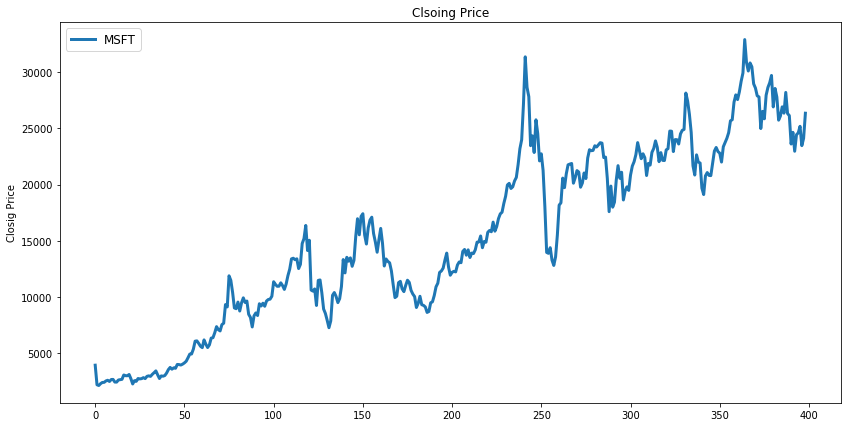

In [448]:
plt.figure(figsize=(14, 7))
plt.plot(range(len(BTC)), BTC['Close'], label='MSFT', lw=3)
plt.title('Clsoing Price')
plt.ylabel('Closig Price')
plt.legend(loc='upper left', fontsize=12)

Average Half-Year Return:  0.04751687472795444
Average Half-year Std:  0.17764540885167268


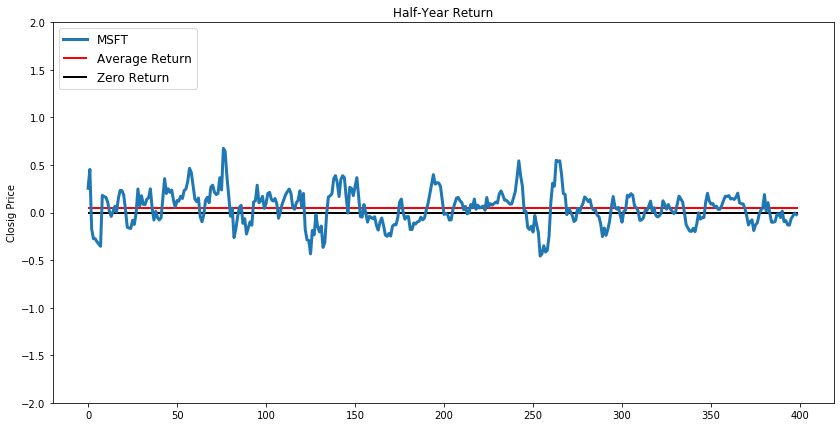

In [449]:
plt.figure(figsize=(14, 7))
plt.plot(range(len(BTC)), BTC['Return_6M'], label='MSFT', lw=3)
plt.hlines(BTC['Return_6M'].mean(),0, len(BTC), label='Average Return', color ='r', lw=2)
plt.hlines(0,0, len(BTC), label='Zero Return', color ='k', lw=2)
plt.title('Half-Year Return')
plt.ylabel('Closig Price')
plt.ylim(-2, 2)
plt.legend(loc='upper left', fontsize=12)
print('Average Half-Year Return: ', BTC['Return_6M'].mean())
print('Average Half-year Std: ', BTC['Return_6M'].std())

Text(-75, 16, '100 test days')

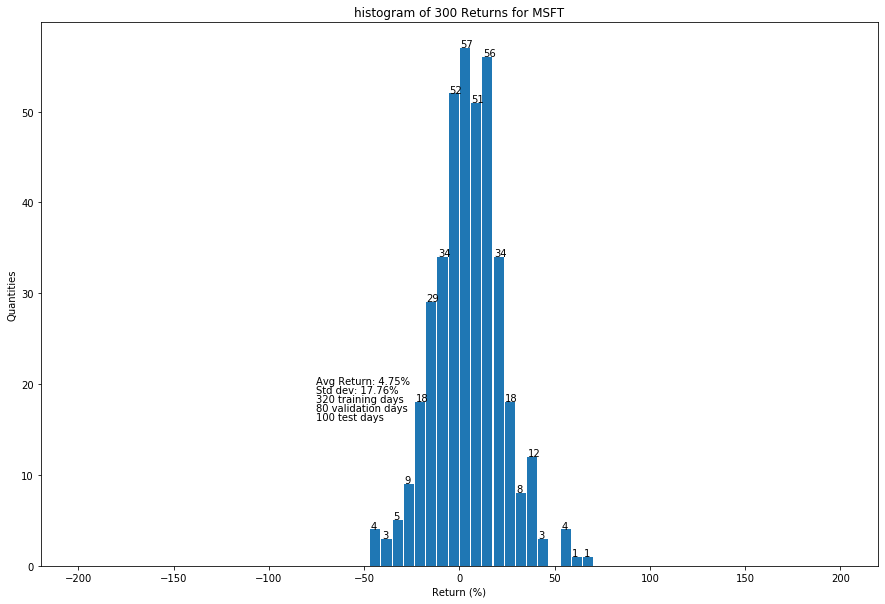

In [450]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-200, 200, 69)
a = plt.hist(BTC['Return_6M']*100, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 300 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')
# you should change the coordinates of the plot to make it look nice
plt.text(-75, 20, ("Avg Return: {0:.2f}%".format(BTC['Return_6M'].mean()*100)))
plt.text(-75, 19, ("Std dev: {0:.2f}%".format(BTC['Return_6M'].std()*100)))
plt.text(-75, 18, "320 training days")
plt.text(-75, 17, "80 validation days")
plt.text(-75, 16, "100 test days")

In [451]:
BTC.drop(['Close'], axis=1, inplace=True)
BTC

Open          High           Low       Volume  Mkt-RF  \
Date                                                                        
1987-08-31   3644.300049   3943.600098   3571.399902            0    3.52   
1987-09-30   3949.699951   3949.699951   2202.800049            0   -2.59   
1987-10-31   2224.800049   2317.500000   1960.900024            0  -23.24   
1987-11-30   2086.699951   2379.100098   1894.900024            0   -7.77   
1987-12-31   2238.100098   2512.199951   2238.100098            0    6.81   
...                  ...           ...           ...          ...     ...   
2020-06-30  24563.570312  26782.619141  24526.910156  48701717400    2.46   
2020-07-31  24566.810547  25847.109375  24167.789062  35256937100    5.77   
2020-08-31  25085.669922  25254.140625  23124.250000  38637026300    7.63   
2020-09-30  24039.390625  24970.589844  23674.519531  37826792700   -3.63   
2020-10-31  24274.830078  27040.410156  24232.660156  56229675200   -2.10   

             SMB   HML   RMW   CMA    RF  Return-RF    Return      Close_1M  \
Date                                                                          
1987-08-31 -0.90 -0.90  2.03 -1.59  0.47   0.082128  0.091896   3611.699951   
1987-09-30  0.37  0.28 -0.90  1.89  0.45  -0.441856 -0.440993   3943.600098   
1987-10-31 -8.09  4.23  2.01  2.39  0.60  -0.038835 -0.029984   2204.500000   
1987-11-30  2.83  3.14 -1.92  0.71  0.35   0.103561  0.076880   2138.399902   
1987-12-31  0.09 -4.49  3.01 -2.36  0.39   0.076672  0.046422   2302.800049   
...          ...   ...   ...   ...   ...        ...       ...           ...   
2020-06-30  1.94 -2.22  0.04  0.34  0.01   0.001294  0.006884  24427.189453   
2020-07-31 -3.03 -1.31  0.55  1.06  0.01   0.024840  0.023651  24595.349609   
2020-08-31 -0.94 -2.95  4.27 -1.44  0.01  -0.064843 -0.068237  25177.050781   
2020-09-30  0.07 -2.56 -1.15 -1.77  0.01   0.002830  0.027638  23459.050781   
2020-10-31  4.76  3.88 -0.60 -0.53  0.01   0.085136  0.092671  24107.419922   

            Return_6M         Gain  
Date                                
1987-08-31   0.254978   299.300049  
1987-09-30   0.453165 -1745.199951  
1987-10-31  -0.171209   -86.400146  
1987-11-30  -0.275315   216.100098  
1987-12-31  -0.275439   171.599854  
...               ...          ...  
2020-06-30  -0.133473    31.779297  
2020-07-31  -0.065265   610.240234  
2020-08-31  -0.036467 -1626.619141  
2020-09-30  -0.006119    68.029297  
2020-10-31  -0.021757  2066.660156  

[399 rows x 15 columns]

## Technical indicators (Signal)

In [452]:
# BTC = BTC_price_origin.copy()

# # compute Return
# BTC['Return'] = (BTC['Close'] - BTC['Open']) / BTC['Open']

# length = min(len(macdata), len(machdata), len(adxdata), len(rsidata), len(bbdata))

# BTC = BTC.iloc[-length::]
# BTC['MACD'] = macdata['MACD_Signal'].iloc[-length::].values
# BTC['MACDH'] = machdata['MHIST_Signal'].iloc[-length::].values
# BTC['ADX'] = adxdata['Trend'].iloc[-length::].values
# BTC['RSI'] = rsidata['Psycology'].iloc[-length::].values
# BTC['BB'] = bbdata['Strategy'].iloc[-length::].values
# BTC['ATR'] = atrdata['ATR'].iloc[-length::].values
# BTC['EFI'] = efidata['Psycology'].iloc[-length::].values
# BTC['Volume'] = voldata['Volume'].iloc[-length::].values
# BTC['Volume_Diff'] = voldata['Volume_Diff'].iloc[-length::].values

# BTC

## Technical indicators (Value)

In [453]:
BTC = BTC_price_origin.copy()

# compute Return
BTC['Return'] = (BTC['Close'] - BTC['Open']) / BTC['Open']

length = min(len(macdata), len(machdata), len(adxdata), len(rsidata), len(bbdata))

BTC = BTC.iloc[-length::]
BTC['MACD'] = macdata['MACD'].iloc[-length::].values
BTC['MACDH'] = machdata['MACDH'].iloc[-length::].values
BTC['ADX'] = adxdata['ADX'].iloc[-length::].values
BTC['RSI'] = rsidata['RSI'].iloc[-length::].values
BTC['BB'] = bbdata['BB'].iloc[-length::].values
BTC['ATR'] = atrdata['ATR'].iloc[-length::].values
BTC['EFI'] = efidata['EFI'].iloc[-length::].values
BTC['Volume'] = voldata['Volume'].iloc[-length::].values
# BTC['Volume_Diff'] = voldata['Volume_Diff'].iloc[-length::].values


BTC

Open          High           Low         Close  \
Date                                                                 
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000   
...                  ...           ...           ...           ...   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234   

                 Volume  Mkt-RF   SMB   HML   RMW   CMA    RF  Return-RF  \
Date                                                                       
1989-11-30            0    1.03 -1.32 -1.14 -0.97  1.47  0.69   0.032242   
1989-12-31            0    1.16 -2.31  0.24 -0.06  1.44  0.61  -0.029760   
1990-01-31            0   -7.85 -1.33  0.85 -1.13  1.32  0.57   0.073064   
1990-02-28            0    1.11  1.19  0.63 -0.20 -0.64  0.57   0.015588   
1990-03-31            0    1.83  1.65 -2.89  2.18 -1.03  0.64  -0.015349   
...                 ...     ...   ...   ...   ...   ...   ...        ...   
2020-06-30  48701717400    2.46  1.94 -2.22  0.04  0.34  0.01   0.001294   
2020-07-31  35256937100    5.77 -3.03 -1.31  0.55  1.06  0.01   0.024840   
2020-08-31  38637026300    7.63 -0.94 -2.95  4.27 -1.44  0.01  -0.064843   
2020-09-30  37826792700   -3.63  0.07 -2.56 -1.15 -1.77  0.01   0.002830   
2020-10-31  56229675200   -2.10  4.76  3.88 -0.60 -0.53  0.01   0.085136   

              Return        MACD       MACDH        ADX        RSI        BB  \
Date                                                                           
1989-11-30  0.032242  -24.928536    9.887792   8.959487  51.884135  0.210042   
1989-12-31 -0.029760  -19.498374    0.076115   8.348160  50.030164  0.106346   
1990-01-31  0.073064    0.964548   12.087099   8.133704  54.186627  0.312665   
1990-02-28  0.015588   20.575503    8.988106   8.105070  55.089983  0.337216   
1990-03-31 -0.015349   32.036217    0.670292   8.256505  53.919559  0.263924   
...              ...         ...         ...        ...        ...       ...   
2020-06-30  0.001294 -788.972039   78.848526  19.588596  44.773509 -0.302797   
2020-07-31  0.024840 -746.577139  110.268664  19.470573  46.809067 -0.203669   
2020-08-31 -0.064843 -841.902193  -21.961032  19.842403  41.897378 -0.410991   
2020-09-30  0.002830 -855.270982   47.996186  20.187674  44.273908 -0.295383   
2020-10-31  0.085136 -677.781992  191.083172  19.093151  51.617303  0.021477   

                    ATR           EFI  
Date                                   
1989-11-30   292.931025  0.000000e+00  
1989-12-31   286.134474  0.000000e+00  
1990-01-31   286.077750  0.000000e+00  
1990-02-28   280.023863  0.000000e+00  
1990-03-31   273.122669  0.000000e+00  
...                 ...           ...  
2020-06-30  2208.189556 -1.240001e+13  
2020-07-31  2181.746094 -7.698725e+12  
2020-08-31  2179.153321 -1.608154e+13  
2020-09-30  2145.772608 -1.028050e+13  
2020-10-31  2185.133489  9.134007e+12  

[372 rows x 20 columns]

In [454]:
BTC_Gain = pd.DataFrame()
BTC_Gain['Gain'] = BTC['Close'] - BTC['Open']
BTC_Gain.index = BTC.index
BTC_Gain

Gain
Date                   
1989-11-30    88.600098
1989-12-31   -84.399902
1990-01-31   201.000000
1990-02-28    46.000000
1990-03-31   -46.000000
...                 ...
2020-06-30    31.779297
2020-07-31   610.240234
2020-08-31 -1626.619141
2020-09-30    68.029297
2020-10-31  2066.660156

[372 rows x 1 columns]

In [455]:
# BTC.drop(['Open'], axis=1, inplace=True)
# BTC.drop(['High'], axis=1, inplace=True)
# BTC.drop(['Low'], axis=1, inplace=True)
# BTC.drop(['Close'], axis=1, inplace=True)
# BTC.drop(['Volume'], axis=1, inplace=True)
# BTC

In [456]:
# Expected value of the factor is assume to be t-1.

# BTC['MACD'] = BTC.MACD.shift(periods=1)
# BTC['MACDH'] = BTC.MACDH.shift(periods=1)
# BTC['ADX'] = BTC.ADX.shift(periods=1)
# BTC['RSI'] = BTC.RSI.shift(periods=1)
# BTC['BB'] = BTC.BB.shift(periods=1)
# BTC['ATR'] = BTC.ATR.shift(periods=1)
# BTC['EFI'] = BTC.EFI.shift(periods=1)

# BTC['Volume'] = BTC.Volume.shift(periods=1)
# BTC['Volume_Diff'] = BTC.Volume_Diff.shift(periods=1)



BTC = BTC.dropna()

In [457]:
BTC

Open          High           Low         Close  \
Date                                                                 
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000   
...                  ...           ...           ...           ...   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234   

                 Volume  Mkt-RF   SMB   HML   RMW   CMA    RF  Return-RF  \
Date                                                                       
1989-11-30            0    1.03 -1.32 -1.14 -0.97  1.47  0.69   0.032242   
1989-12-31            0    1.16 -2.31  0.24 -0.06  1.44  0.61  -0.029760   
1990-01-31            0   -7.85 -1.33  0.85 -1.13  1.32  0.57   0.073064   
1990-02-28            0    1.11  1.19  0.63 -0.20 -0.64  0.57   0.015588   
1990-03-31            0    1.83  1.65 -2.89  2.18 -1.03  0.64  -0.015349   
...                 ...     ...   ...   ...   ...   ...   ...        ...   
2020-06-30  48701717400    2.46  1.94 -2.22  0.04  0.34  0.01   0.001294   
2020-07-31  35256937100    5.77 -3.03 -1.31  0.55  1.06  0.01   0.024840   
2020-08-31  38637026300    7.63 -0.94 -2.95  4.27 -1.44  0.01  -0.064843   
2020-09-30  37826792700   -3.63  0.07 -2.56 -1.15 -1.77  0.01   0.002830   
2020-10-31  56229675200   -2.10  4.76  3.88 -0.60 -0.53  0.01   0.085136   

              Return        MACD       MACDH        ADX        RSI        BB  \
Date                                                                           
1989-11-30  0.032242  -24.928536    9.887792   8.959487  51.884135  0.210042   
1989-12-31 -0.029760  -19.498374    0.076115   8.348160  50.030164  0.106346   
1990-01-31  0.073064    0.964548   12.087099   8.133704  54.186627  0.312665   
1990-02-28  0.015588   20.575503    8.988106   8.105070  55.089983  0.337216   
1990-03-31 -0.015349   32.036217    0.670292   8.256505  53.919559  0.263924   
...              ...         ...         ...        ...        ...       ...   
2020-06-30  0.001294 -788.972039   78.848526  19.588596  44.773509 -0.302797   
2020-07-31  0.024840 -746.577139  110.268664  19.470573  46.809067 -0.203669   
2020-08-31 -0.064843 -841.902193  -21.961032  19.842403  41.897378 -0.410991   
2020-09-30  0.002830 -855.270982   47.996186  20.187674  44.273908 -0.295383   
2020-10-31  0.085136 -677.781992  191.083172  19.093151  51.617303  0.021477   

                    ATR           EFI  
Date                                   
1989-11-30   292.931025  0.000000e+00  
1989-12-31   286.134474  0.000000e+00  
1990-01-31   286.077750  0.000000e+00  
1990-02-28   280.023863  0.000000e+00  
1990-03-31   273.122669  0.000000e+00  
...                 ...           ...  
2020-06-30  2208.189556 -1.240001e+13  
2020-07-31  2181.746094 -7.698725e+12  
2020-08-31  2179.153321 -1.608154e+13  
2020-09-30  2145.772608 -1.028050e+13  
2020-10-31  2185.133489  9.134007e+12  

[372 rows x 20 columns]

In [458]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

In [459]:
fix_history_length = 250  # one year and a half
fix_test_length = 100 # five months
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

22

# Extended-Factors Model (Linearly Regression)

In [460]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

X = BTC[features]
Y = BTC[target]


model = linear_model.LinearRegression()
model.fit(X, Y)
Y_Pred = model.predict(X) 


In [461]:
r2_score(Y, Y_Pred)

0.5921918249093523

### Statistical Analysis

In [462]:
# Specify the matrices
X = sm.add_constant(BTC[features])
y = BTC[target]
lm4 = sm.OLS(y,X).fit()
# Show results
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.01e-61
Time:                        00:24:46   Log-Likelihood:                 630.32
No. Observations:                 372   AIC:                            -1233.
Df Residuals:                     358   BIC:                            -1178.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.042      0.767      0.4

### Hypothesis testing on factors

In [463]:
print(lm4.f_test('MACD = 0'))

<F test: F=array([[14.18549203]]), p=0.00019358952467807974, df_denom=358, df_num=1>


In [464]:
print(lm4.f_test('MACDH = 0'))

<F test: F=array([[177.7904556]]), p=3.287031308714528e-33, df_denom=358, df_num=1>


In [465]:
print(lm4.f_test('ADX = 0'))

<F test: F=array([[1.5251383]]), p=0.21765346894897306, df_denom=358, df_num=1>


In [466]:
print(lm4.f_test('RSI = 0'))

<F test: F=array([[0.36023042]]), p=0.5487580217606759, df_denom=358, df_num=1>


In [467]:
print(lm4.f_test('BB = 0'))

<F test: F=array([[2.9610713]]), p=0.08615543924118597, df_denom=358, df_num=1>


In [468]:
print(lm4.f_test('MACD = MACDH = ADX = RSI = BB = ATR = EFI = Volume = 0'))
# print(lm4.f_test('MACD = MACDH = ADX = RSI = BB = ATR = 0'))

<F test: F=array([[71.37632617]]), p=3.366299271563608e-58, df_denom=358, df_num=6>


### Regression diagonostics

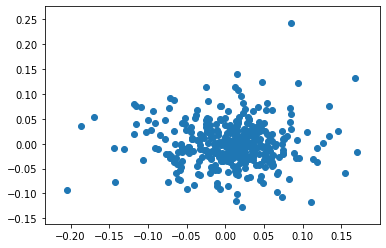

In [469]:
# The results object has an attribute resid, representing the residuals
residual = lm4.resid
fitted = lm4.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

The residuals seem to be i.i.d.; there is no trend in the fitted value. Next we check the QQ-plot (normal probability plot) for normality. Scipy has a function for that.

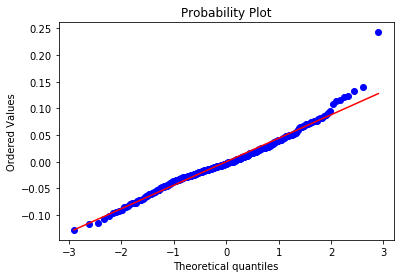

In [470]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

The normality assumption seem to be satisfied, with a heavy tai

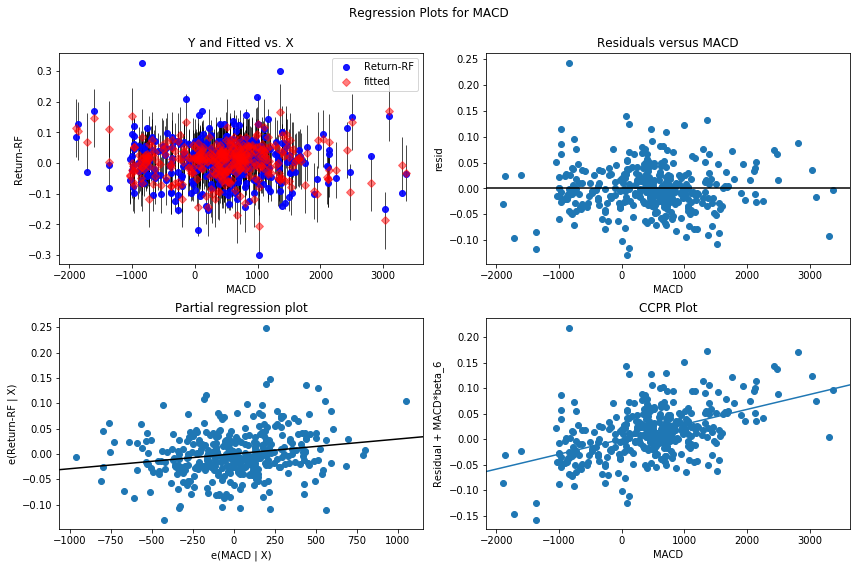

In [471]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'MACD', fig=fig)
plt.show()

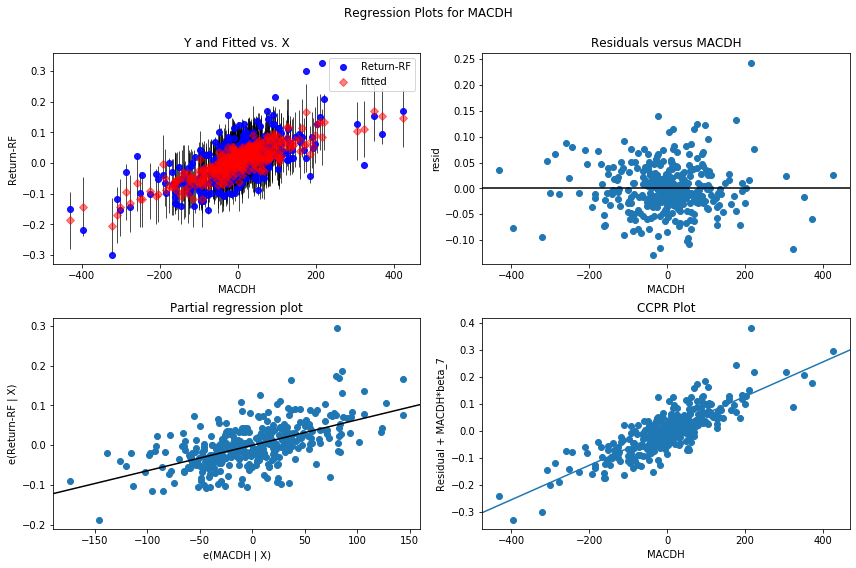

In [472]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'MACDH', fig=fig)
plt.show()

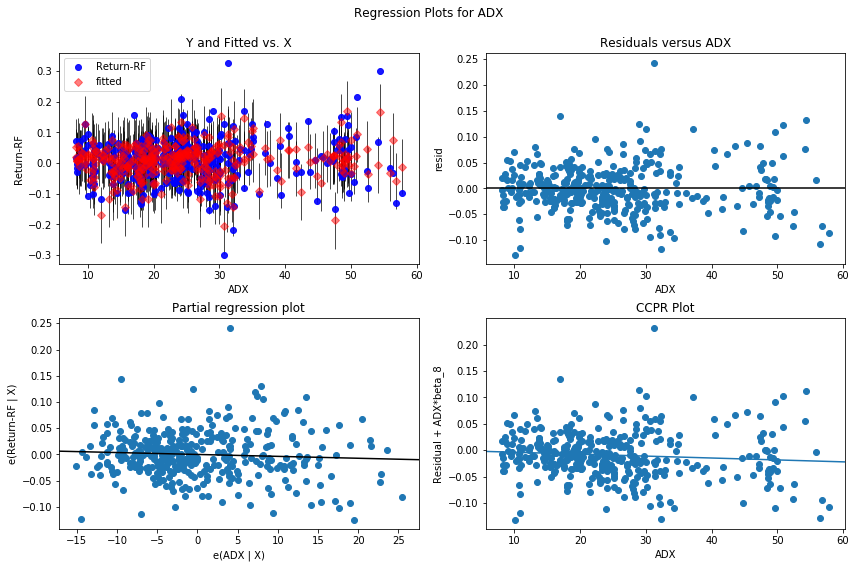

In [473]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'ADX', fig=fig)
plt.show()

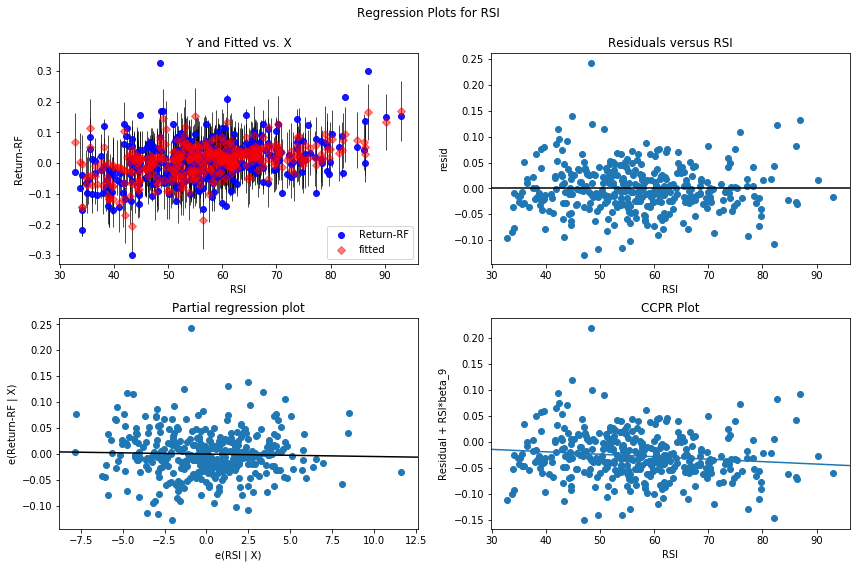

In [474]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'RSI', fig=fig)
plt.show()

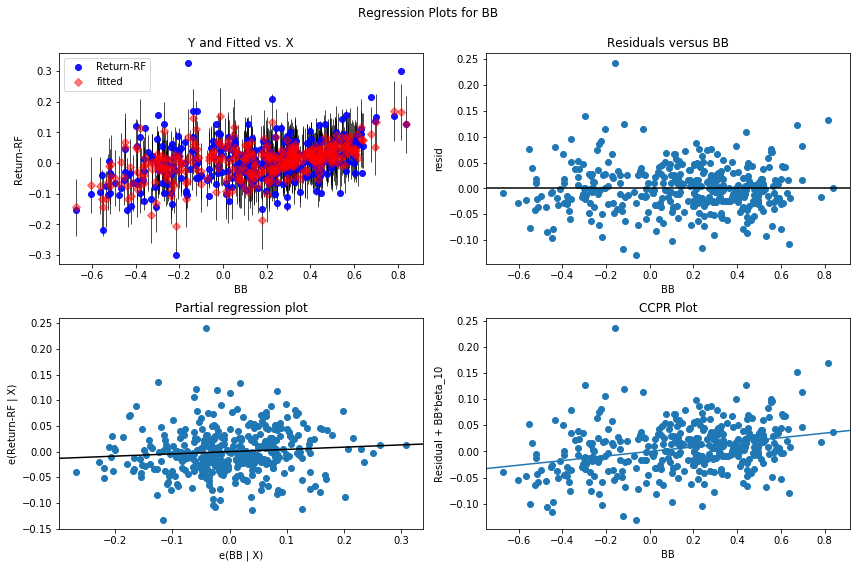

In [475]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'BB', fig=fig)
plt.show()

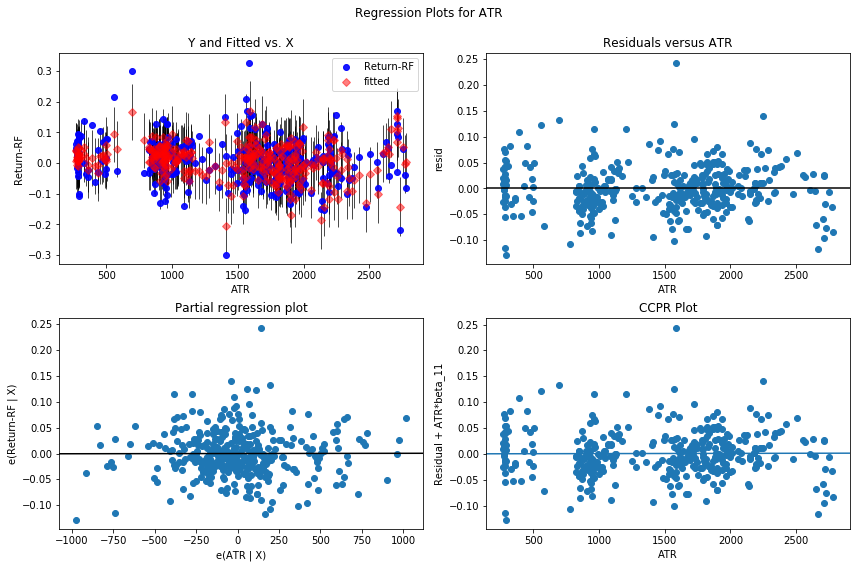

In [476]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'ATR', fig=fig)
plt.show()

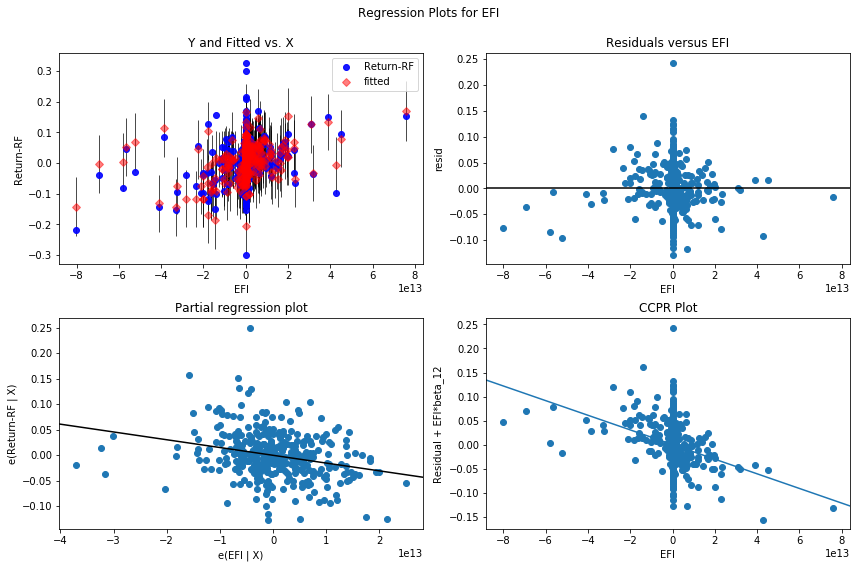

In [477]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'EFI', fig=fig)
plt.show()

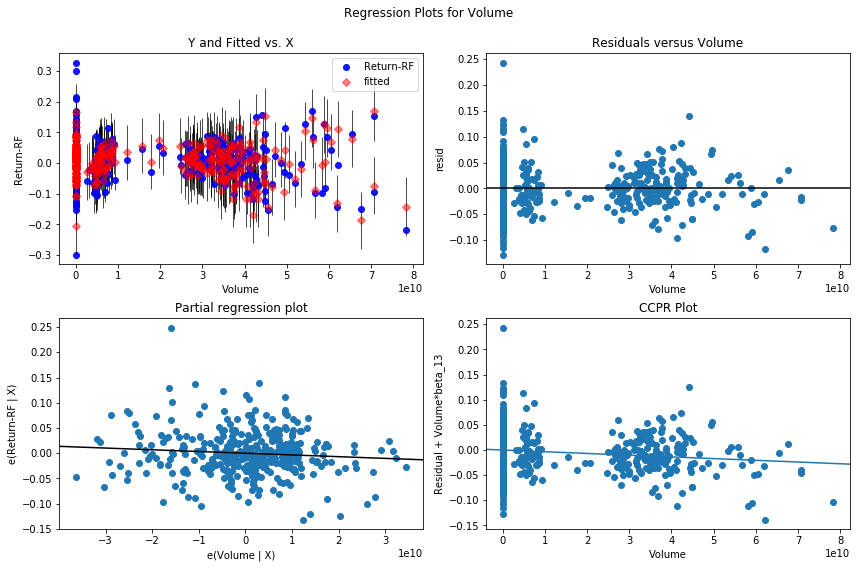

In [478]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm4, 'Volume', fig=fig)
plt.show()

### Detecting Multicollinearity with VIF

In [479]:
pd.options.display.max_rows, pd.options.display.max_columns =len(features), 25

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = BTC[features].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(BTC[features].values, i) 
                          for i in range(len(BTC[features].columns))] 
  
vif_data

feature       VIF
0   Mkt-RF  1.447438
1      SMB  1.304794
2      HML  2.083541
3      RMW  1.625082
4      CMA  2.094293
5     MACD  6.102685
6    MACDH  3.391623
7      ADX  1.879673
8      RSI  1.383521
9       BB  8.310330
10     ATR  3.048147
11     EFI  2.416027
12  Volume  2.409627

# Principle Component Analysis on Feature

In [480]:
from sklearn.decomposition import PCA
X = BTC[features]
pca_number = 13
pca = PCA(n_components=pca_number)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99997571e-01 2.42859620e-06 3.94026041e-21 1.09232602e-21
 3.37064278e-23 6.35077449e-25 1.41944519e-25 1.24297493e-25
 6.56689658e-26 5.85340723e-26 2.30427574e-26 1.00392095e-26
 5.58233308e-29]
[2.38771048e+14 3.72100152e+11 1.49880335e+04 7.89147768e+03
 1.38624042e+03 1.90281050e+02 8.99583550e+01 8.41808638e+01
 6.11874397e+01 5.77678976e+01 3.62451095e+01 2.39238985e+01
 1.78398035e+00]


In [481]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

X = BTC[features]
X_transform = pca.transform(X)
Y = BTC[target]


model = linear_model.LinearRegression()
model.fit(X_transform, Y)
Y_Pred = model.predict(X_transform) 


In [482]:
r2_score(Y, Y_Pred)

0.5921918251994969

In [483]:
# Specify the matrices
X = sm.add_constant(X_transform)
y = BTC[target]
lm5 = sm.OLS(y,X).fit()
# Show results
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     39.99
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.01e-61
Time:                        00:24:59   Log-Likelihood:                 630.32
No. Observations:                 372   AIC:                            -1233.
Df Residuals:                     358   BIC:                            -1178.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.002      3.118      0.0

In [484]:
print(lm5.f_test('x1 = x2 = x3 = x4 = x5 = x6 = x7 = x8 = x9 = x10 = x11 = x12 = x13 = 0'))

<F test: F=array([[40.91280444]]), p=1.0668328803307408e-56, df_denom=358, df_num=11>


### Regression diagonostics

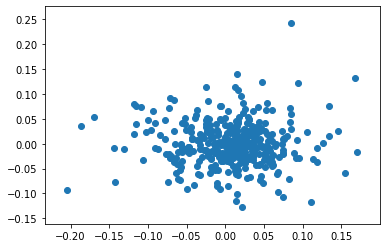

In [485]:
# The results object has an attribute resid, representing the residuals
residual = lm5.resid
fitted = lm5.fittedvalues
# Next we plot it
plt.scatter(fitted, residual)
plt.show()

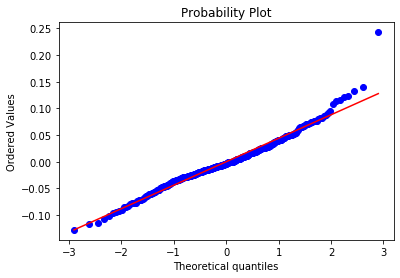

In [486]:
# We first create an axis handle to plot
fig=plt.figure()
ax = fig.add_subplot(111)
# Use the scipy package
st.probplot(residual, dist='norm', plot=ax)
plt.show()

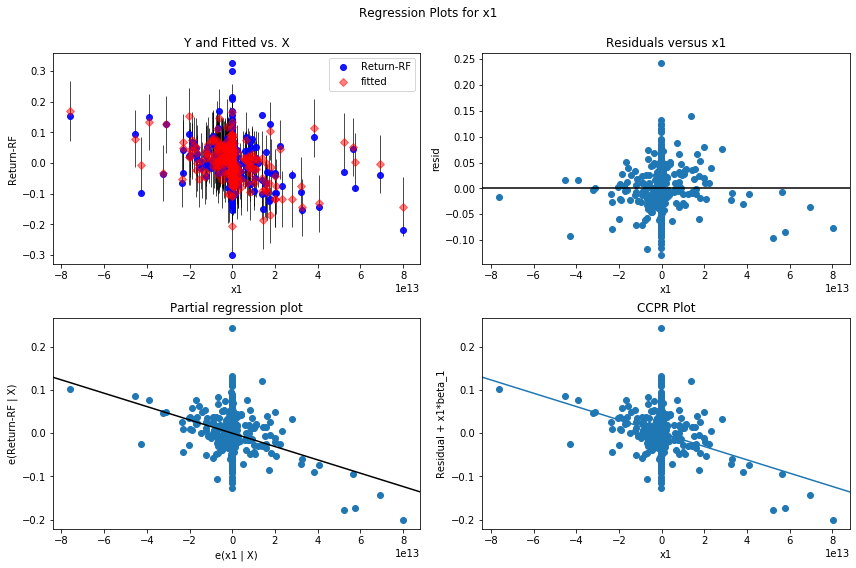

In [487]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x1', fig=fig)
plt.show()

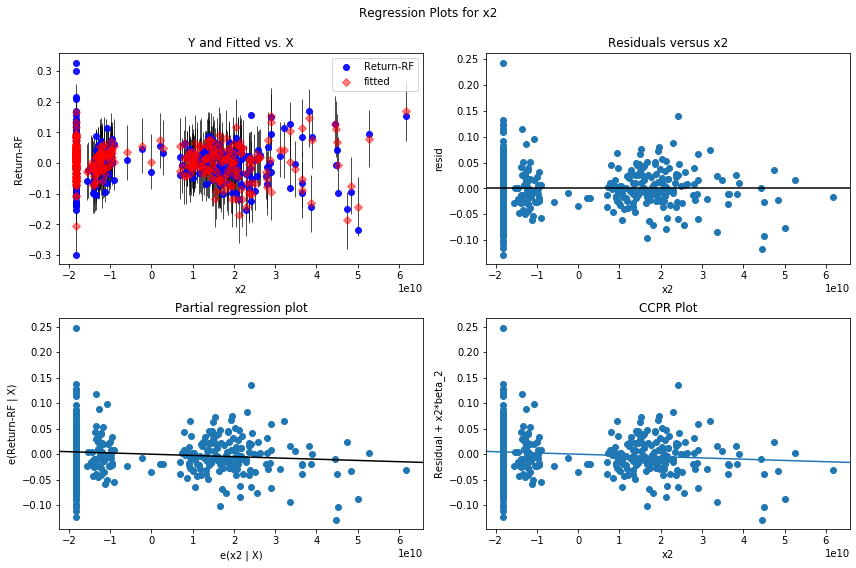

In [488]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x2', fig=fig)
plt.show()

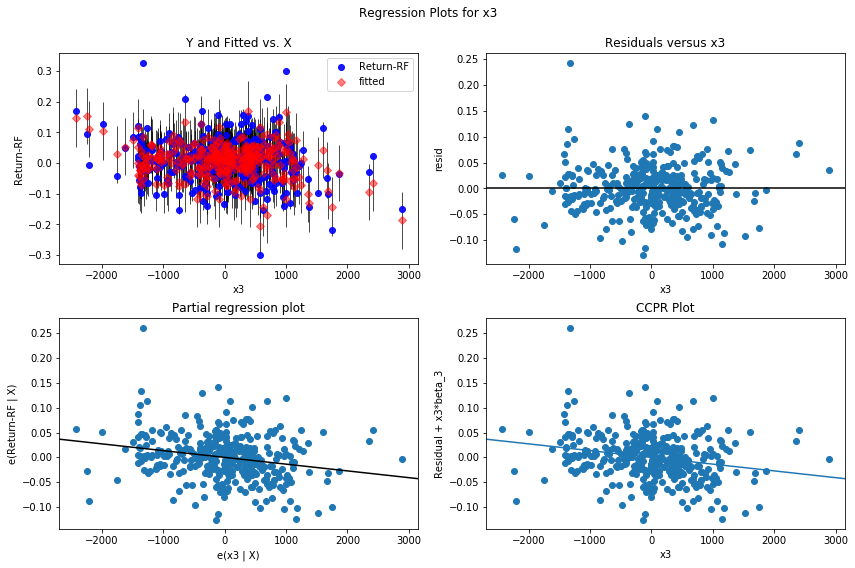

In [489]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x3', fig=fig)
plt.show()

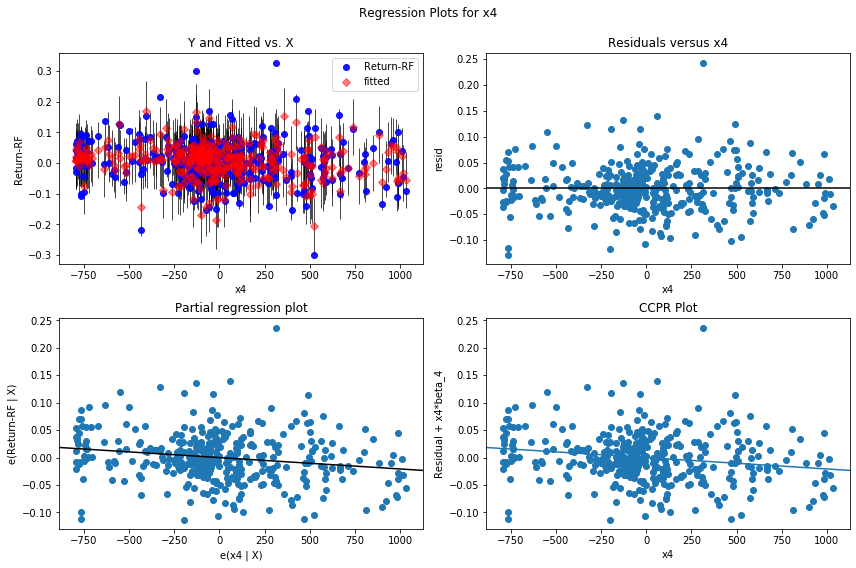

In [490]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x4', fig=fig)
plt.show()

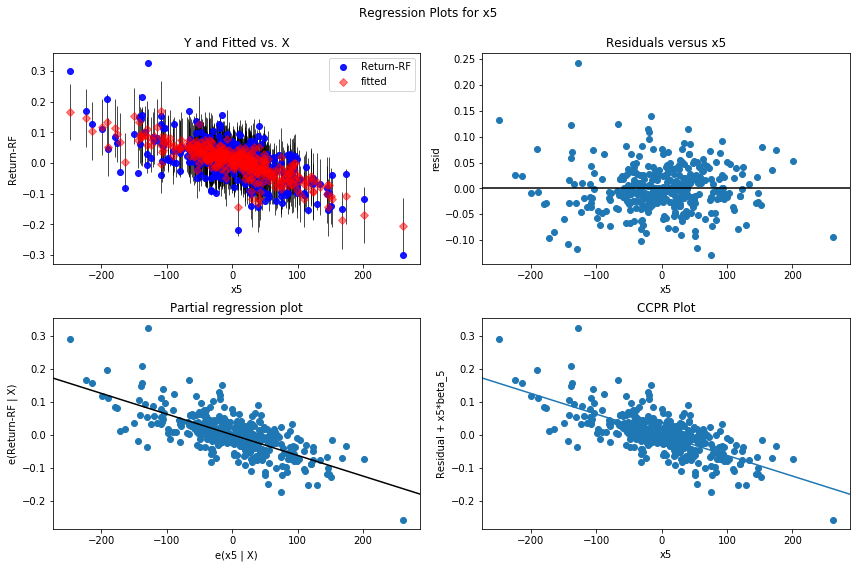

In [491]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x5', fig=fig)
plt.show()

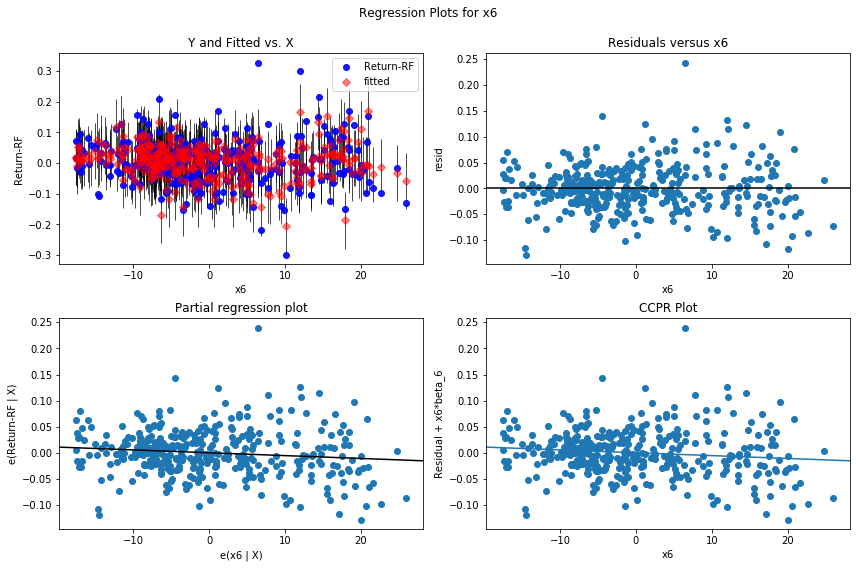

In [492]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x6', fig=fig)
plt.show()

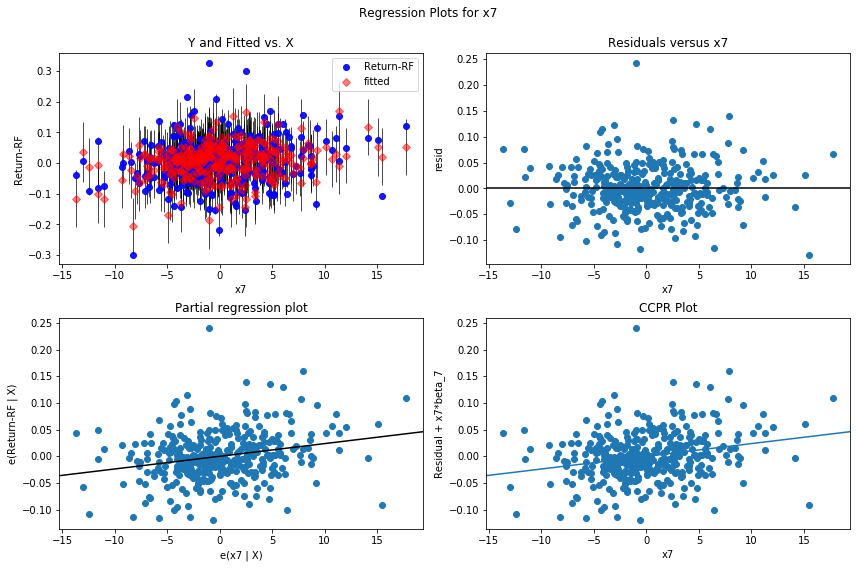

In [493]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x7', fig=fig)
plt.show()

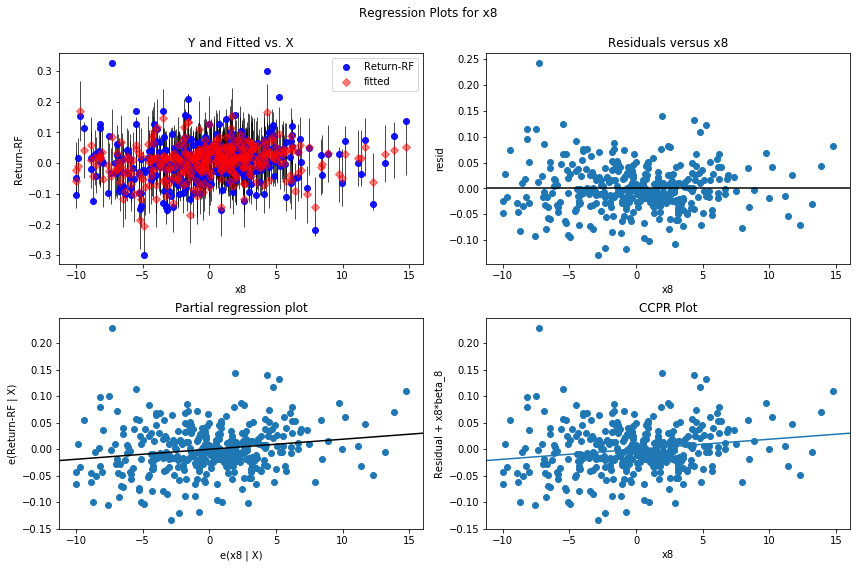

In [494]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x8', fig=fig)
plt.show()

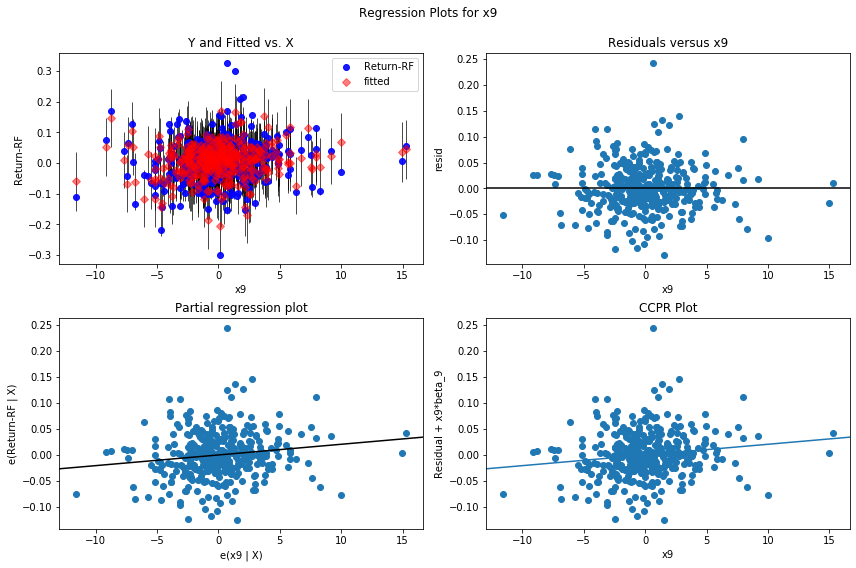

In [495]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x9', fig=fig)
plt.show()

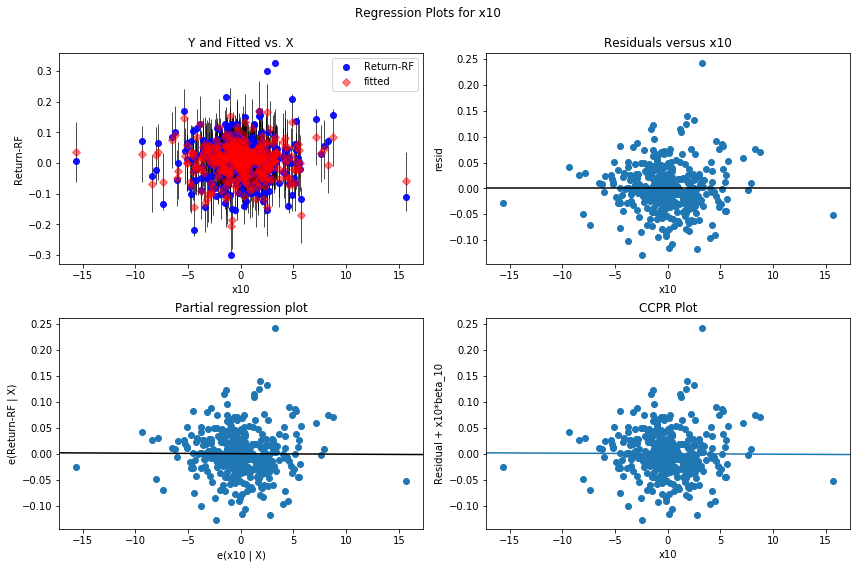

In [496]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x10', fig=fig)
plt.show()

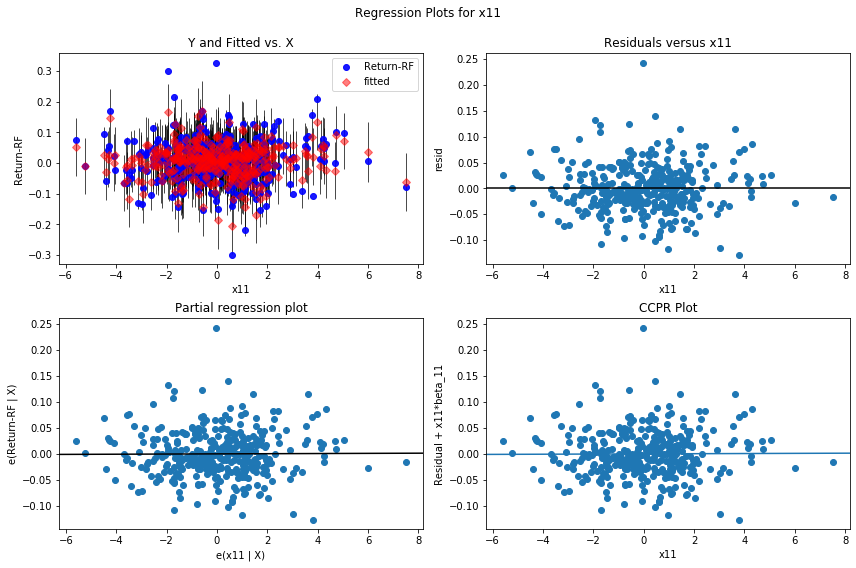

In [497]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x11', fig=fig)
plt.show()

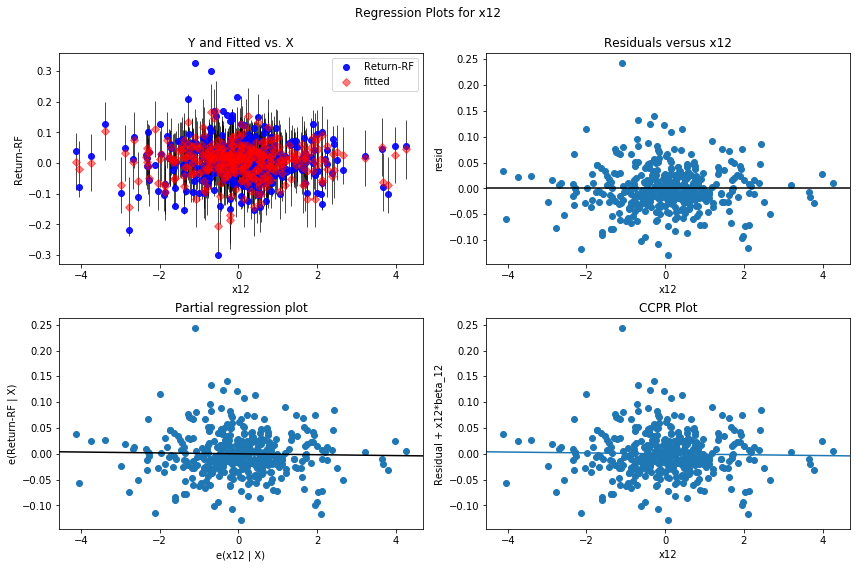

In [498]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x12', fig=fig)
plt.show()

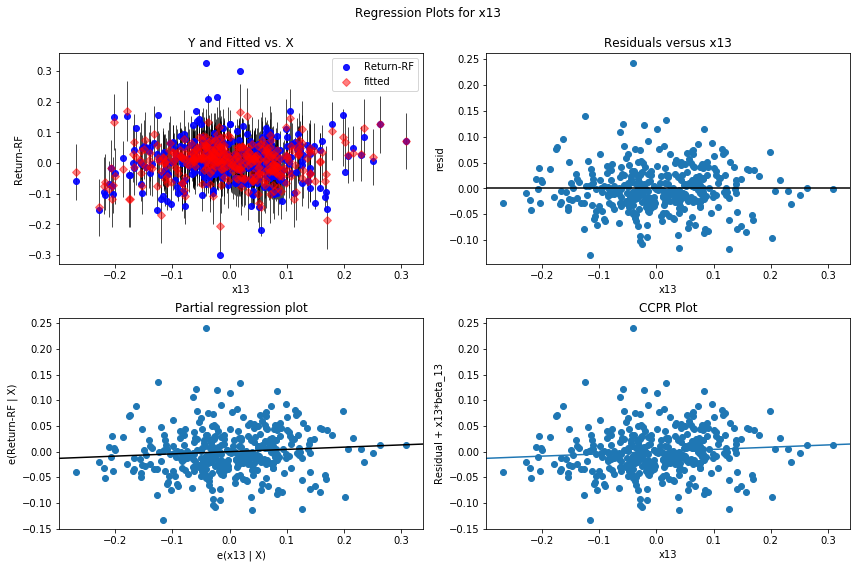

In [499]:
fig = plt.figure(figsize = (12, 8))
fig = sm.graphics.plot_regress_exog(lm5, 'x13', fig=fig)
plt.show()

In [500]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
BTC.drop(columns = features, inplace=True)
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return  
Date                             
1989-11-30   0.032242  0.032242  
1989-12-31  -0.029760 -0.029760  
1990-01-31   0.073064  0.073064  
1990-02-28   0.015588  0.015588  
1990-03-31  -0.015349 -0.015349  
1990-04-30   0.062415  0.062415  
...               ...       ...  
2020-05-31   0.037693  0.037693  
2020-06-30   0.001294  0.001294  
2020-07-31   0.024840  0.024840  
2020-08-31  -0.064843 -0.064843  
2020-09-30   0.002830  0.002830  
2020-10-31   0.085136  0.085136  

[372 rows x 7 columns]

In [501]:
features = []
for i in range(X_transform.shape[1]):
    name = 'x' + str(i)
    features.append(name)
features

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12']

In [502]:
for idx, i in enumerate(features):
    BTC[i] = X_transform[:,idx]
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -2.122386e+11 -1.833889e+10  -253.193132   
1989-12-31  -0.029760 -0.029760 -2.122386e+11 -1.833889e+10  -245.825102   
1990-01-31   0.073064  0.073064 -2.122386e+11 -1.833889e+10  -226.675412   
1990-02-28   0.015588  0.015588 -2.122386e+11 -1.833889e+10  -206.076407   
1990-03-31  -0.015349 -0.015349 -2.122386e+11 -1.833889e+10  -192.896097   
1990-04-30   0.062415  0.062415 -2.122386e+11 -1.833889e+10  -170.595850   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.561940e+13  1.982293e+10  -871.345485   
2020-06-30   0.001294  0.001294  1.218778e+13  2.883502e+10  -980.949170   
2020-07-31   0.024840  0.024840  7.486491e+12  1.596949e+10 -1084.939509   
2020-08-31  -0.064843 -0.064843  1.586930e+13  1.831673e+10  -922.731351   
2020-09-30   0.002830  0.002830  1.006827e+13  1.822124e+10 -1102.483572   
2020-10-31   0.085136  0.085136 -9.346239e+12  3.901618e+10 -1490.112650   

                    x3         x4         x5         x6        x7        x8  \
Date                                                                          
1989-11-30 -788.023534  38.176064 -16.530381   4.697768 -6.087540 -0.700203   
1989-12-31 -793.259264  47.789784 -16.885929   5.969985 -6.573471 -2.407757   
1990-01-31 -789.750181  34.041898 -17.264304  10.175359 -0.262492  2.687081   
1990-02-28 -791.738408  35.551938 -17.594109   2.572701 -3.950560 -0.886860   
1990-03-31 -795.954085  43.105057 -17.372761   2.402035 -5.713248  0.675281   
1990-04-30 -793.844831  32.029658 -17.168190   5.008679 -0.870633  3.305444   
...                ...        ...        ...        ...       ...       ...   
2020-05-31  -61.632578 -51.394104   0.743457  -5.415741 -3.748411  1.286016   
2020-06-30 -253.493153 -38.011775   2.556274  -1.956213 -1.197702 -0.029753   
2020-07-31   59.525367 -56.987926   0.810410  -2.756849 -0.642550 -2.731883   
2020-08-31  -58.583742  39.256792   4.535663  -7.639732 -0.425291 -2.250325   
2020-09-30  -62.500751   2.332556   4.467619   0.333907  2.490046  4.881653   
2020-10-31 -383.183314 -35.092974   5.595918   2.917256  2.541726 -0.683288   

                  x9       x10       x11       x12  
Date                                                
1989-11-30 -0.501786  1.933837  1.698846  0.043144  
1989-12-31 -0.025425  1.819744  1.212774 -0.015871  
1990-01-31 -2.872566  2.481122 -0.747014  0.070816  
1990-02-28 -2.084995 -0.269595 -0.591622  0.073312  
1990-03-31 -0.473003 -3.030848  1.434041  0.033005  
1990-04-30  0.203316 -1.587131  0.281402  0.108854  
...              ...       ...       ...       ...  
2020-05-31  2.007053 -3.007820  0.143109 -0.114951  
2020-06-30 -0.953046 -

In [503]:
pd.options.display.max_rows, pd.options.display.max_columns =len(features), 25

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = BTC[features].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(BTC[features].values, i) 
                          for i in range(len(BTC[features].columns))] 
  
vif_data

feature  VIF
0       x0  1.0
1       x1  1.0
2       x2  1.0
3       x3  1.0
4       x4  1.0
5       x5  1.0
6       x6  1.0
7       x7  1.0
8       x8  1.0
9       x9  1.0
10     x10  1.0
11     x11  1.0
12     x12  1.0

# Time Series Modeling, ARIMA (p,d,q) parameter analysis and estimation

In [504]:
X = BTC[features]
# X = pca.transform(X)
X

x0            x1           x2          x3         x4  \
Date                                                                         
1989-11-30 -2.122386e+11 -1.833889e+10  -253.193132 -788.023534  38.176064   
1989-12-31 -2.122386e+11 -1.833889e+10  -245.825102 -793.259264  47.789784   
1990-01-31 -2.122386e+11 -1.833889e+10  -226.675412 -789.750181  34.041898   
1990-02-28 -2.122386e+11 -1.833889e+10  -206.076407 -791.738408  35.551938   
1990-03-31 -2.122386e+11 -1.833889e+10  -192.896097 -795.954085  43.105057   
1990-04-30 -2.122386e+11 -1.833889e+10  -170.595850 -793.844831  32.029658   
...                  ...           ...          ...         ...        ...   
2020-05-31  1.561940e+13  1.982293e+10  -871.345485  -61.632578 -51.394104   
2020-06-30  1.218778e+13  2.883502e+10  -980.949170 -253.493153 -38.011775   
2020-07-31  7.486491e+12  1.596949e+10 -1084.939509   59.525367 -56.987926   
2020-08-31  1.586930e+13  1.831673e+10  -922.731351  -58.583742  39.256792   
2020-09-30  1.006827e+13  1.822124e+10 -1102.483572  -62.500751   2.332556   
2020-10-31 -9.346239e+12  3.901618e+10 -1490.112650 -383.183314 -35.092974   

                   x5         x6        x7        x8        x9       x10  \
Date                                                                       
1989-11-30 -16.530381   4.697768 -6.087540 -0.700203 -0.501786  1.933837   
1989-12-31 -16.885929   5.969985 -6.573471 -2.407757 -0.025425  1.819744   
1990-01-31 -17.264304  10.175359 -0.262492  2.687081 -2.872566  2.481122   
1990-02-28 -17.594109   2.572701 -3.950560 -0.886860 -2.084995 -0.269595   
1990-03-31 -17.372761   2.402035 -5.713248  0.675281 -0.473003 -3.030848   
1990-04-30 -17.168190   5.008679 -0.870633  3.305444  0.203316 -1.587131   
...               ...        ...       ...       ...       ...       ...   
2020-05-31   0.743457  -5.415741 -3.748411  1.286016  2.007053 -3.007820   
2020-06-30   2.556274  -1.956213 -1.197702 -0.029753 -0.953046 -0.855846   
2020-07-31   0.810410  -2.756849 -0.642550 -2.731883  4.046566  1.116460   
2020-08-31   4.535663  -7.639732 -0.425291 -2.250325  5.149168 -3.676053   
2020-09-30   4.467619   0.333907  2.490046  4.881653  0.089928  0.354311   
2020-10-31   5.595918   2.917256  2.541726 -0.683288 -6.487731 -1.242164   

                 x11       x12  
Date                            
1989-11-30  1.698846  0.043144  
1989-12-31  1.212774 -0.015871  
1990-01-31 -0.747014  0.070816  
1990-02-28 -0.591622  0.073312  
1990-03-31  1.434041  0.033005  
1990-04-30  0.281402  0.108854  
...              ...       ...  
2020-05-31  0.143109 -0.114951  
2020-06-30  1.406677 -0.074511  
2020-07-31  1.713666 -0.022362  
2020-08-31  1.703256 -0.082507  
2020-09-30 -1.581442 -0.064517  
2020-10-31 -2.654764  0.057602  

[372 rows x 13 columns]

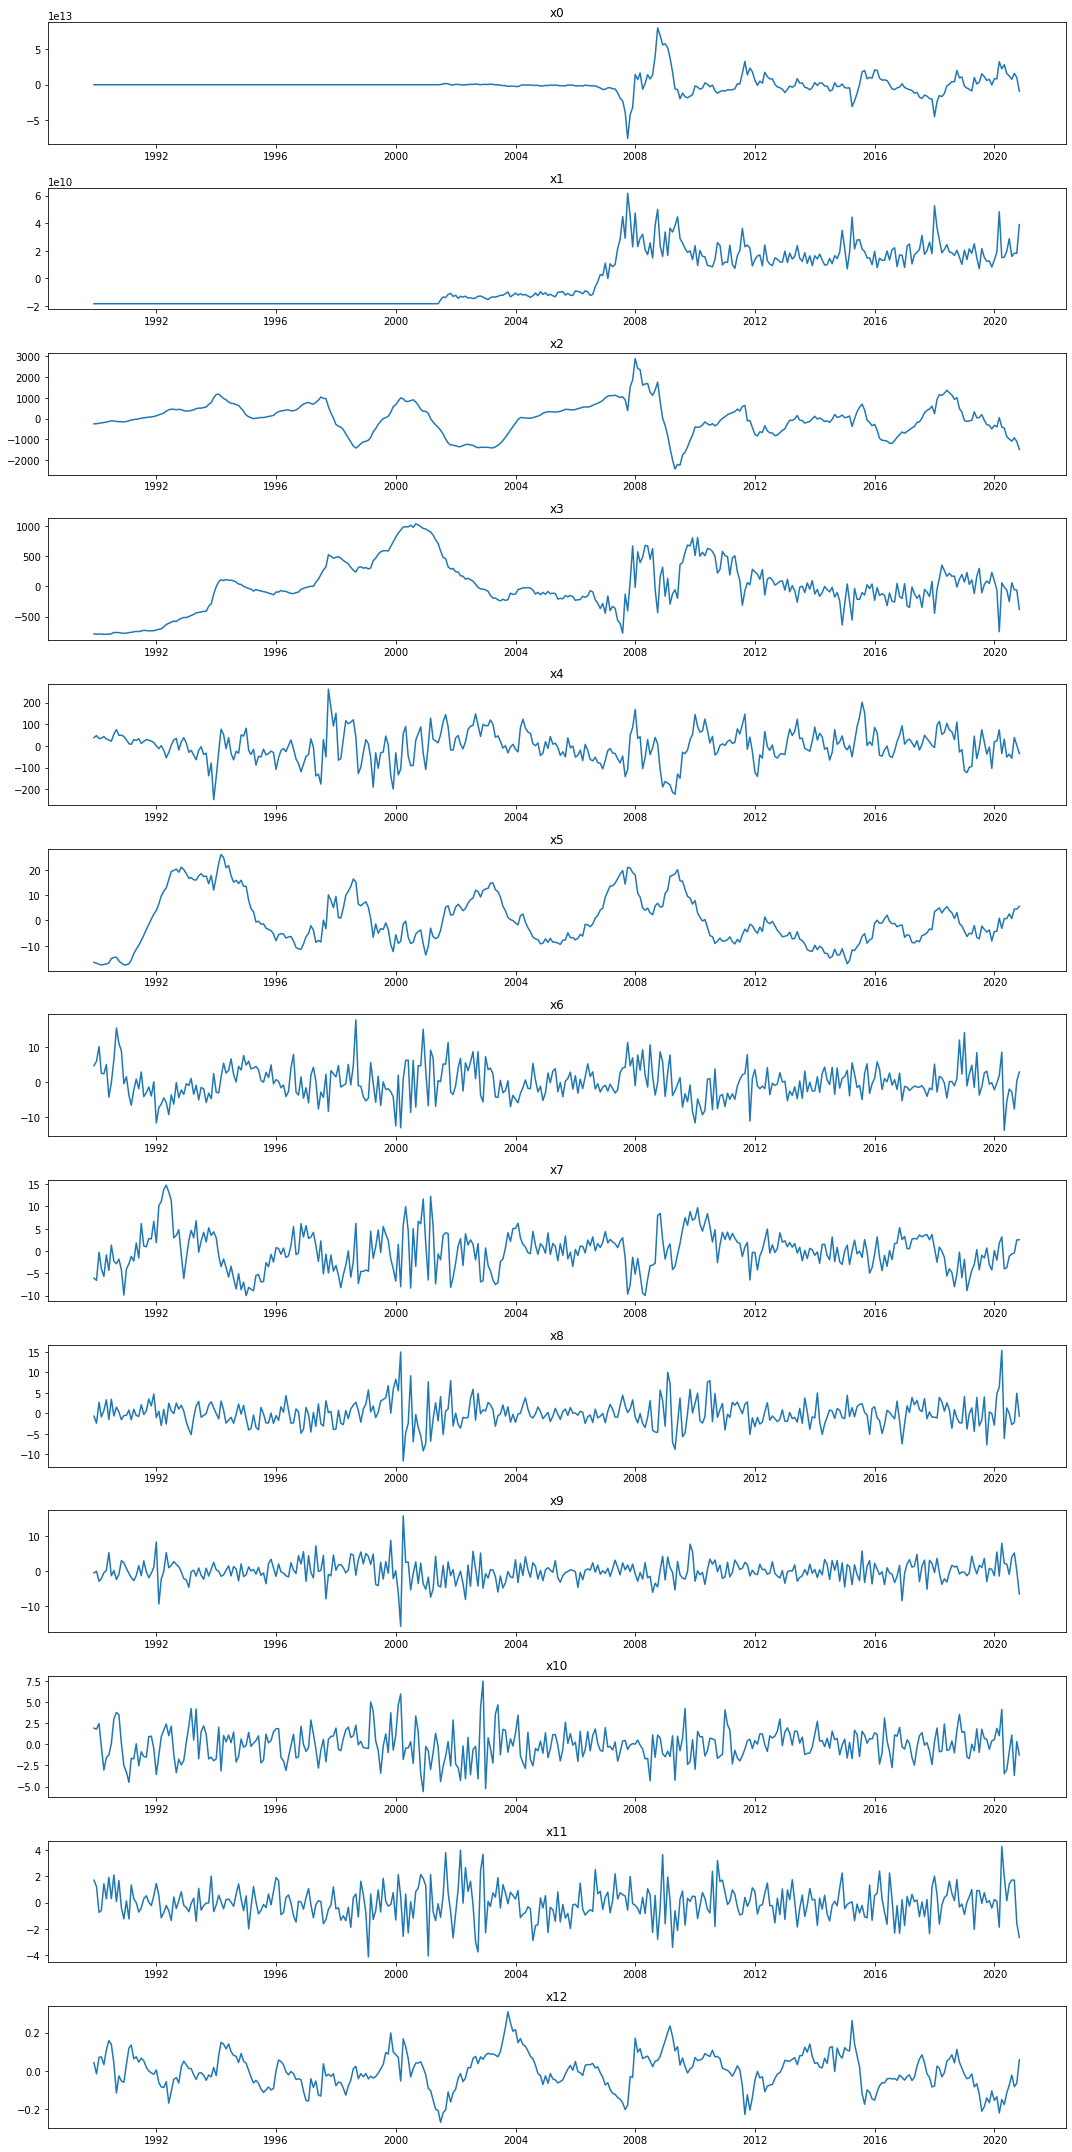

In [505]:
fig, axs = plt.subplots(len(features), figsize=(15,30))
for idx, i in enumerate(features):
    axs[idx].plot(X[i])
    axs[idx].set_title(i)
    figsize=(15,10)

fig.tight_layout()
plt.show()

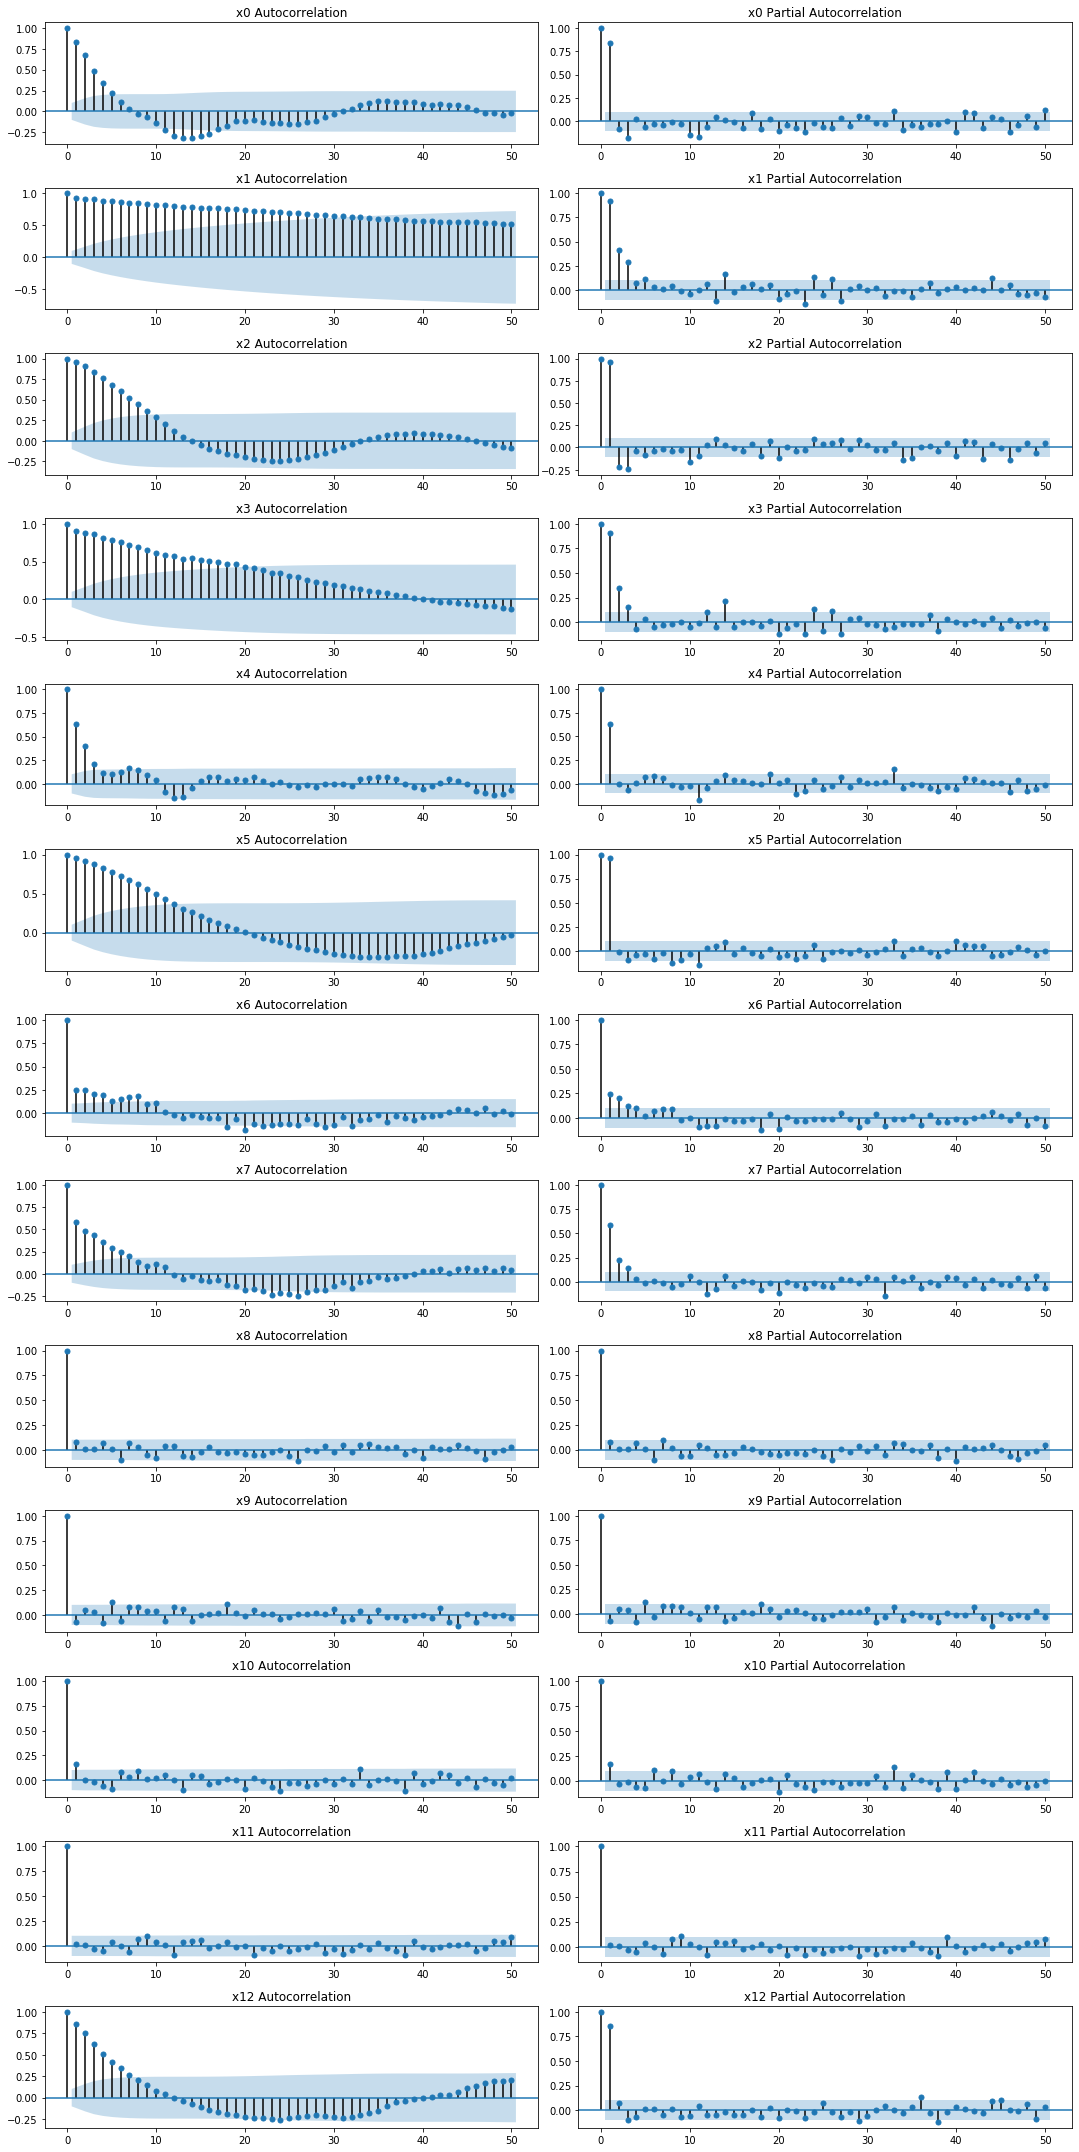

In [506]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

fig, axes = plt.subplots(len(features), 2, figsize=(15,30))

for idx, i in enumerate(features):
    plot_acf(X[i], lags=50, title = i + ' Autocorrelation', ax=axes[idx, 0])
    plot_pacf(X[i], lags=50, title = i +' Partial Autocorrelation', ax=axes[idx, 1])
    
fig.tight_layout()
pyplot.show()

## Workflow Demostration on feature-x5
ARIMA(p,d,q) parameter analysis and estimation

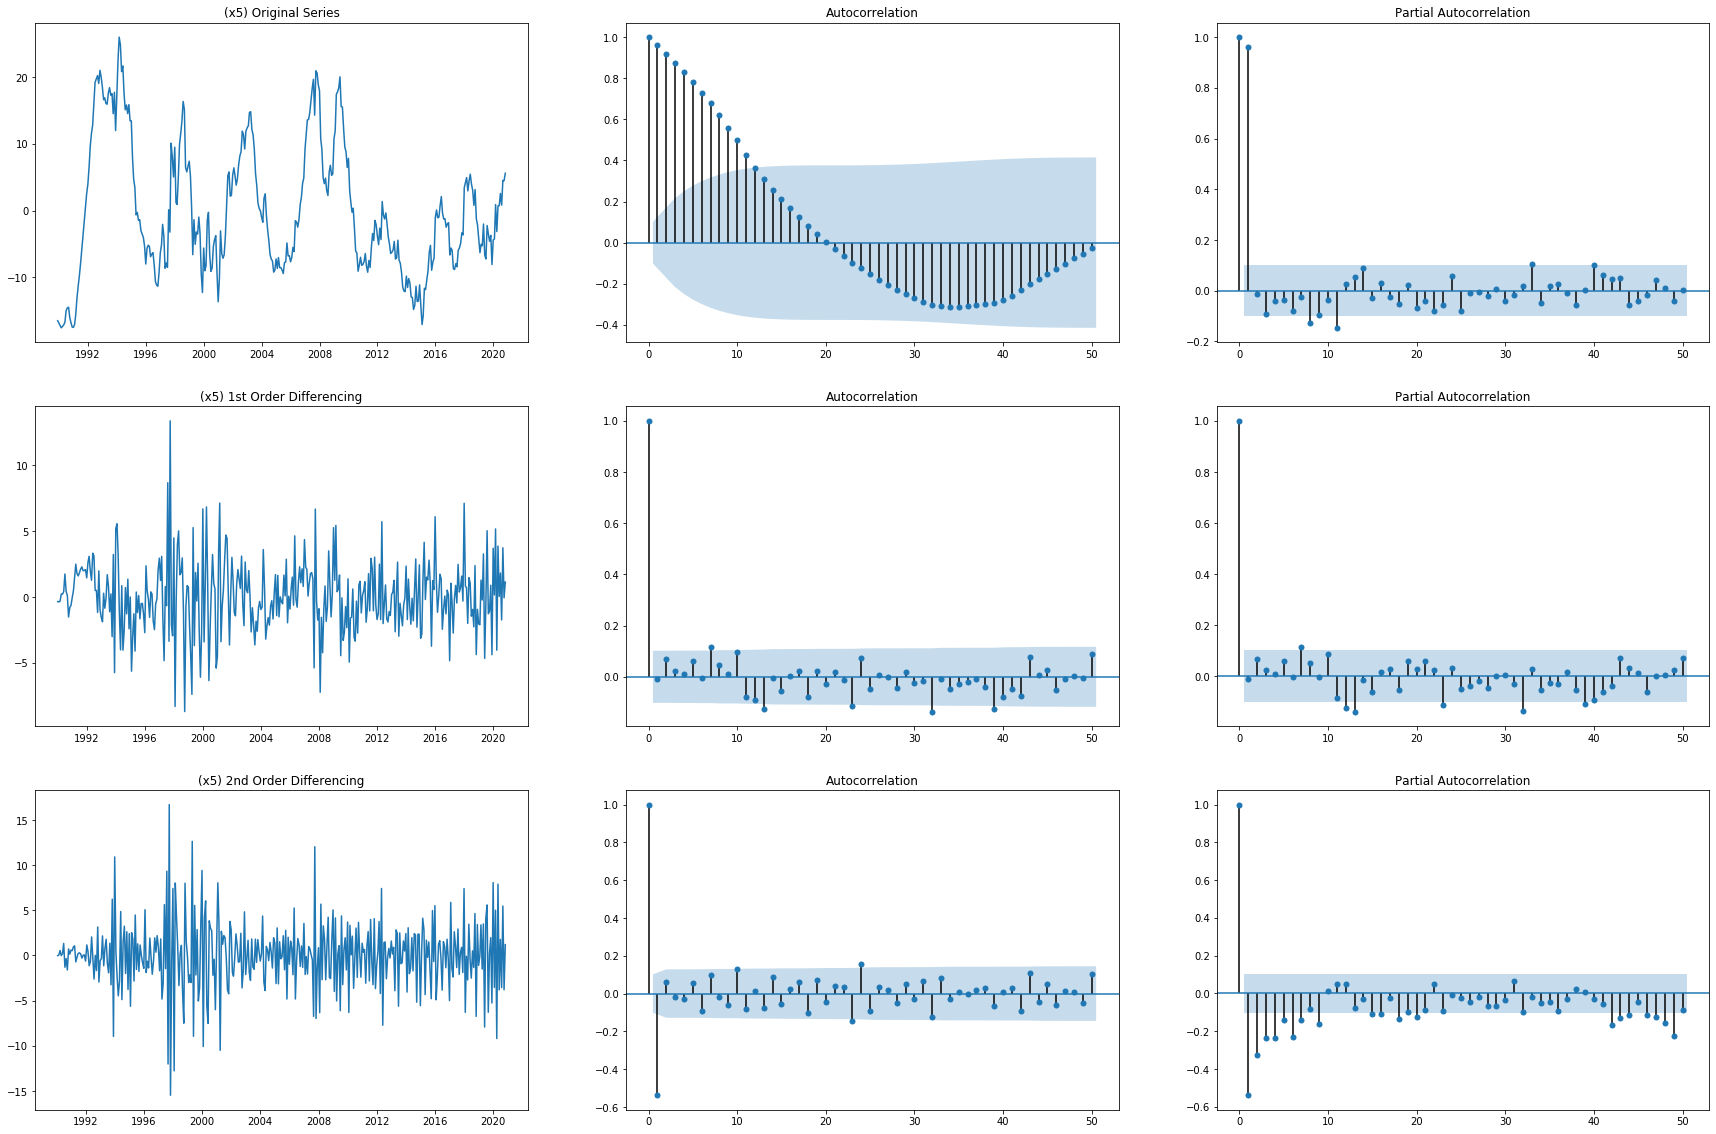

In [507]:
# Analysis on the d-term of ARIMA(p,d,q)
fig, axes = plt.subplots(3, 3, figsize=(30,20))
axes[0, 0].plot(X['x5']); axes[0, 0].set_title('(x5) Original Series')
plot_acf(X['x5'], lags=50, ax=axes[0, 1])
plot_pacf(X['x5'], lags=50, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X['x5'].diff()); axes[1, 0].set_title('(x5) 1st Order Differencing')
plot_acf(X['x5'].diff().dropna(), lags=50, ax=axes[1, 1])
plot_pacf(X['x5'].diff().dropna(), lags=50, ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(X['x5'].diff().diff()); axes[2, 0].set_title('(x5) 2nd Order Differencing')
plot_acf(X['x5'].diff().diff().dropna(), lags=50, ax=axes[2, 1])
plot_pacf(X['x5'].diff().diff().dropna(), lags=50, ax=axes[2, 2])

plt.show()

In [508]:
# estimate the d-term of ARIMA(p,d,q)
import pmdarima
from pmdarima.arima.utils import ndiffs


## Adf Test
print('ADF: ', ndiffs(X['x5'], test='adf'))

# KPSS test
print('KPSS: ', ndiffs(X['x5'], test='kpss') )

# PP test:
print('PP: ',ndiffs(X['x5'], test='pp'))

ADF:  0
KPSS:  0
PP:  1


In [509]:
# estimate the p,d,q-term of ARIMA(p,d,q)
arima_order = pmdarima.arima.auto_arima(X['x5'])
arima_order

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [510]:
model = pmdarima.arima.AutoARIMA()
model_fit = model.fit(X['x5'])
model_predict = model_fit.predict_in_sample(X['x5'])
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  372
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -883.345
Date:                Thu, 22 Apr 2021   AIC                           1776.690
Time:                        00:25:35   BIC                           1796.284
Sample:                             0   HQIC                          1784.471
                                - 372                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8633      0.059     31.465      0.000       1.747       1.979
ar.L2         -0.8000      0.098     -8.166      0.000      -0.992      -0.608
ar.L3         -0.0703      0.045     -1.549      0.121      -0.159       0.019
ma.L1         -0.9224      0.042    -21.770      0.000      -1.005      -0.839
sigma2         6.7086      0.359     18.705      0.000       6.006       7.412
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                78.17
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

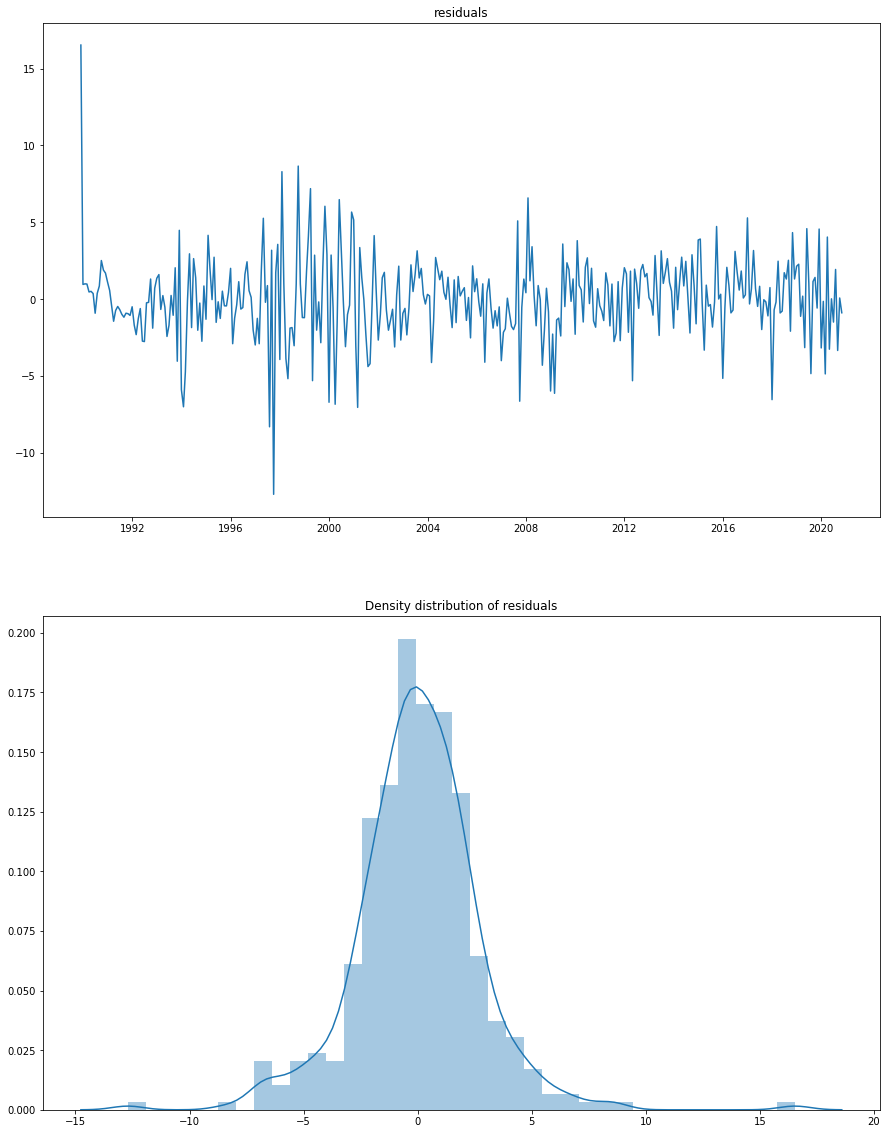

In [511]:
# Plot residual errors of the ARIMA model
residuals = pd.DataFrame(model_predict - X['x5'])
fig, ax = plt.subplots(2, 1, figsize=(15,20))
ax[0].set_title('residuals')
ax[0].plot(residuals)
ax[1].set_title('Density distribution of residuals')
sns.distplot(residuals, ax=ax[1])

The residual errors seem fine with near zero mean and normal distributed. Let’s plot the actuals against the fitted values using plot_predict().

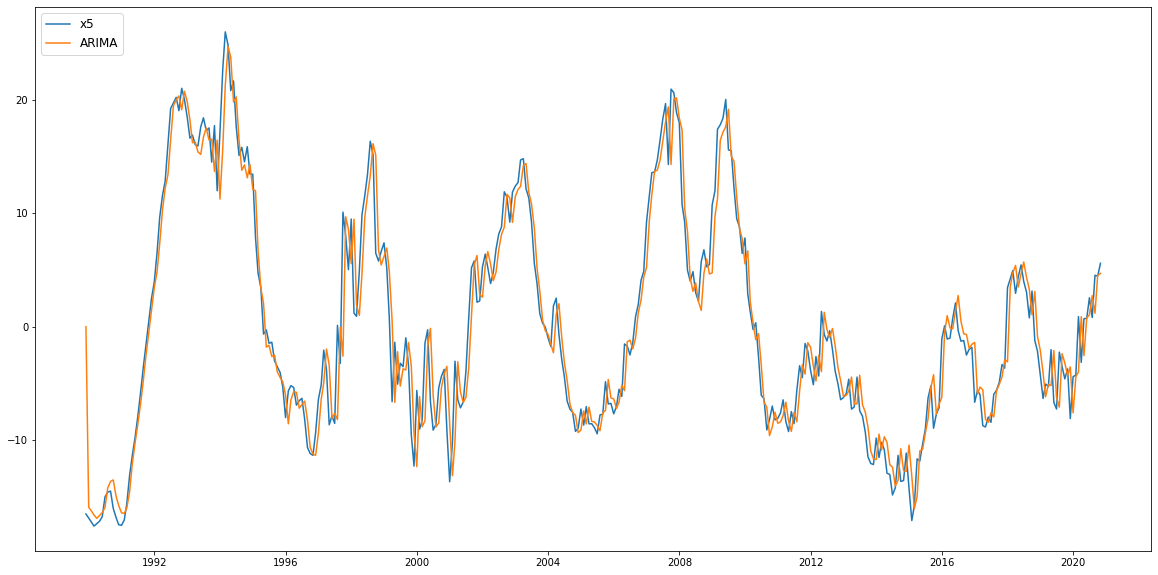

In [512]:
# Actual vs Fitted
plt.figure(figsize=(20,10))
plt.plot(X['x5'].index, X['x5'], label='x5')
plt.plot(X['x5'].index, model_predict, label='ARIMA')
plt.legend(loc='upper left', fontsize=12)

The code below use a different library - statsmodels

In [513]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(X['x6'], order=(1,0,1))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


In [514]:
# # Plot residual errors of the ARIMA model
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(2, 1, figsize=(15,20))
# ax[0].set_title('residuals')
# ax[0].plot(residuals)
# ax[1].set_title('Density distribution of residuals')
# sns.distplot(residuals, ax=ax[1])

In [515]:
# # Actual vs Fitted
# plt.figure(figsize=(20,10))
# plt.plot(X['x6'], label='x6')
# plt.plot(model_fit.predict(), label='ARIMA')
# plt.legend(loc='upper left', fontsize=12)

# ARIMA modeling on all features

In [516]:
X = BTC[features]
# X = pca.transform(X)
X

x0            x1           x2          x3         x4  \
Date                                                                         
1989-11-30 -2.122386e+11 -1.833889e+10  -253.193132 -788.023534  38.176064   
1989-12-31 -2.122386e+11 -1.833889e+10  -245.825102 -793.259264  47.789784   
1990-01-31 -2.122386e+11 -1.833889e+10  -226.675412 -789.750181  34.041898   
1990-02-28 -2.122386e+11 -1.833889e+10  -206.076407 -791.738408  35.551938   
1990-03-31 -2.122386e+11 -1.833889e+10  -192.896097 -795.954085  43.105057   
1990-04-30 -2.122386e+11 -1.833889e+10  -170.595850 -793.844831  32.029658   
...                  ...           ...          ...         ...        ...   
2020-05-31  1.561940e+13  1.982293e+10  -871.345485  -61.632578 -51.394104   
2020-06-30  1.218778e+13  2.883502e+10  -980.949170 -253.493153 -38.011775   
2020-07-31  7.486491e+12  1.596949e+10 -1084.939509   59.525367 -56.987926   
2020-08-31  1.586930e+13  1.831673e+10  -922.731351  -58.583742  39.256792   
2020-09-30  1.006827e+13  1.822124e+10 -1102.483572  -62.500751   2.332556   
2020-10-31 -9.346239e+12  3.901618e+10 -1490.112650 -383.183314 -35.092974   

                   x5         x6        x7        x8        x9       x10  \
Date                                                                       
1989-11-30 -16.530381   4.697768 -6.087540 -0.700203 -0.501786  1.933837   
1989-12-31 -16.885929   5.969985 -6.573471 -2.407757 -0.025425  1.819744   
1990-01-31 -17.264304  10.175359 -0.262492  2.687081 -2.872566  2.481122   
1990-02-28 -17.594109   2.572701 -3.950560 -0.886860 -2.084995 -0.269595   
1990-03-31 -17.372761   2.402035 -5.713248  0.675281 -0.473003 -3.030848   
1990-04-30 -17.168190   5.008679 -0.870633  3.305444  0.203316 -1.587131   
...               ...        ...       ...       ...       ...       ...   
2020-05-31   0.743457  -5.415741 -3.748411  1.286016  2.007053 -3.007820   
2020-06-30   2.556274  -1.956213 -1.197702 -0.029753 -0.953046 -0.855846   
2020-07-31   0.810410  -2.756849 -0.642550 -2.731883  4.046566  1.116460   
2020-08-31   4.535663  -7.639732 -0.425291 -2.250325  5.149168 -3.676053   
2020-09-30   4.467619   0.333907  2.490046  4.881653  0.089928  0.354311   
2020-10-31   5.595918   2.917256  2.541726 -0.683288 -6.487731 -1.242164   

                 x11       x12  
Date                            
1989-11-30  1.698846  0.043144  
1989-12-31  1.212774 -0.015871  
1990-01-31 -0.747014  0.070816  
1990-02-28 -0.591622  0.073312  
1990-03-31  1.434041  0.033005  
1990-04-30  0.281402  0.108854  
...              ...       ...  
2020-05-31  0.143109 -0.114951  
2020-06-30  1.406677 -0.074511  
2020-07-31  1.713666 -0.022362  
2020-08-31  1.703256 -0.082507  
2020-09-30 -1.581442 -0.064517  
2020-10-31 -2.654764  0.057602  

[372 rows x 13 columns]

In [517]:
for i in features:
    model = pmdarima.arima.AutoARIMA()
    model_fit = model.fit(X[i])
    model_predict = model_fit.predict_in_sample(X[i])
    X[i] = model_predict
    
X

x0            x1           x2          x3         x4  \
Date                                                                         
1989-11-30 -7.536924e+11  0.000000e+00     0.000000    0.000000   0.000000   
1989-12-31 -3.012409e+11 -1.026783e+10  -245.044238 -779.499525  24.112443   
1990-01-31 -3.091808e+11 -1.393347e+10  -233.764803 -787.736644  30.184579   
1990-02-28 -3.274205e+11 -1.578702e+10  -209.058209 -790.379537  21.501255   
1990-03-31 -3.256557e+11 -1.683151e+10  -186.184164 -791.481732  22.455014   
1990-04-30 -3.368477e+11 -1.744244e+10  -174.884168 -793.673510  27.225651   
...                  ...           ...          ...         ...        ...   
2020-05-31  1.926961e+13  1.996844e+10  -556.196885 -130.176877  19.666785   
2020-06-30  1.308078e+13  1.990979e+10  -927.310820  -26.558050 -32.461109   
2020-07-31  5.441472e+12  2.350734e+10 -1061.029931 -157.626304 -24.008676   
2020-08-31  4.695536e+12  2.046901e+10 -1079.366662  -47.290660 -35.994232   
2020-09-30  1.014213e+13  1.960148e+10  -867.555417  -62.592288  24.795043   
2020-10-31  6.772577e+12  1.904514e+10 -1042.255916  -38.971382   1.473269   

                   x5        x6        x7   x8        x9       x10  x11  \
Date                                                                      
1989-11-30   0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
1989-12-31 -15.934445  1.252762 -3.559716  0.0  0.051287  0.322290  0.0   
1990-01-31 -16.274190  2.144071 -4.369767  0.0 -0.012440  0.256693  0.0   
1990-02-28 -16.617635  3.485634 -1.964799  0.0  0.269600  0.381622  0.0   
1990-03-31 -16.910890  2.916865 -2.501524  0.0  0.136014 -0.111725  0.0   
1990-04-30 -16.666293  2.490157 -3.469548  0.0 -0.132231 -0.500816  0.0   
...               ...       ...       ...  ...       ...       ...  ...   
2020-05-31   0.758331 -1.198138 -1.060274  0.0 -0.536980 -0.714985  0.0   
2020-06-30   1.058010 -1.806987 -2.026549  0.0  0.724247 -0.393367  0.0   
2020-07-31   2.736966 -1.627047 -1.372136  0.0 -0.699887 -0.079345  0.0   
2020-08-31   1.189748 -1.641014 -0.858457  0.0  0.165532  0.205157  0.0   
2020-09-30   4.537110 -2.514188 -0.546844  0.0 -0.505237 -0.665875  0.0   
2020-10-31   4.703134 -1.723587  0.809057  0.0  0.110252  0.175027  0.0   

                 x12  
Date                  
1989-11-30  0.000000  
1989-12-31  0.036894  
1990-01-31 -0.013572  
1990-02-28  0.060557  
1990-03-31  0.062692  
1990-04-30  0.028224  
...              ...  
2020-05-31 -0.150559  
2020-06-30 -0.098298  
2020-07-31 -0.063717  
2020-08-31 -0.019122  
2020-09-30 -0.070554  
2020-10-31 -0.055170  

[372 rows x 13 columns]

In [518]:
new_features = []
for i in features:
    if np.all(X[i] == 0):
        pass
    else:
        new_features.append(i)
        
features = new_features.copy()
features

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x9', 'x10', 'x12']

In [519]:
for i in features:
    BTC[i] = X[i]

BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -7.536924e+11  0.000000e+00     0.000000   
1989-12-31  -0.029760 -0.029760 -3.012409e+11 -1.026783e+10  -245.044238   
1990-01-31   0.073064  0.073064 -3.091808e+11 -1.393347e+10  -233.764803   
1990-02-28   0.015588  0.015588 -3.274205e+11 -1.578702e+10  -209.058209   
1990-03-31  -0.015349 -0.015349 -3.256557e+11 -1.683151e+10  -186.184164   
1990-04-30   0.062415  0.062415 -3.368477e+11 -1.744244e+10  -174.884168   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.926961e+13  1.996844e+10  -556.196885   
2020-06-30   0.001294  0.001294  1.308078e+13  1.990979e+10  -927.310820   
2020-07-31   0.024840  0.024840  5.441472e+12  2.350734e+10 -1061.029931   
2020-08-31  -0.064843 -0.064843  4.695536e+12  2.046901e+10 -1079.366662   
2020-09-30   0.002830  0.002830  1.014213e+13  1.960148e+10  -867.555417   
2020-10-31   0.085136  0.085136  6.772577e+12  1.904514e+10 -1042.255916   

                    x3         x4         x5        x6        x7        x8  \
Date                                                                         
1989-11-30    0.000000   0.000000   0.000000  0.000000  0.000000 -0.700203   
1989-12-31 -779.499525  24.112443 -15.934445  1.252762 -3.559716 -2.407757   
1990-01-31 -787.736644  30.184579 -16.274190  2.144071 -4.369767  2.687081   
1990-02-28 -790.379537  21.501255 -16.617635  3.485634 -1.964799 -0.886860   
1990-03-31 -791.481732  22.455014 -16.910890  2.916865 -2.501524  0.675281   
1990-04-30 -793.673510  27.225651 -16.666293  2.490157 -3.469548  3.305444   
...                ...        ...        ...       ...       ...       ...   
2020-05-31 -130.176877  19.666785   0.758331 -1.198138 -1.060274  1.286016   
2020-06-30  -26.558050 -32.461109   1.058010 -1.806987 -2.026549 -0.029753   
2020-07-31 -157.626304 -24.008676   2.736966 -1.627047 -1.372136 -2.731883   
2020-08-31  -47.290660 -35.994232   1.189748 -1.641014 -0.858457 -2.250325   
2020-09-30  -62.592288  24.795043   4.537110 -2.514188 -0.546844  4.881653   
2020-10-31  -38.971382   1.473269   4.703134 -1.723587  0.809057 -0.683288   

                  x9       x10       x11       x12  
Date                                                
1989-11-30  0.000000  0.000000  1.698846  0.000000  
1989-12-31  0.051287  0.322290  1.212774  0.036894  
1990-01-31 -0.012440  0.256693 -0.747014 -0.013572  
1990-02-28  0.269600  0.381622 -0.591622  0.060557  
1990-03-31  0.136014 -0.111725  1.434041  0.062692  
1990-04-30 -0.132231 -0.500816  0.281402  0.028224  
...              ...       ...       ...       ...  
2020-05-31 -0.536980 -0.714985  0.143109 -0.150559  
2020-06-30  0.724247 -0.393367  1.406

In [520]:

target = ['Return-RF']

X = BTC[features]
Y = BTC[target]


model = linear_model.LinearRegression()
model.fit(X, Y)
Y_Pred = model.predict(X) 


In [521]:
r2_score(Y, Y_Pred)

0.08567319602093315

In [522]:
# Specify the matrices
X = sm.add_constant(BTC[features])
y = BTC[target]
lm4 = sm.OLS(y,X).fit()
# Show results
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:              Return-RF   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.067
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           0.000601
Time:                        00:26:00   Log-Likelihood:                 480.15
No. Observations:                 372   AIC:                            -936.3
Df Residuals:                     360   BIC:                            -889.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.004      2.103      0.0

# Investment Analysis with Extended Factor Modeling (long short strategy with market timing)

In [523]:
'''
1) Greedy Algorithm + PnL Validation
2) Lasso Regression Algorithm + K-Fold Cross-Validation on PnL
3) Ridge Regression Algorithm + K-Fold Cross-Validation on PnL
4) Elastic Net Regression Algorithm + K-Fold Cross-Validation on PnL¶
5) Logistic Regression Algorithm (L2 Regularization) + K-Fold Cross-Validation on PnL
6) Support Vector Machine + K-Fold Cross-Validation on PnL
7) Random Forest + K-Fold Cross-Validation on PnL
'''

'\n1) Greedy Algorithm + PnL Validation\n2) Lasso Regression Algorithm + K-Fold Cross-Validation on PnL\n3) Ridge Regression Algorithm + K-Fold Cross-Validation on PnL\n4) Elastic Net Regression Algorithm + K-Fold Cross-Validation on PnL¶\n5) Logistic Regression Algorithm (L2 Regularization) + K-Fold Cross-Validation on PnL\n6) Support Vector Machine + K-Fold Cross-Validation on PnL\n7) Random Forest + K-Fold Cross-Validation on PnL\n'

# Greedy Algorithm + PnL Validation

In [524]:
target = ['Return-RF']

In [562]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [563]:
def PnL(data, target, proportion):

    train_sub, valid_sub = train_test_split(data, test_size = proportion)

    # create a linear model
    X_train = train_sub.drop(target, axis = 1)
    Y_train = train_sub[target]
    X_valid = valid_sub.drop(target, axis = 1)
    Y_valid = valid_sub[target]
    
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(valid_sub))},
                                 index = valid_sub.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [564]:
def greedy_algo(train_valid, target, proportion):
    
    # initialize a list to save features
    greedy_select = []
    

    profit_greedy_algo = np.array([])
    for i in range(len(features)):
        profit = np.array([])
        features_left = list(set(features) - set(greedy_select))

        for new in features_left:
            features_new = greedy_select + [new]
            train_valid_sub = train_valid[features_new + target]

            # CrossValidation, compute the profit and save it into profit_sub
            profit_sub = PnL(train_valid_sub, target, proportion)
            profit = np.append(profit, profit_sub)

        # pick the features that gives the largest profit
        # and add it into our features list
        # meanwhile, save the corresponding profit
        greedy_select += [features_left[profit.argmax()]]
        profit_greedy_algo = np.append(profit_greedy_algo, profit.max())
        
    return greedy_select[:(profit_greedy_algo.argmax()+1)]

In [565]:
randomRange

116

### 6 month investment

In [566]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [567]:
%%time
# an array for saving 50 final best profit
profit_final = np.array([])

for i in range(sample_size):
    
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    features_cv = greedy_algo(train_valid, target, 0.2)
    
    print('Selected Features: ', features_cv)

    X_cv = train_valid[features_cv]
    Y_cv = train_valid[target]

    X_test_cv = test[features_cv]
    Y_test_cv = test[target]

    model_cv = linear_model.LinearRegression()
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

Selected Features:  ['x5', 'x3', 'x10', 'x12']
Selected Features:  ['x0', 'x3', 'x2', 'x10']
Selected Features:  ['x4', 'x12', 'x10', 'x9', 'x5', 'x1', 'x7', 'x3', 'x2', 'x0', 'x6']
Selected Features:  ['x5', 'x3', 'x1', 'x6', 'x0']
Selected Features:  ['x3', 'x9', 'x10', 'x12', 'x4', 'x0', 'x7', 'x5']
Selected Features:  ['x2']
Selected Features:  ['x2', 'x3', 'x0', 'x10']
Selected Features:  ['x4', 'x7', 'x10', 'x1', 'x2', 'x6', 'x9', 'x3', 'x12', 'x5']
Selected Features:  ['x4', 'x5', 'x7']
Selected Features:  ['x3', 'x7', 'x12', 'x9', 'x4', 'x10', 'x2', 'x1', 'x5']
Selected Features:  ['x2', 'x5', 'x4', 'x7', 'x3', 'x10', 'x1', 'x12', 'x6', 'x0']
Selected Features:  ['x6', 'x7', 'x2', 'x3', 'x4', 'x1', 'x10', 'x9', 'x12']
Selected Features:  ['x10', 'x7', 'x12', 'x3', 'x1', 'x0', 'x6', 'x5']
Selected Features:  ['x3', 'x0', 'x5', 'x6', 'x2', 'x7', 'x1']
Selected Features:  ['x5', 'x4', 'x6', 'x3', 'x2']
Selected Features:  ['x2', 'x4', 'x3', 'x5']
Selected Features:  ['x7', 'x10', 

Text(0, 0.5, 'Quantities')

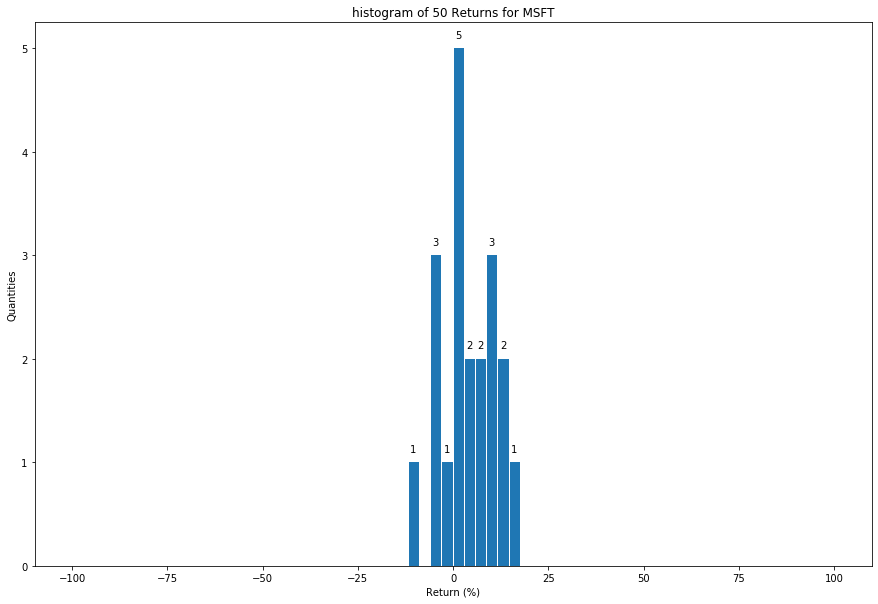

In [568]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


### 10 Year Investment

In [569]:
fix_history_length = 250  # 21 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [570]:
%%time
# an array for saving 50 final best profit
profit_final = np.array([])

for i in range(sample_size):
    
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    features_cv = greedy_algo(train_valid, target, 0.2)
    
    print('Selected Features: ', features_cv)

    X_cv = train_valid[features_cv]
    Y_cv = train_valid[target]

    X_test_cv = test[features_cv]
    Y_test_cv = test[target]

    model_cv = linear_model.LinearRegression()
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

Selected Features:  ['x12', 'x7', 'x2', 'x9', 'x1', 'x5', 'x0', 'x3', 'x4', 'x10']
Returns :
96%, Maximum Return:  96.0
Minimum Return:  96.0
Average Return:  96.0
Standard Deviation:  0.0
320 training days
80 validation days
100 test days
CPU times: user 2.05 s, sys: 17.6 ms, total: 2.07 s
Wall time: 2.17 s


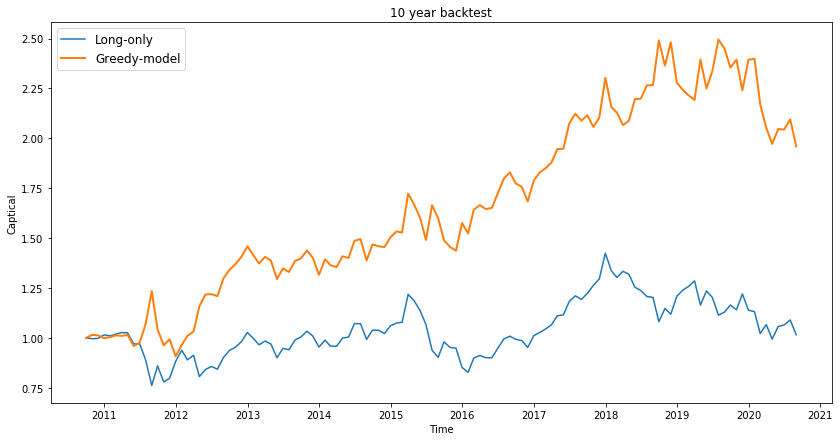

In [571]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='Greedy-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)


# Lasso Regression Algorithm + K-Fold Cross-Validation on PnL

In [583]:

target = ['Return-RF']

In [604]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [585]:
def PnL_Lasso(x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.Lasso(alpha = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [586]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_Lasso(data, target, n, lamb):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate PnL
        profit_temp = PnL_Lasso(X_train, Y_train, X_valid, Y_valid, lamb)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

### 6 Month Investment

In [587]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [588]:
%%time
# an array for saving 50 final best profit
# an array for saving 50 final best profit
lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_lasso = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_lasso = np.append(PnL_lasso, kfold_Lasso(train_valid, target, 10, lamb))
        
    lambda_selected_lasso = lambda_list[PnL_lasso.argmax()]
    
    print('lambda_selected',lambda_selected_lasso)
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Lasso(alpha = lambda_selected_lasso)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

lambda_selected 1e-08
lambda_selected 1e-08
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 1e-05
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 1e-05
lambda_selected 0.0001
lambda_selected 1e-08
lambda_selected 1e-06
lambda_selected 1e-08
lambda_selected 0.0001
lambda_selected 1e-08
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 0.0001
lambda_selected 1e-08
0  feature coef =  9.27696748241314e-17
1  feature coef =  -3.4207265385478e-13
2  feature coef =  -9.32939831899784e-06
3  feature coef =  -4.1098641802330674e-05
4  feature coef =  2.0586647940144493e-05
5  feature coef =  0.0009937116523100194
6  feature coef =  0.0011062583448124452
7  feature coef =  0.0057852137803246365
8  feature coef =  -0.007324776240310371
9  feature coef =  0.014152793565385513
10  feature coef =  0.05851477735119968
Returns :
-8%, 8%, 8%, -4%, -10%, -1%, -15%, 10%, 4%, 8%, 2%, 3%, 9%, -5%, -2%, 4%, 10%, 15%, 1%, 1

Text(0, 0.5, 'Quantities')

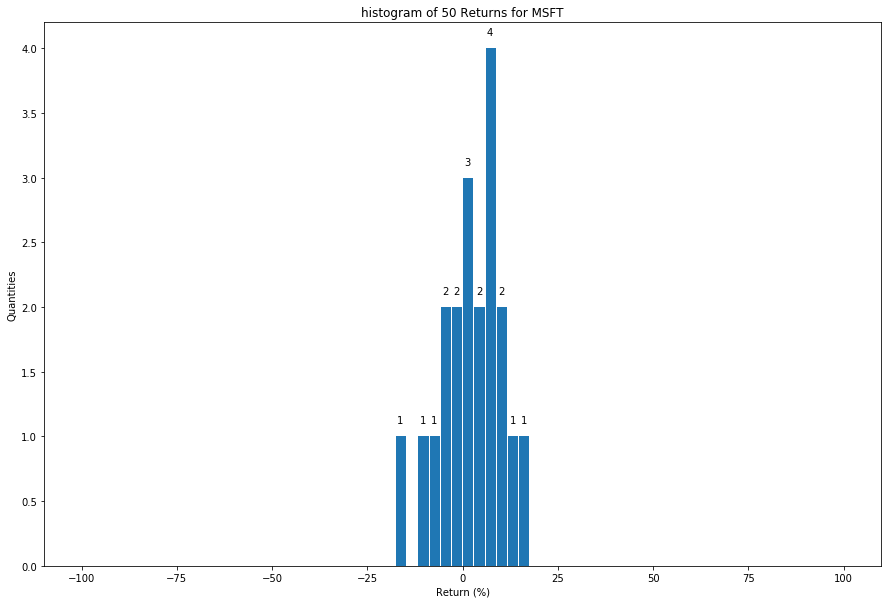

In [589]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


Text(0.5, 1.0, "Distribution of feature' coefficients")

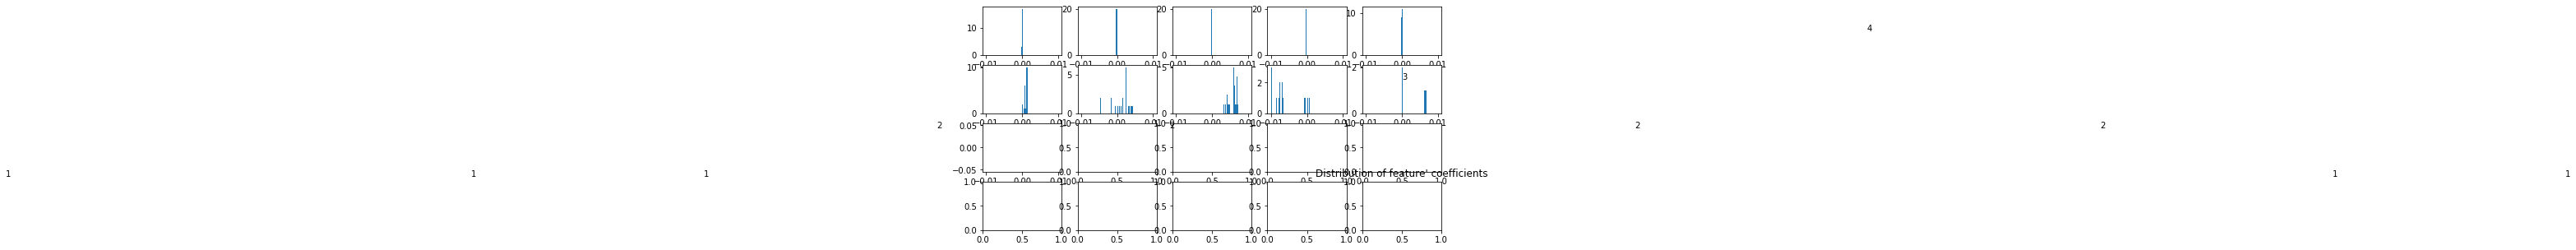

In [590]:
fig, axs = plt.subplots(4,5, figsize=(10, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

bins = np.linspace(-0.01, 0.01, 69)

for i in range(len(model_cv.coef_)):
    axs[i].hist(model_coef[i], bins, histtype='bar', rwidth=0.9)

for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("Distribution of feature' coefficients")

### 10 Year Investment

In [591]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [592]:
%%time
# an array for saving 50 final best profit
lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_lasso = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_lasso = np.append(PnL_lasso, kfold_Lasso(train_valid, target, 10, lamb))
        
    lambda_selected_lasso = lambda_list[PnL_lasso.argmax()]
    
    print('lambda_selected',lambda_selected_lasso)
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Lasso(alpha = lambda_selected_lasso)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

lambda_selected 0.0001
0  feature coef =  -2.3510669781487353e-16
1  feature coef =  -1.7712808195895884e-13
2  feature coef =  -1.0640581944621301e-05
3  feature coef =  -3.231016788879028e-05
4  feature coef =  3.486761466178813e-05
5  feature coef =  0.0005533270534737358
6  feature coef =  0.0032258873313605503
7  feature coef =  0.004106785258960432
8  feature coef =  -0.013099780340023919
9  feature coef =  0.008200066636116062
10  feature coef =  0.07270985220012936
Returns :
85%, Maximum Return:  85.0
Minimum Return:  85.0
Average Return:  85.0
Standard Deviation:  0.0
320 training days
80 validation days
100 test days
CPU times: user 1.43 s, sys: 23.2 ms, total: 1.45 s
Wall time: 1.61 s


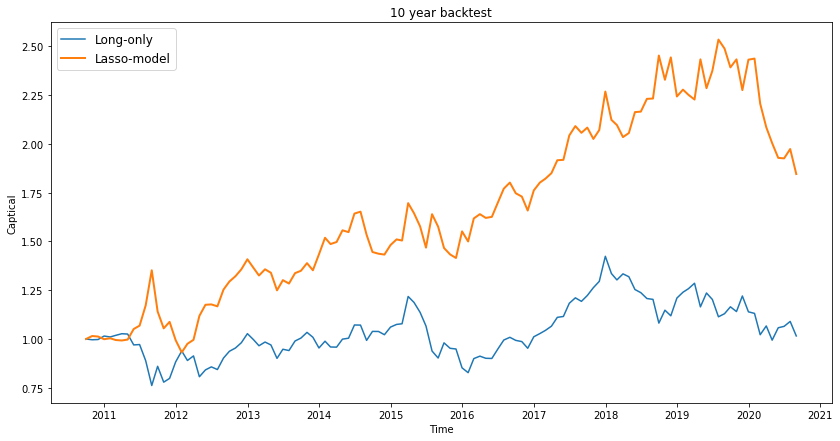

In [593]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='Lasso-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Ridge Regression Algorithm + K-Fold Cross-Validation on PnL

In [596]:
target = ['Return-RF']

In [605]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [606]:
def PnL_Ridge(x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.Ridge(alpha = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [607]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_Ridge(data, target, n, lamb):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate PnL
        profit_temp = PnL_Ridge(X_train, Y_train, X_valid, Y_valid, lamb)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

# 6 Month investment

In [608]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [609]:
%%time
# an array for saving 50 final best profit
lambda_list = lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_ridge = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_ridge = np.append(PnL_ridge, kfold_Ridge(train_valid, target, 10, lamb))
        
    lambda_selected_ridge = lambda_list[PnL_ridge.argmax()]
      
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Ridge(alpha = lambda_selected_ridge)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(model_cv.coef_.shape[1]):
        model_coef[j][i] = model_cv.coef_[0][j]
    
for i in range(model_cv.coef_.shape[1]):
    print(i,' feature coef = ', model_coef[i].mean())

profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

0  feature coef =  7.929736405410486e-17
1  feature coef =  -3.458942040430193e-13
2  feature coef =  -9.25473094055881e-06
3  feature coef =  -4.110604170442289e-05
4  feature coef =  2.124128055909049e-05
5  feature coef =  0.0009888052509988128
6  feature coef =  0.001240951197141216
7  feature coef =  0.005819981245148263
8  feature coef =  -0.007382746240511681
9  feature coef =  0.0146252933953498
10  feature coef =  0.06797253721025882
Returns :
-8%, 8%, 8%, -4%, -10%, -1%, -15%, 10%, 4%, 8%, 2%, 3%, 9%, -5%, -2%, 4%, 10%, 15%, 1%, 13%, Maximum Return:  15.0
Minimum Return:  -15.0
Average Return:  2.0
Standard Deviation:  8.0
320 training days
80 validation days
100 test days
CPU times: user 36.7 s, sys: 2.56 s, total: 39.2 s
Wall time: 23.4 s


Text(0, 0.5, 'Quantities')

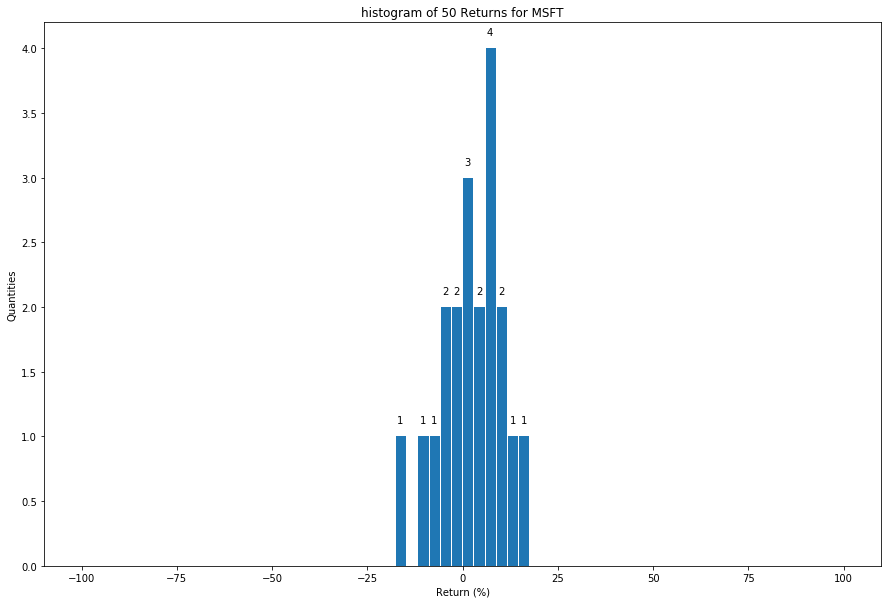

In [610]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


Text(0.5, 1.0, "Distribution of feature' coefficients")

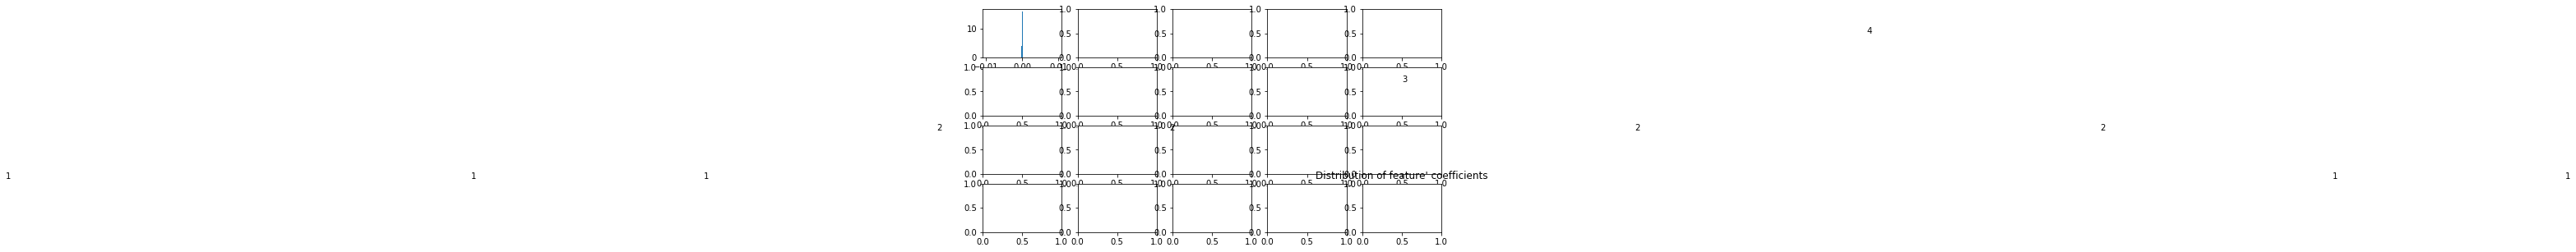

In [611]:
fig, axs = plt.subplots(4,5, figsize=(10, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

bins = np.linspace(-0.01, 0.01, 69)

for i in range(len(model_cv.coef_)):
    axs[i].hist(model_coef[i], bins, histtype='bar', rwidth=0.9)

for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("Distribution of feature' coefficients")

### 10 Year Investment

In [612]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [613]:
%%time
# an array for saving 50 final best profit
lamdda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_ridge = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_ridge = np.append(PnL_ridge, kfold_Ridge(train_valid, target, 10, lamb))
        
    lambda_selected_ridge = lambda_list[PnL_ridge.argmax()]
    
    print('lambda_selected',lambda_selected_ridge)
      
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Ridge(alpha = lambda_selected_ridge)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(model_cv.coef_.shape[1]):
        model_coef[j][i] = model_cv.coef_[0][j]
    
for i in range(model_cv.coef_.shape[1]):
    print(i,' feature coef = ', model_coef[i].mean())

profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

lambda_selected 1e-08
0  feature coef =  -2.8114607542673535e-16
1  feature coef =  -1.982490232622266e-13
2  feature coef =  -1.0351696195251554e-05
3  feature coef =  -3.210527973038548e-05
4  feature coef =  3.244537066398784e-05
5  feature coef =  0.0005622840137289524
6  feature coef =  0.0035114295629780556
7  feature coef =  0.004245827690220624
8  feature coef =  -0.013340744736078556
9  feature coef =  0.009017231954306728
10  feature coef =  0.09187221293993196
Returns :
35%, Maximum Return:  35.0
Minimum Return:  35.0
Average Return:  35.0
Standard Deviation:  0.0
320 training days
80 validation days
100 test days
CPU times: user 2.06 s, sys: 144 ms, total: 2.2 s
Wall time: 1.39 s


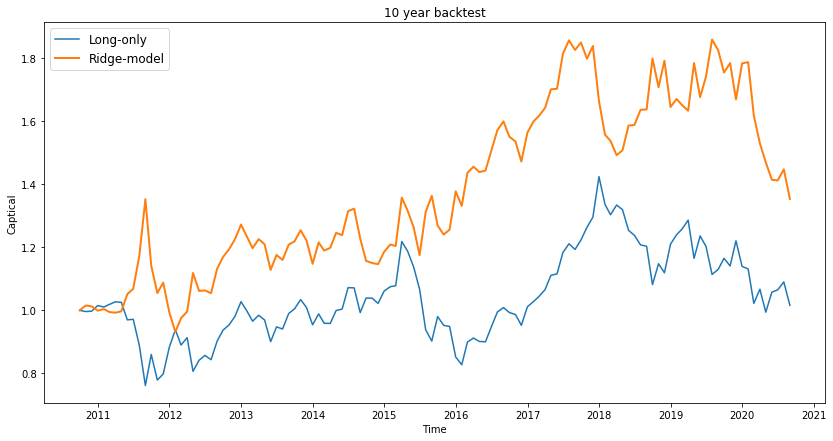

In [616]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='Ridge-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Elastic Net Regression Algorithm + K-Fold Cross-Validation on PnL

In [617]:

target = ['Return-RF']

In [618]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [619]:
def PnL_ElasticNet(x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.ElasticNet(alpha = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [620]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_ElasticNet(data, target, n, lamb):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate PnL
        profit_temp = PnL_ElasticNet(X_train, Y_train, X_valid, Y_valid, lamb)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

### 6 Month Investment

In [621]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [622]:
%%time
# an array for saving 50 final best profit
lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_elasticNet = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_elasticNet = np.append(PnL_elasticNet, kfold_ElasticNet(train_valid, target, 10, lamb))
        
    lambda_selected_elasticNet = lambda_list[PnL_elasticNet.argmax()]
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.ElasticNet(alpha = lambda_selected_elasticNet)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

0  feature coef =  8.41542478329847e-17
1  feature coef =  -3.4478849538136004e-13
2  feature coef =  -9.277508290143674e-06
3  feature coef =  -4.110580938997046e-05
4  feature coef =  2.092614072061587e-05
5  feature coef =  0.0009907864822193203
6  feature coef =  0.001191639911071189
7  feature coef =  0.0058078941516266774
8  feature coef =  -0.007371894999518271
9  feature coef =  0.014442038662606918
10  feature coef =  0.06436940112617064
Returns :
-8%, 8%, 8%, -4%, -10%, -1%, -15%, 10%, 4%, 8%, 2%, 3%, 9%, -5%, -2%, 4%, 10%, 15%, 1%, 13%, Maximum Return:  15.0
Minimum Return:  -15.0
Average Return:  2.0
Standard Deviation:  8.0
320 training days
80 validation days
100 test days
CPU times: user 19.4 s, sys: 170 ms, total: 19.6 s
Wall time: 20.2 s


Text(0, 0.5, 'Quantities')

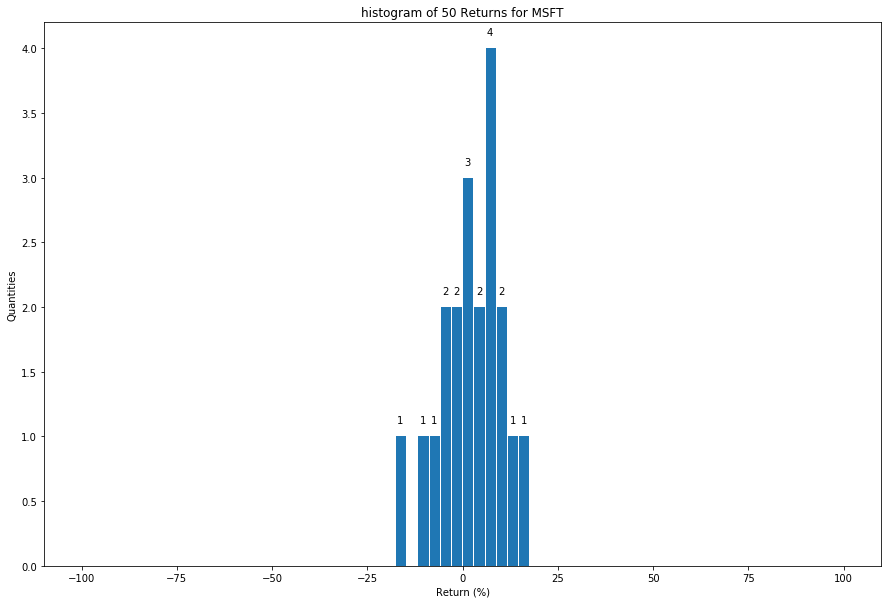

In [623]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


Text(0.5, 1.0, "Distribution of feature' coefficients")

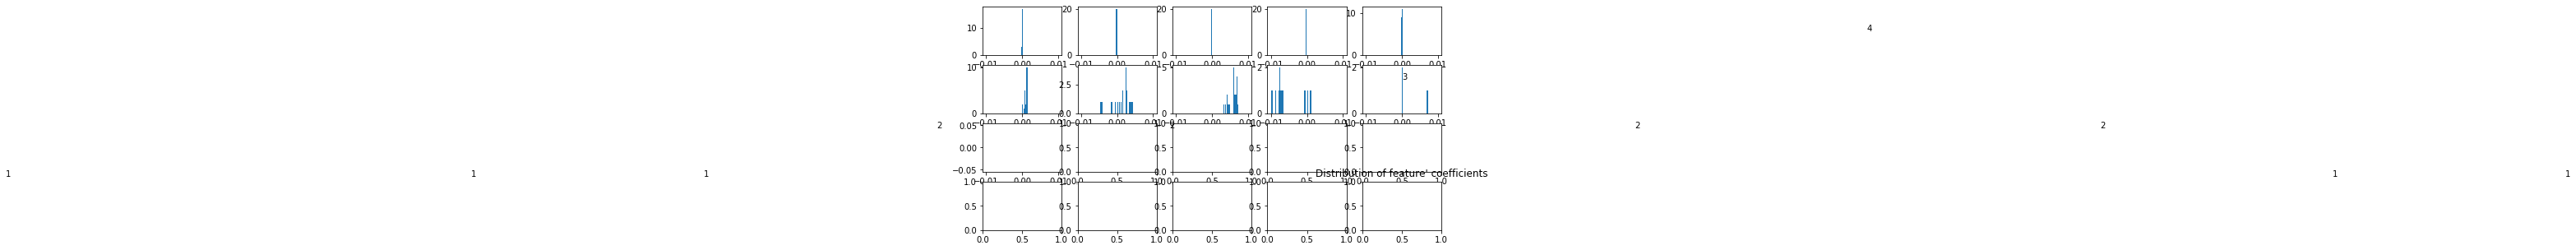

In [624]:
fig, axs = plt.subplots(4,5, figsize=(10, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

bins = np.linspace(-0.01, 0.01, 69)

for i in range(len(model_cv.coef_)):
    axs[i].hist(model_coef[i], bins, histtype='bar', rwidth=0.9)

for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("Distribution of feature' coefficients")

### 10 Year investment

In [625]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [626]:
%%time
# an array for saving 50 final best profit
lambda_list = np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_elasticNet = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_elasticNet = np.append(PnL_elasticNet, kfold_ElasticNet(train_valid, target, 10, lamb))
        
    lambda_selected_elasticNet = lambda_list[PnL_elasticNet.argmax()]
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.ElasticNet(alpha = lambda_selected_elasticNet)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

0  feature coef =  -2.5632290985887866e-16
1  feature coef =  -1.868506601819594e-13
2  feature coef =  -1.0507130773818738e-05
3  feature coef =  -3.221517656892354e-05
4  feature coef =  3.375792391404429e-05
5  feature coef =  0.0005574906343983132
6  feature coef =  0.0033604468789578284
7  feature coef =  0.0041722995693735734
8  feature coef =  -0.013222642752298414
9  feature coef =  0.008607405403846581
10  feature coef =  0.08151541396719326
Returns :
89%, Maximum Return:  89.0
Minimum Return:  89.0
Average Return:  89.0
Standard Deviation:  0.0
320 training days
80 validation days
100 test days
CPU times: user 1.45 s, sys: 18.5 ms, total: 1.47 s
Wall time: 1.88 s


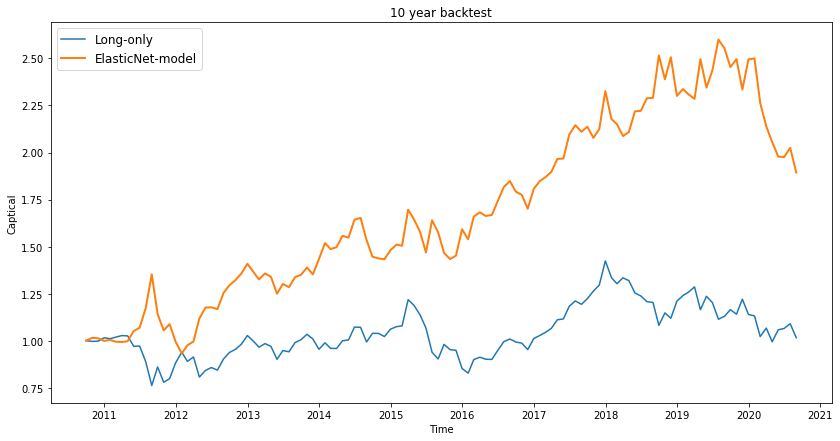

In [627]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='ElasticNet-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Logistic Regression Algorithm (L2 Regularization) + K-Fold Cross-Validation on PnL

In [643]:
BTC['Binary_Return'] = BTC.Return.shape[0]
BTC.Binary_Return[BTC.Return > 0] = 1
BTC.Binary_Return[BTC.Return <= 0] = 0
target = 'Binary_Return'
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -7.536924e+11  0.000000e+00     0.000000   
1989-12-31  -0.029760 -0.029760 -3.012409e+11 -1.026783e+10  -245.044238   
1990-01-31   0.073064  0.073064 -3.091808e+11 -1.393347e+10  -233.764803   
1990-02-28   0.015588  0.015588 -3.274205e+11 -1.578702e+10  -209.058209   
1990-03-31  -0.015349 -0.015349 -3.256557e+11 -1.683151e+10  -186.184164   
1990-04-30   0.062415  0.062415 -3.368477e+11 -1.744244e+10  -174.884168   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.926961e+13  1.996844e+10  -556.196885   
2020-06-30   0.001294  0.001294  1.308078e+13  1.990979e+10  -927.310820   
2020-07-31   0.024840  0.024840  5.441472e+12  2.350734e+10 -1061.029931   
2020-08-31  -0.064843 -0.064843  4.695536e+12  2.046901e+10 -1079.366662   
2020-09-30   0.002830  0.002830  1.014213e+13  1.960148e+10  -867.555417   
2020-10-31   0.085136  0.085136  6.772577e+12  1.904514e+10 -1042.255916   

                    x3         x4         x5        x6        x7        x8  \
Date                                                                         
1989-11-30    0.000000   0.000000   0.000000  0.000000  0.000000 -0.700203   
1989-12-31 -779.499525  24.112443 -15.934445  1.252762 -3.559716 -2.407757   
1990-01-31 -787.736644  30.184579 -16.274190  2.144071 -4.369767  2.687081   
1990-02-28 -790.379537  21.501255 -16.617635  3.485634 -1.964799 -0.886860   
1990-03-31 -791.481732  22.455014 -16.910890  2.916865 -2.501524  0.675281   
1990-04-30 -793.673510  27.225651 -16.666293  2.490157 -3.469548  3.305444   
...                ...        ...        ...       ...       ...       ...   
2020-05-31 -130.176877  19.666785   0.758331 -1.198138 -1.060274  1.286016   
2020-06-30  -26.558050 -32.461109   1.058010 -1.806987 -2.026549 -0.029753   
2020-07-31 -157.626304 -24.008676   2.736966 -1.627047 -1.372136 -2.731883   
2020-08-31  -47.290660 -35.994232   1.189748 -1.641014 -0.858457 -2.250325   
2020-09-30  -62.592288  24.795043   4.537110 -2.514188 -0.546844  4.881653   
2020-10-31  -38.971382   1.473269   4.703134 -1.723587  0.809057 -0.683288   

                  x9       x10       x11       x12  Binary_Return  
Date                                                               
1989-11-30  0.000000  0.000000  1.698846  0.000000              1  
1989-12-31  0.051287  0.322290  1.212774  0.036894              0  
1990-01-31 -0.012440  0.256693 -0.747014 -0.013572              1  
1990-02-28  0.269600  0.381622 -0.591622  0.060557              1  
1990-03-31  0.136014 -0.111725  1.434041  0.062692              0  
1990-04-30 -0.132231 -0.500816  0.281402  0.028224              1  
...              ...   

In [644]:
# Long & Short
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Binary_Return']== 1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        elif df.loc[df.index[i],'Predicted_Binary_Return']== -1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital']
    return df

In [645]:
def PnL_Logistic(Y_valid_Return, x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.LogisticRegression(C = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   
    
    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid_Return.iloc[:].values,
                                  'Binary_Return': Y_valid.iloc[:].values,
                                  'Predicted_Binary_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                   index = Y_valid.index)
    
    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,3]

In [646]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_Logistic(data, target, n, lamb):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation ,opart
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        ## Balance the data for binary perdiction
        up_raw = train[train[target] == 1]
        down_raw = train[train[target] == 0]
        
        print('up_raw = ', up_raw.shape[0])
        print('down_raw = ', down_raw.shape[0])

        if up_raw.shape[0] / down_raw.shape[0] < 1:
        
            percentage = up_raw.shape[0] / down_raw.shape[0]
            down = down_raw.sample(frac=percentage, random_state = 1)
            up = up_raw

            train = up.append(down)

            
        elif up_raw.shape[0] / down_raw.shape[0] >= 1:

            percentage = down_raw.shape[0] / up_raw.shape[0]
            up = up_raw.sample(frac=percentage, random_state = 1)
            down = down_raw

            train = down.append(up)

        print('up = ', train[train[target] == 1].shape[0])
        print('down = ', train[train[target] == 1].shape[0])
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
        Y_valid_Return = valid['Return']
    
        # Calculate PnL
        profit_temp = PnL_Logistic(Y_valid_Return, X_train, Y_train, X_valid, Y_valid, lamb)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

### 6 Month Investment

In [647]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [648]:
%%time
# an array for saving 50 final best profit
lambda_list = 1/np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_logistic = np.append(PnL_logistic, kfold_Logistic(train_valid, target, 10, lamb))
        
    lambda_selected_logistic = lambda_list[PnL_logistic.argmax()]
    
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])

    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)


    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)

    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.LogisticRegression(C = lambda_selected_logistic)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': test['Return'].iloc[:].values,
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,3])

    for j in range(model_cv.coef_.shape[1]):
        model_coef[j][i] = model_cv.coef_[0][j]
        
for i in range(model_cv.coef_.shape[1]):
    print(i,' feature coef = ', model_coef[i].mean())
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  125
down_raw =  100
up =  100
down =  100
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  126
down_raw =  99
up =  99
down =  99
up_raw =  123
down_raw =  102
up =  102
down =  102
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  129
down_raw =  96
up =  96
down =  96
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  125
down_raw =  100
up =  100
down =  100
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  126
down_raw =  99
up =  99
down =  99
up_raw =  123
down_raw =  102
up =  102
down =  102
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  129
down_raw =  96
up =  96
down =  96
up_raw =

Text(0, 0.5, 'Quantities')

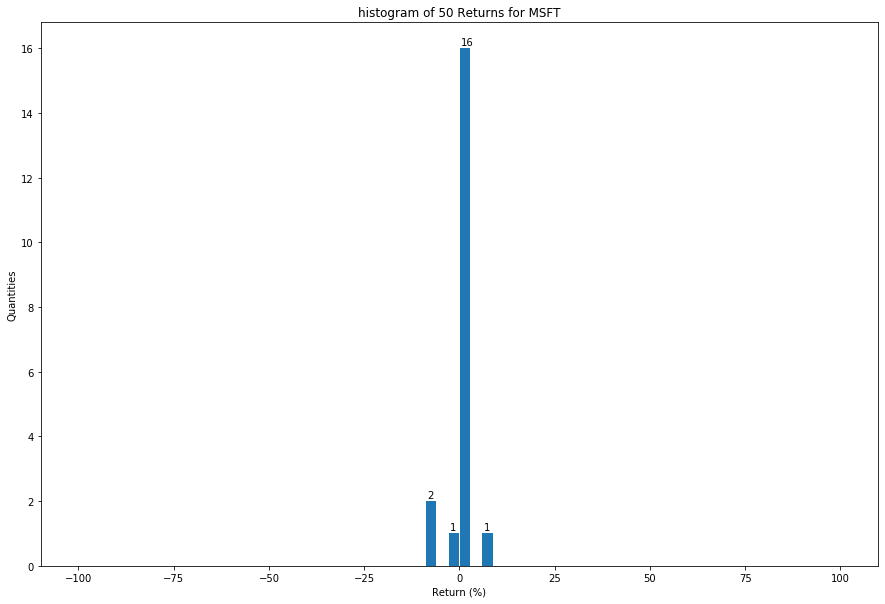

In [649]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


Text(0.5, 1.0, "Distribution of feature' coefficients")

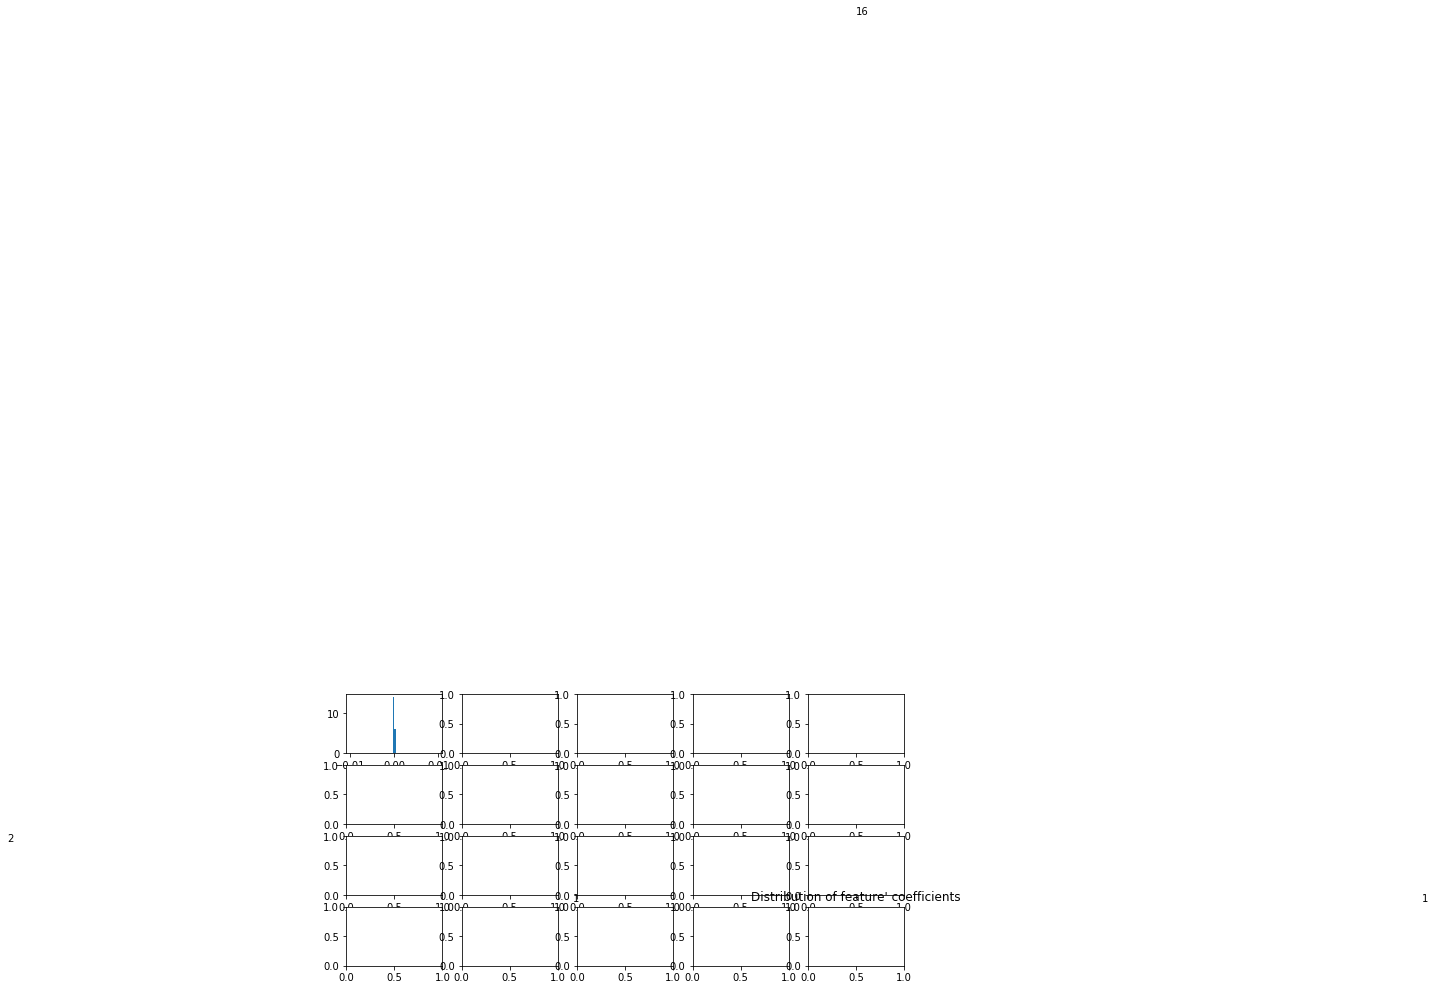

In [650]:
fig, axs = plt.subplots(4,5, figsize=(10, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

bins = np.linspace(-0.01, 0.01, 69)

for i in range(len(model_cv.coef_)):
    axs[i].hist(model_coef[i], bins, histtype='bar', rwidth=0.9)

for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("Distribution of feature' coefficients")

### 10 Year Investment

In [651]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [672]:
%%time
# an array for saving 50 final best profit
lambda_list = 1/np.array([1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_logistic = np.append(PnL_logistic, kfold_Logistic(train_valid, target, 10, lamb))
        
    lambda_selected_logistic = lambda_list[PnL_logistic.argmax()]
    
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])

    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)


    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)

    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.LogisticRegression(C = lambda_selected_logistic)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': test['Return'].iloc[:].values,
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,3])

    for j in range(model_cv.coef_.shape[1]):
        model_coef[j][i] = model_cv.coef_[0][j]
        
for i in range(model_cv.coef_.shape[1]):
    print(i,' feature coef = ', model_coef[i].mean())
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  137
down_raw =  88
up =  88
down =  88
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  137
down_raw =  88
up =  88
down =  88
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  132
down_r

Text(0, 0.5, 'Predicted_Binary_Return')

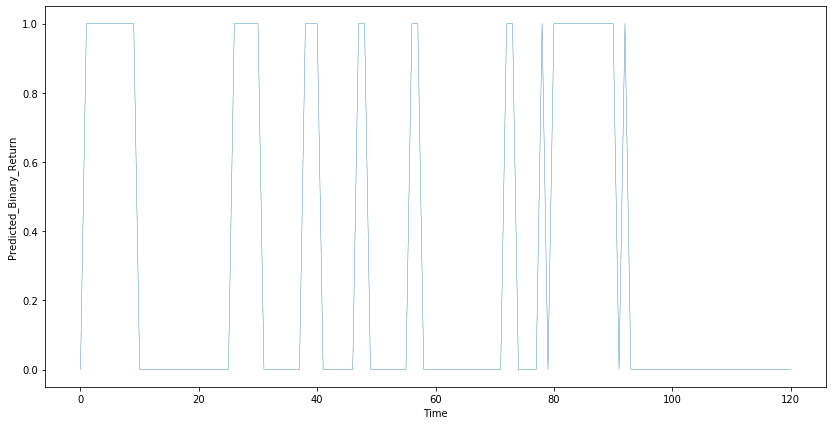

In [673]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Predicted_Binary_Return, lw=0.4, label='Predicted_Binary_Return')
plt.xlabel('Time')
plt.ylabel('Predicted_Binary_Return')

Text(0, 0.5, 'Binary_Return')

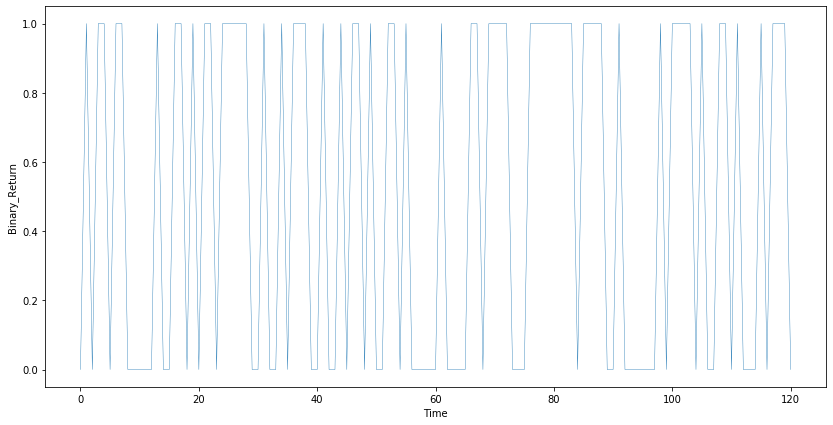

In [674]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Binary_Return, lw=0.4, label='Binary_Return')
plt.xlabel('Time')
plt.ylabel('Binary_Return')

Text(0, 0.5, 'Return')

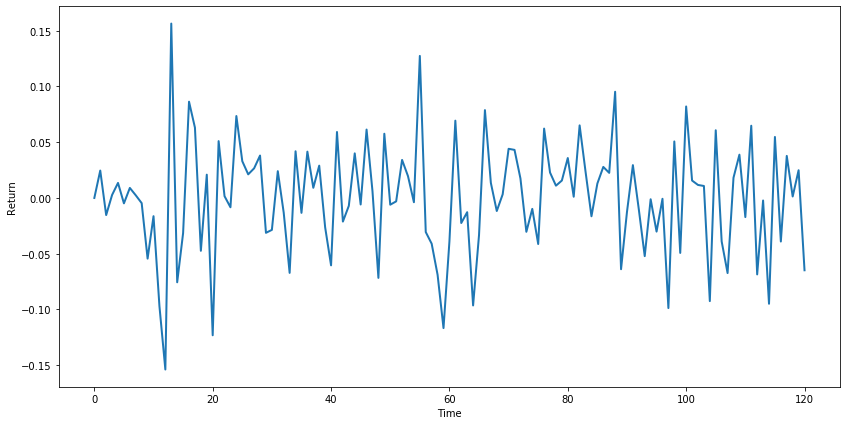

In [675]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Return, lw=2, label='Return')
plt.xlabel('Time')
plt.ylabel('Return')

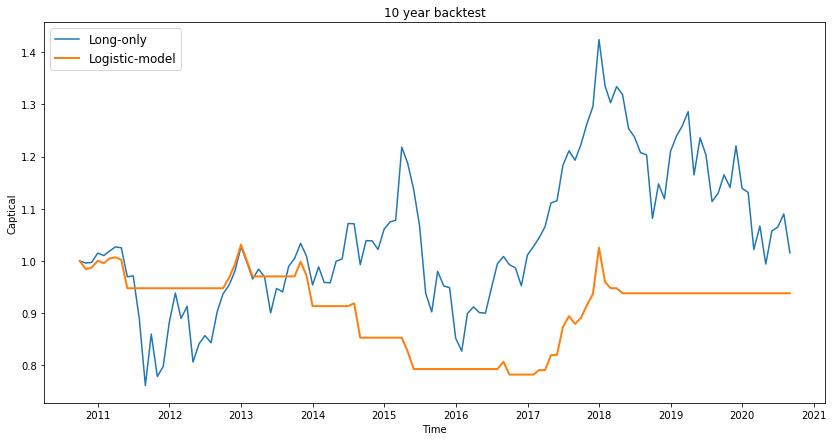

In [676]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='Logistic-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

# Support Vector Machine + K-Fold Cross-Validation on PnL

In [657]:

target = ['Return-RF']

In [658]:
BTC['Binary_Return'] = BTC.Return.shape[0]
BTC.Binary_Return[BTC.Return > 0] = 1
BTC.Binary_Return[BTC.Return <= 0] = 0
target = 'Binary_Return'
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -7.536924e+11  0.000000e+00     0.000000   
1989-12-31  -0.029760 -0.029760 -3.012409e+11 -1.026783e+10  -245.044238   
1990-01-31   0.073064  0.073064 -3.091808e+11 -1.393347e+10  -233.764803   
1990-02-28   0.015588  0.015588 -3.274205e+11 -1.578702e+10  -209.058209   
1990-03-31  -0.015349 -0.015349 -3.256557e+11 -1.683151e+10  -186.184164   
1990-04-30   0.062415  0.062415 -3.368477e+11 -1.744244e+10  -174.884168   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.926961e+13  1.996844e+10  -556.196885   
2020-06-30   0.001294  0.001294  1.308078e+13  1.990979e+10  -927.310820   
2020-07-31   0.024840  0.024840  5.441472e+12  2.350734e+10 -1061.029931   
2020-08-31  -0.064843 -0.064843  4.695536e+12  2.046901e+10 -1079.366662   
2020-09-30   0.002830  0.002830  1.014213e+13  1.960148e+10  -867.555417   
2020-10-31   0.085136  0.085136  6.772577e+12  1.904514e+10 -1042.255916   

                    x3         x4         x5        x6        x7        x8  \
Date                                                                         
1989-11-30    0.000000   0.000000   0.000000  0.000000  0.000000 -0.700203   
1989-12-31 -779.499525  24.112443 -15.934445  1.252762 -3.559716 -2.407757   
1990-01-31 -787.736644  30.184579 -16.274190  2.144071 -4.369767  2.687081   
1990-02-28 -790.379537  21.501255 -16.617635  3.485634 -1.964799 -0.886860   
1990-03-31 -791.481732  22.455014 -16.910890  2.916865 -2.501524  0.675281   
1990-04-30 -793.673510  27.225651 -16.666293  2.490157 -3.469548  3.305444   
...                ...        ...        ...       ...       ...       ...   
2020-05-31 -130.176877  19.666785   0.758331 -1.198138 -1.060274  1.286016   
2020-06-30  -26.558050 -32.461109   1.058010 -1.806987 -2.026549 -0.029753   
2020-07-31 -157.626304 -24.008676   2.736966 -1.627047 -1.372136 -2.731883   
2020-08-31  -47.290660 -35.994232   1.189748 -1.641014 -0.858457 -2.250325   
2020-09-30  -62.592288  24.795043   4.537110 -2.514188 -0.546844  4.881653   
2020-10-31  -38.971382   1.473269   4.703134 -1.723587  0.809057 -0.683288   

                  x9       x10       x11       x12  Binary_Return  
Date                                                               
1989-11-30  0.000000  0.000000  1.698846  0.000000              1  
1989-12-31  0.051287  0.322290  1.212774  0.036894              0  
1990-01-31 -0.012440  0.256693 -0.747014 -0.013572              1  
1990-02-28  0.269600  0.381622 -0.591622  0.060557              1  
1990-03-31  0.136014 -0.111725  1.434041  0.062692              0  
1990-04-30 -0.132231 -0.500816  0.281402  0.028224              1  
...              ...   

In [659]:
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -7.536924e+11  0.000000e+00     0.000000   
1989-12-31  -0.029760 -0.029760 -3.012409e+11 -1.026783e+10  -245.044238   
1990-01-31   0.073064  0.073064 -3.091808e+11 -1.393347e+10  -233.764803   
1990-02-28   0.015588  0.015588 -3.274205e+11 -1.578702e+10  -209.058209   
1990-03-31  -0.015349 -0.015349 -3.256557e+11 -1.683151e+10  -186.184164   
1990-04-30   0.062415  0.062415 -3.368477e+11 -1.744244e+10  -174.884168   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.926961e+13  1.996844e+10  -556.196885   
2020-06-30   0.001294  0.001294  1.308078e+13  1.990979e+10  -927.310820   
2020-07-31   0.024840  0.024840  5.441472e+12  2.350734e+10 -1061.029931   
2020-08-31  -0.064843 -0.064843  4.695536e+12  2.046901e+10 -1079.366662   
2020-09-30   0.002830  0.002830  1.014213e+13  1.960148e+10  -867.555417   
2020-10-31   0.085136  0.085136  6.772577e+12  1.904514e+10 -1042.255916   

                    x3         x4         x5        x6        x7        x8  \
Date                                                                         
1989-11-30    0.000000   0.000000   0.000000  0.000000  0.000000 -0.700203   
1989-12-31 -779.499525  24.112443 -15.934445  1.252762 -3.559716 -2.407757   
1990-01-31 -787.736644  30.184579 -16.274190  2.144071 -4.369767  2.687081   
1990-02-28 -790.379537  21.501255 -16.617635  3.485634 -1.964799 -0.886860   
1990-03-31 -791.481732  22.455014 -16.910890  2.916865 -2.501524  0.675281   
1990-04-30 -793.673510  27.225651 -16.666293  2.490157 -3.469548  3.305444   
...                ...        ...        ...       ...       ...       ...   
2020-05-31 -130.176877  19.666785   0.758331 -1.198138 -1.060274  1.286016   
2020-06-30  -26.558050 -32.461109   1.058010 -1.806987 -2.026549 -0.029753   
2020-07-31 -157.626304 -24.008676   2.736966 -1.627047 -1.372136 -2.731883   
2020-08-31  -47.290660 -35.994232   1.189748 -1.641014 -0.858457 -2.250325   
2020-09-30  -62.592288  24.795043   4.537110 -2.514188 -0.546844  4.881653   
2020-10-31  -38.971382   1.473269   4.703134 -1.723587  0.809057 -0.683288   

                  x9       x10       x11       x12  Binary_Return  
Date                                                               
1989-11-30  0.000000  0.000000  1.698846  0.000000              1  
1989-12-31  0.051287  0.322290  1.212774  0.036894              0  
1990-01-31 -0.012440  0.256693 -0.747014 -0.013572              1  
1990-02-28  0.269600  0.381622 -0.591622  0.060557              1  
1990-03-31  0.136014 -0.111725  1.434041  0.062692              0  
1990-04-30 -0.132231 -0.500816  0.281402  0.028224              1  
...              ...   

In [660]:
# Long & Short
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Binary_Return']== 1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        elif df.loc[df.index[i],'Predicted_Binary_Return']== -1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital']
    return df

In [661]:
def PnL_SVM(Y_valid_Return, x_train, y_train, x_valid, y_valid, lamb, c):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    svc_rbf = SVC(kernel='rbf', C=c, gamma=lamb)
    Y_valid_fit =svc_rbf.fit(X_train, Y_train).predict(X_valid)
     
    
    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid_Return.iloc[:].values,
                                  'Binary_Return': Y_valid.iloc[:].values,
                                  'Predicted_Binary_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                   index = Y_valid.index)
    
    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,3]

In [662]:
def kfold_SVM(data, target, n, lamb,c ):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation ,opart
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        ## Balance the data for binary perdiction
        up_raw = train[train[target] == 1]
        down_raw = train[train[target] == 0]

        print('up_raw = ', up_raw.shape[0])
        print('down_raw = ', down_raw.shape[0])

        if up_raw.shape[0] / down_raw.shape[0] < 1:

            percentage = up_raw.shape[0] / down_raw.shape[0]
            down = down_raw.sample(frac=percentage, random_state = 1)
            up = up_raw

            train = up.append(down)


        elif up_raw.shape[0] / down_raw.shape[0] >= 1:

            percentage = down_raw.shape[0] / up_raw.shape[0]
            up = up_raw.sample(frac=percentage, random_state = 1)
            down = down_raw

            train = down.append(up)
        
        print('up = ', train[train[target] == 1].shape[0])
        print('down = ', train[train[target] == 1].shape[0])
        
        # extract X and Y to be fit in a model
        X_train = train.drop(target, axis = 1).drop('Return', axis = 1)
        Y_train = train[target]        
        X_valid = valid.drop(target, axis = 1).drop('Return', axis = 1)
        Y_valid = valid[target]
        Y_valid_Return = valid['Return']
    
        # Calculate PnL
        profit_temp = PnL_SVM(Y_valid_Return, X_train, Y_train, X_valid, Y_valid, lamb, c)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

### 6 Month Investment

In [663]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [664]:
# an array for saving 50 final best profit
lambda_list = np.array([ 2**(-11), 2**(-7), 2**(-3), 2**(-1), 2**(1), 2**(3)]) 
C_list = np.array([ 2**(-3), 2**(-1), 2**(1), 2**(3), 2**(5), 2**(9), 2**(13)])      
profit_final = np.array([])


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    Best_Inner_SVM_Profit = np.array([])
    Best_C = np.array([])
    for lamb in lambda_list:
        Inner_SVM_Profit= np.array([])
        for c in C_list:
            Inner_SVM_Profit = np.append(Inner_SVM_Profit, kfold_SVM(train_valid, target, 10, lamb, c ))
        Best_Inner_SVM_Profit = np.append(Best_Inner_SVM_Profit,Inner_SVM_Profit[np.argmax(Inner_SVM_Profit)])
        Best_C = np.append(Best_C,np.argmax(Inner_SVM_Profit))
    
    lamb_selected = lambda_list[Best_Inner_SVM_Profit.argmax()]
    C_selected = Best_C[np.argmax(Best_Inner_SVM_Profit)]
    C_selected = C_selected.astype(int)
    C_selected_1 = C_list[C_selected]
    
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])

    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)


    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)

    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid.drop(target, axis = 1).drop('Return', axis = 1)
    Y_cv = train_valid[target]

    X_test_cv = test.drop(target, axis = 1).drop('Return', axis = 1)
    Y_test_cv = test[target]
    
    svc_rbf = SVC(kernel='rbf', C=C_selected_1, gamma =lamb_selected)
    svc_rbf.fit(X_cv, Y_cv)
    Y_test_cv_fit = svc_rbf.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': test['Return'].iloc[:].values,
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,3])

profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')

print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  125
down_raw =  100
up =  100
down =  100
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  126
down_raw =  99
up =  99
down =  99
up_raw =  123
down_raw =  102
up =  102
down =  102
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  129
down_raw =  96
up =  96
down =  96
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  125
down_raw =  100
up =  100
down =  100
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  126
down_raw =  99
up =  99
down =  99
up_raw =  123
down_raw =  102
up =  102
down =  102
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  129
down_raw =  96
up =  96
down =  96
up_raw =

Text(0, 0.5, 'Quantities')

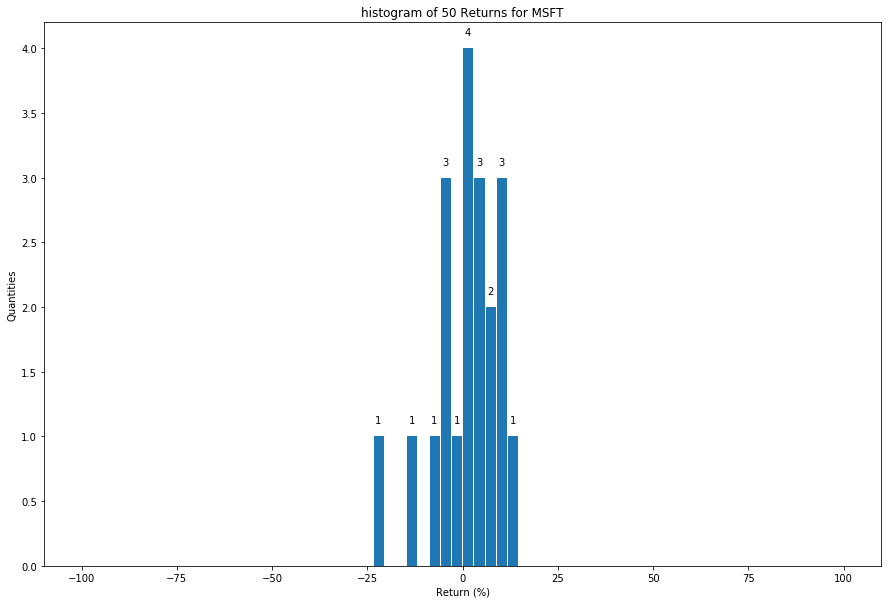

In [665]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


### 10 Year Investment

In [666]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [677]:
# an array for saving 50 final best profit
lambda_list = np.array([ 2**(-11), 2**(-7), 2**(-3), 2**(-1), 2**(1), 2**(3)]) 
C_list = np.array([ 2**(-3), 2**(-1), 2**(1), 2**(3), 2**(5), 2**(9), 2**(13)])      
profit_final = np.array([])


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    Best_Inner_SVM_Profit = np.array([])
    Best_C = np.array([])
    for lamb in lambda_list:
        Inner_SVM_Profit= np.array([])
        for c in C_list:
            Inner_SVM_Profit = np.append(Inner_SVM_Profit, kfold_SVM(train_valid, target, 10, lamb, c ))
        Best_Inner_SVM_Profit = np.append(Best_Inner_SVM_Profit,Inner_SVM_Profit[np.argmax(Inner_SVM_Profit)])
        Best_C = np.append(Best_C,np.argmax(Inner_SVM_Profit))
    
    lamb_selected = lambda_list[Best_Inner_SVM_Profit.argmax()]
    C_selected = Best_C[np.argmax(Best_Inner_SVM_Profit)]
    C_selected = C_selected.astype(int)
    C_selected_1 = C_list[C_selected]
    
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])

    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)


    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)

    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid.drop(target, axis = 1).drop('Return', axis = 1)
    Y_cv = train_valid[target]

    X_test_cv = test.drop(target, axis = 1).drop('Return', axis = 1)
    Y_test_cv = test[target]
    
    svc_rbf = SVC(kernel='rbf', C=C_selected_1, gamma =lamb_selected)
    svc_rbf.fit(X_cv, Y_cv)
    Y_test_cv_fit = svc_rbf.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': test['Return'].iloc[:].values,
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,3])

profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')

print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  137
down_raw =  88
up =  88
down =  88
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  132
down_raw =  93
up =  93
down =  93
up_raw =  135
down_raw =  90
up =  90
down =  90
up_raw =  137
down_raw =  88
up =  88
down =  88
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  130
down_raw =  95
up =  95
down =  95
up_raw =  131
down_raw =  94
up =  94
down =  94
up_raw =  134
down_raw =  91
up =  91
down =  91
up_raw =  132
down_r

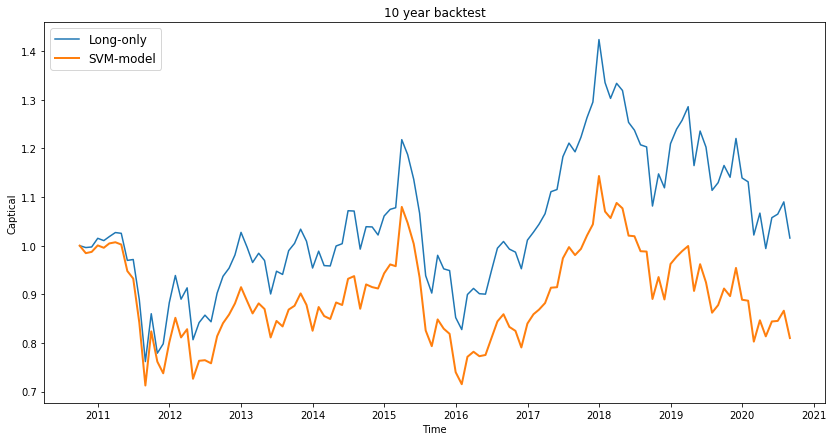

In [678]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='SVM-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

Text(0, 0.5, 'Predicted_Binary_Return')

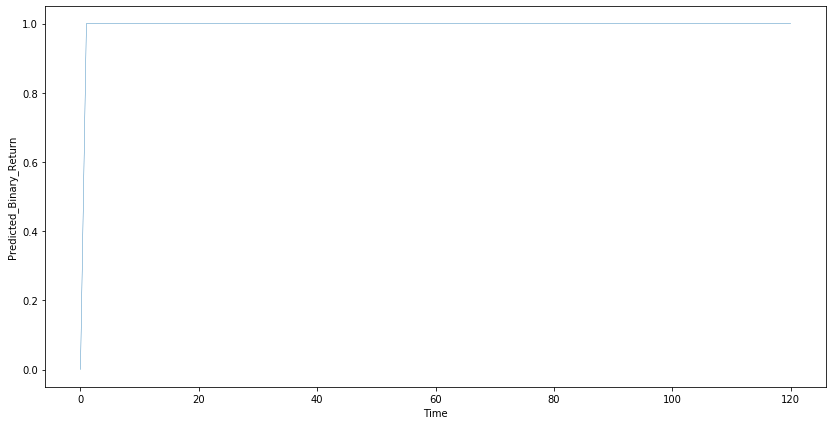

In [679]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Predicted_Binary_Return, lw=0.4, label='Predicted_Binary_Return')
plt.xlabel('Time')
plt.ylabel('Predicted_Binary_Return')

# Random Forest + K-Fold Cross-Validation on PnL

In [630]:
BTC['Binary_Return'] = BTC.Return.shape[0]
BTC.Binary_Return[BTC.Return > 0] = 1
BTC.Binary_Return[BTC.Return <= 0] = 0
target = 'Binary_Return'
BTC

Open          High           Low         Close    RF  \
Date                                                                       
1989-11-30   2748.000000   2962.000000   2735.000000   2836.600098  0.69   
1989-12-31   2836.000000   2889.000000   2732.000000   2751.600098  0.61   
1990-01-31   2751.000000   2982.000000   2697.000000   2952.000000  0.57   
1990-02-28   2951.000000   3027.000000   2862.000000   2997.000000  0.57   
1990-03-31   2997.000000   3073.000000   2931.000000   2951.000000  0.64   
1990-04-30   2948.000000   3137.000000   2906.000000   3132.000000  0.69   
...                  ...           ...           ...           ...   ...   
2020-05-31  23539.910156  25303.779297  23539.910156  24427.189453  0.01   
2020-06-30  24563.570312  26782.619141  24526.910156  24595.349609  0.01   
2020-07-31  24566.810547  25847.109375  24167.789062  25177.050781  0.01   
2020-08-31  25085.669922  25254.140625  23124.250000  23459.050781  0.01   
2020-09-30  24039.390625  24970.589844  23674.519531  24107.419922  0.01   
2020-10-31  24274.830078  27040.410156  24232.660156  26341.490234  0.01   

            Return-RF    Return            x0            x1           x2  \
Date                                                                       
1989-11-30   0.032242  0.032242 -7.536924e+11  0.000000e+00     0.000000   
1989-12-31  -0.029760 -0.029760 -3.012409e+11 -1.026783e+10  -245.044238   
1990-01-31   0.073064  0.073064 -3.091808e+11 -1.393347e+10  -233.764803   
1990-02-28   0.015588  0.015588 -3.274205e+11 -1.578702e+10  -209.058209   
1990-03-31  -0.015349 -0.015349 -3.256557e+11 -1.683151e+10  -186.184164   
1990-04-30   0.062415  0.062415 -3.368477e+11 -1.744244e+10  -174.884168   
...               ...       ...           ...           ...          ...   
2020-05-31   0.037693  0.037693  1.926961e+13  1.996844e+10  -556.196885   
2020-06-30   0.001294  0.001294  1.308078e+13  1.990979e+10  -927.310820   
2020-07-31   0.024840  0.024840  5.441472e+12  2.350734e+10 -1061.029931   
2020-08-31  -0.064843 -0.064843  4.695536e+12  2.046901e+10 -1079.366662   
2020-09-30   0.002830  0.002830  1.014213e+13  1.960148e+10  -867.555417   
2020-10-31   0.085136  0.085136  6.772577e+12  1.904514e+10 -1042.255916   

                    x3         x4         x5        x6        x7        x8  \
Date                                                                         
1989-11-30    0.000000   0.000000   0.000000  0.000000  0.000000 -0.700203   
1989-12-31 -779.499525  24.112443 -15.934445  1.252762 -3.559716 -2.407757   
1990-01-31 -787.736644  30.184579 -16.274190  2.144071 -4.369767  2.687081   
1990-02-28 -790.379537  21.501255 -16.617635  3.485634 -1.964799 -0.886860   
1990-03-31 -791.481732  22.455014 -16.910890  2.916865 -2.501524  0.675281   
1990-04-30 -793.673510  27.225651 -16.666293  2.490157 -3.469548  3.305444   
...                ...        ...        ...       ...       ...       ...   
2020-05-31 -130.176877  19.666785   0.758331 -1.198138 -1.060274  1.286016   
2020-06-30  -26.558050 -32.461109   1.058010 -1.806987 -2.026549 -0.029753   
2020-07-31 -157.626304 -24.008676   2.736966 -1.627047 -1.372136 -2.731883   
2020-08-31  -47.290660 -35.994232   1.189748 -1.641014 -0.858457 -2.250325   
2020-09-30  -62.592288  24.795043   4.537110 -2.514188 -0.546844  4.881653   
2020-10-31  -38.971382   1.473269   4.703134 -1.723587  0.809057 -0.683288   

                  x9       x10       x11       x12  Binary_Return  
Date                                                               
1989-11-30  0.000000  0.000000  1.698846  0.000000              1  
1989-12-31  0.051287  0.322290  1.212774  0.036894              0  
1990-01-31 -0.012440  0.256693 -0.747014 -0.013572              1  
1990-02-28  0.269600  0.381622 -0.591622  0.060557              1  
1990-03-31  0.136014 -0.111725  1.434041  0.062692              0  
1990-04-30 -0.132231 -0.500816  0.281402  0.028224              1  
...              ...   

In [631]:
# Long & Short
def computation(df):
    for i in range(1,len(df)):
        if i == 1:
            df.loc[df.index[i],'Capital'] = 1
        elif df.loc[df.index[i],'Predicted_Binary_Return']== 1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        elif df.loc[df.index[i],'Predicted_Binary_Return']== -1:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital']
    return df

In [632]:
def Random_Forest(Y_valid_Return, x_train, y_train, x_valid, y_valid, Confident, depth,impurity):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    
    model = RandomForestClassifier( max_depth=depth, min_impurity_decrease=impurity )
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict_proba(X_valid)  
    Y_valid_fit = Y_valid_fit[:,1]
    
    
    n_days = len(Y_valid_fit)
    cash = 1
    stock = 0

    position = []

    for d in range(0, n_days):

        # Long if spread < lower band & if not bought yet
        if Y_valid_fit[d] > 0.50+Confident[0]and cash == 1:
            signal = 1
            cash = 0
            stock = 1
            position.append(signal)


        # Take Profit if spread > moving average & if already bought
        elif (Y_valid_fit[d] < 0.50+Confident[1] ) and stock == 1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        # Short if spread > upper band and no current position
        elif Y_valid_fit[d] < 0.50-Confident[0] and cash == 1:
            signal = -1
            cash = 0
            stock = -1
            position.append(signal)


        # Take Profit if spread < moving average & if already short
        elif (Y_valid_fit[d] > 0.50-Confident[1] ) and stock == -1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        else:
            signal = 0
            position.append(signal)

    df = pd.DataFrame()
            
    df['Position'] = position
    df['Position'] = df['Position'].replace(to_replace=0, method= 'ffill')
    df['Position'] = df['Position'].replace(3,0)

    Y_valid_fit = df['Position'].values
    
    
    
    
    print(model.classes_)
    print(Y_valid_fit)
    
    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid_Return.iloc[:].values,
                                  'Binary_Return': Y_valid.iloc[:].values,
                                  'Predicted_Binary_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                   index = Y_valid.index)
    
    cols = ['Return', 'Binary_Return', 'Predicted_Binary_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,0,1]).reshape(-1,4),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,3]

In [633]:
def kfold_randomForest(data, target, n, Confident, depth, impurity):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation ,opart
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        ## Balance the data for binary perdiction
        up_raw = train[train[target] == 1]
        down_raw = train[train[target] == 0]
        
        print('up_raw = ', up_raw.shape[0])
        print('down_raw = ', down_raw.shape[0])
        
        
        if up_raw.shape[0] / down_raw.shape[0] < 1:
        
            percentage = up_raw.shape[0] / down_raw.shape[0]
            down = down_raw.sample(frac=percentage, random_state = 1)
            up = up_raw

            train = up.append(down)
            
        elif up_raw.shape[0] / down_raw.shape[0] >= 1:
            
            percentage = down_raw.shape[0] / up_raw.shape[0]
            up = up_raw.sample(frac=percentage, random_state = 1)
            down = down_raw

            train = down.append(up)
            

        print('up = ', train[train[target] == 1].shape[0])
        print('down = ', train[train[target] == 1].shape[0])
            
            
            
            

        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
        Y_valid_Return = valid['Return']
        
    
        # Calculate PnL
        profit_temp = Random_Forest(Y_valid_Return, X_train, Y_train, X_valid, Y_valid, Confident, depth,impurity)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

In [634]:
np.arange(0.0, 1.0, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

### 6 Month Investment

In [635]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

116

In [636]:
# an array for saving 50 final best profit
# depth_list = np.random.randint(1, high=10, size=3)
# impurity_list = np.random.uniform(0, high=0.1, size = 5)
depth_list = [2, 15]
impurity_list = [0.0]
profit_final = np.array([])
Confident = [0.00,0.00]


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    Best_Inner_RandomForest_Profit = np.array([])
    Best_Impurity = np.array([])
    for depth in depth_list:
        Inner_RandomForest_Profit= np.array([])
        for impurity in impurity_list:
            Inner_RandomForest_Profit = np.append(Inner_RandomForest_Profit, kfold_randomForest(train_valid, target, 4, Confident, depth, impurity ))
        Best_Inner_RandomForest_Profit = np.append(Best_Inner_RandomForest_Profit,Inner_RandomForest_Profit[np.argmax(Inner_RandomForest_Profit)])
        Best_Impurity = np.append(Best_Impurity,np.argmax(Inner_RandomForest_Profit))
    
    depth_selected = depth_list[Best_Inner_RandomForest_Profit.argmax()]
    Impurity_selected = Best_Impurity[np.argmax(Best_Inner_RandomForest_Profit)]
    Impurity_selected = Impurity_selected.astype(int)
    Impurity_selected_1 = impurity_list[Impurity_selected]
    
    print('depth_selected = ', depth_selected)
    print('Impurity_selected = ', Impurity_selected_1)
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])


    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)

    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)


    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = RandomForestClassifier( max_depth=depth_selected, min_impurity_decrease=Impurity_selected_1 )
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict_proba(X_test_cv)
    Y_test_cv_fit = Y_test_cv_fit[:,1]
    
    
    
    

    n_days = len(Y_test_cv_fit)
    cash = 1
    stock = 0

    position = []

    for d in range(0, n_days):

        # Long if spread < lower band & if not bought yet
        if Y_test_cv_fit[d] > 0.50+Confident[0] and cash == 1:
            signal = 1
            cash = 0
            stock = 1
            position.append(signal)


        # Take Profit if spread > moving average & if already bought
        elif (Y_test_cv_fit[d] < 0.50+Confident[1] ) and stock == 1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        # Short if spread > upper band and no current position
        elif Y_test_cv_fit[d] < 0.50-Confident[0] and cash == 1:
            signal = -1
            cash = 0
            stock = -1
            position.append(signal)


        # Take Profit if spread < moving average & if already short
        elif (Y_test_cv_fit[d] > 0.50-Confident[1]) and stock == -1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        else:
            signal = 0
            position.append(signal)

    df = pd.DataFrame()
            
    df['Position'] = position
    df['Position'] = df['Position'].replace(to_replace=0, method= 'ffill')
    df['Position'] = df['Position'].replace(3,0)

    Y_test_cv_fit = df['Position'].values
    
    

    
    
    long_short_df = pd.DataFrame({'Close': test['Close'].values,
                                  'Return': test['Return'].values.tolist(),
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv)),
                                  'Gain': np.zeros(len(Y_test_cv))},
                                  index = Y_test_cv.index)
    
    
    initial = pd.DataFrame(np.array([0,0,0,0,1,0]).reshape(-1,6), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,4])

profit_final = (profit_final - 1)*100

long_short_df['Gain'] = long_short_df['Capital'].values - long_short_df['Capital'] .shift().values

     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')

print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  108
down_raw =  79
up =  79
down =  79
[0 1]
[ 1  1  1  1  1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1  0  1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
up_raw =  110
down_raw =  77
up =  77
down =  77
[0 1]
[-1 -1 -1 -1 -1  0 -1  0  1  1  1  1  1  1  0 -1 -1 -1 -1  0  1  0 -1  0
  1  1  0 -1  0  1  1  1  1  0 -1  0  1  0 -1 -1 -1  0  1  1  1  1  1  1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1  1]
up_raw =  103
down_raw =  85
up =  85
down =  85
[0 1]
[ 1  1  1  1  1  1  0 -1  0 -1  0  1  1  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1  1]
up_raw =  108
down_raw =  80
up =  80
down =  80
[0 1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  0  1  1  1]
up_raw =  108


Text(0, 0.5, 'Quantities')

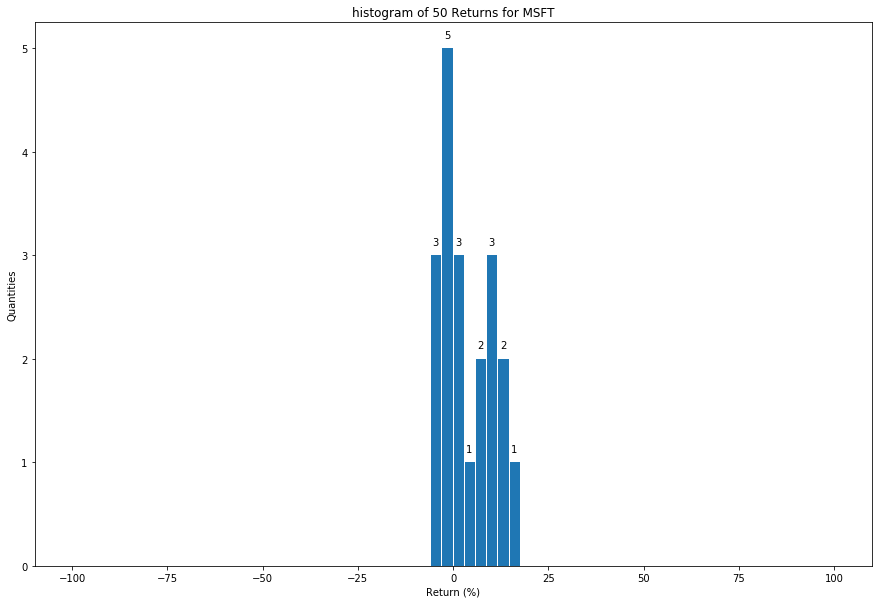

In [637]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


### 10 Year investment

In [638]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

2

In [639]:
# an array for saving 50 final best profit
# depth_list = np.random.randint(1, high=10, size=5)
# impurity_list = np.random.uniform(0, high=0.1, size = 5)
depth_list = [2,5,15]
impurity_list = [0.0]
profit_final = np.array([])
Confident = [0.00,0.00]


for i in range(sample_size):
    
    PnL_logistic = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    Best_Inner_RandomForest_Profit = np.array([])
    Best_Impurity = np.array([])
    for depth in depth_list:
        Inner_RandomForest_Profit= np.array([])
        for impurity in impurity_list:
            Inner_RandomForest_Profit = np.append(Inner_RandomForest_Profit, kfold_randomForest(train_valid, target, 4, Confident, depth, impurity ))
        Best_Inner_RandomForest_Profit = np.append(Best_Inner_RandomForest_Profit,Inner_RandomForest_Profit[np.argmax(Inner_RandomForest_Profit)])
        Best_Impurity = np.append(Best_Impurity,np.argmax(Inner_RandomForest_Profit))
    
    depth_selected = depth_list[Best_Inner_RandomForest_Profit.argmax()]
    Impurity_selected = Best_Impurity[np.argmax(Best_Inner_RandomForest_Profit)]
    Impurity_selected = Impurity_selected.astype(int)
    Impurity_selected_1 = impurity_list[Impurity_selected]
    
    print('depth_selected = ', depth_selected)
    print('Impurity_selected = ', Impurity_selected_1)
    
    ## Balance the data for binary perdiction
    up_raw = train_valid[train_valid[target] == 1]
    down_raw = train_valid[train_valid[target] == 0]

    print('up_raw = ', up_raw.shape[0])
    print('down_raw = ', down_raw.shape[0])


    if up_raw.shape[0] / down_raw.shape[0] < 1:

        percentage = up_raw.shape[0] / down_raw.shape[0]
        down = down_raw.sample(frac=percentage, random_state = 1)
        up = up_raw

        train_valid = up.append(down)

    elif up_raw.shape[0] / down_raw.shape[0] >= 1:

        percentage = down_raw.shape[0] / up_raw.shape[0]
        up = up_raw.sample(frac=percentage, random_state = 1)
        down = down_raw

        train_valid = down.append(up)


    print('up = ', train_valid[train_valid[target] == 1].shape[0])
    print('down = ', train_valid[train_valid[target] == 1].shape[0])
    
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = RandomForestClassifier( max_depth=depth_selected, min_impurity_decrease=Impurity_selected_1 )
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict_proba(X_test_cv)
    Y_test_cv_fit = Y_test_cv_fit[:,1]
    
   
    
    

    n_days = len(Y_test_cv_fit)
    cash = 1
    stock = 0

    position = []

    for d in range(0, n_days):

        # Long if spread < lower band & if not bought yet
        if Y_test_cv_fit[d] > 0.50+Confident[0] and cash == 1:
            signal = 1
            cash = 0
            stock = 1
            position.append(signal)


        # Take Profit if spread > moving average & if already bought
        elif (Y_test_cv_fit[d] < 0.50+Confident[1] ) and stock == 1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        # Short if spread > upper band and no current position
        elif Y_test_cv_fit[d] < 0.50-Confident[0] and cash == 1:
            signal = -1
            cash = 0
            stock = -1
            position.append(signal)


        # Take Profit if spread < moving average & if already short
        elif (Y_test_cv_fit[d] > 0.50-Confident[1]) and stock == -1:
            signal = 3
            cash = 1
            stock = 0
            position.append(signal)

        else:
            signal = 0
            position.append(signal)

    df = pd.DataFrame()
            
    df['Position'] = position
    df['Position'] = df['Position'].replace(to_replace=0, method= 'ffill')
    df['Position'] = df['Position'].replace(3,0)

    Y_test_cv_fit = df['Position'].values
    
    

    
    
    long_short_df = pd.DataFrame({'Close': test['Close'].values,
                                  'Return': test['Return'].values.tolist(),
                                  'Binary_Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Binary_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv)),
                                  'Gain': np.zeros(len(Y_test_cv))},
                                  index = Y_test_cv.index)
    
    
    initial = pd.DataFrame(np.array([0,0,0,0,1,0]).reshape(-1,6), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,4])

profit_final = (profit_final - 1)*100

long_short_df['Gain'] = long_short_df['Capital'].values - long_short_df['Capital'] .shift().values

     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')

print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

up_raw =  111
down_raw =  76
up =  76
down =  76
[0 1]
[ 1  1  0 -1 -1 -1  0  1  1  0 -1 -1  0 -1 -1  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  0  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
up_raw =  111
down_raw =  76
up =  76
down =  76
[0 1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]
up_raw =  114
down_raw =  74
up =  74
down =  74
[0 1]
[-1 -1 -1 -1  0 -1  0 -1 -1  0  1  0 -1 -1 -1  0  1  0  1  0 -1 -1  0  1
  1  0 -1 -1  0 -1  0 -1  0  1  0 -1  0 -1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
up_raw =  108
down_raw =  80
up =  80
down =  80
[0 1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  0
 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  1  0 -1 -1  0  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1  1]
up_raw =  111


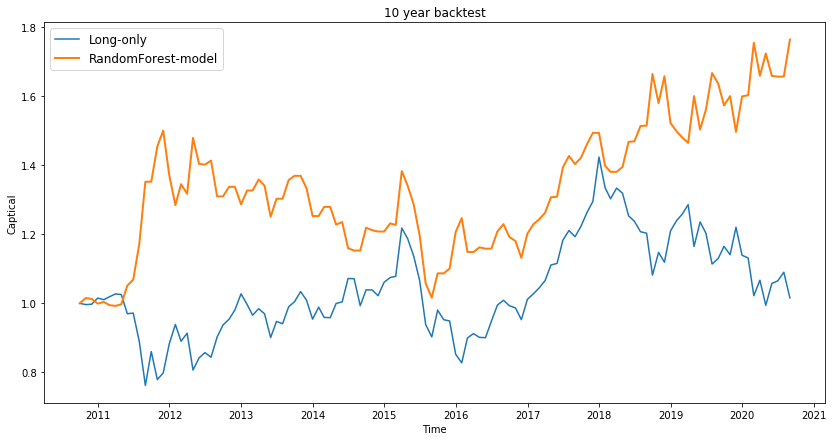

In [640]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(long_short_df_final.Capital[1:], lw=2, label='RandomForest-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

Text(0, 0.5, 'Predicted_Binary_Return')

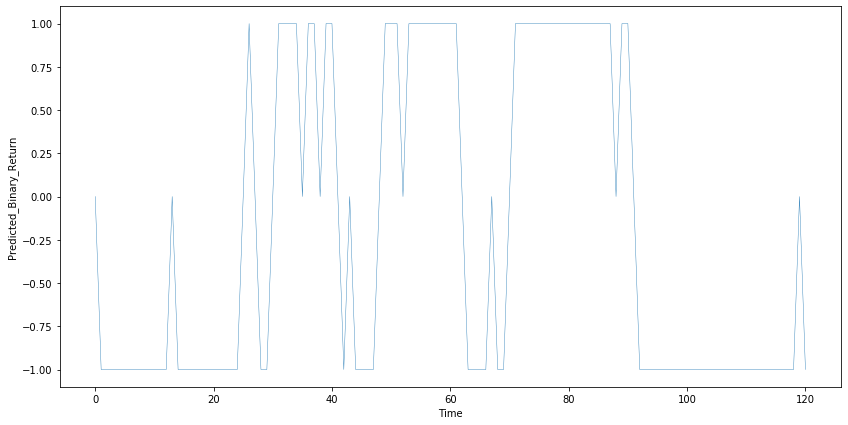

In [641]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Predicted_Binary_Return, lw=0.4, label='Predicted_Binary_Return')
plt.xlabel('Time')
plt.ylabel('Predicted_Binary_Return')

Text(0, 0.5, 'Return')

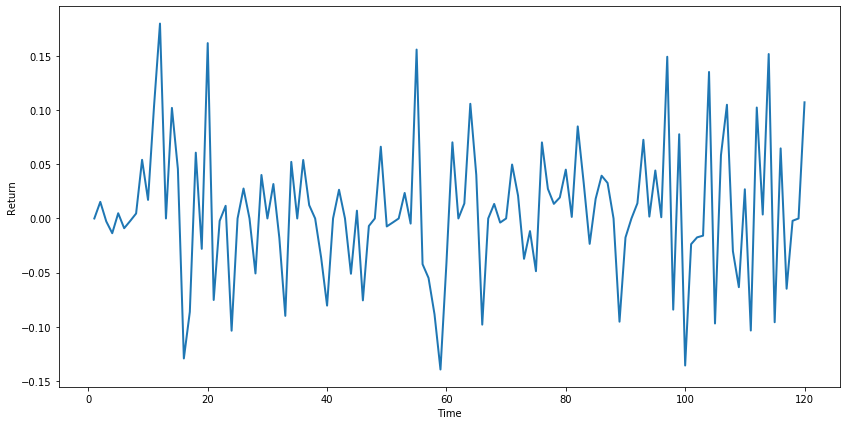

In [642]:
plt.figure(figsize=(14, 7))
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Gain, lw=2, label='Return')
plt.xlabel('Time')
plt.ylabel('Return')

# Neural Networks  (In progress)

In [ ]:
features = ['Mkt-RF','SMB','HML','RMW','CMA','MACD','MACDH','ADX','RSI','BB','ATR','EFI','Volume']
target = ['Return-RF']

In [ ]:
# compute Capital
def computation(df):
    for i in range(1,len(df)):
        if df.loc[df.index[i],'Predicted_Return']>=0:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 + df.loc[df.index[i],'Return'])
        else:
            df.loc[df.index[i],'Capital'] = df.loc[df.index[i-1],'Capital'] * (1 - df.loc[df.index[i],'Return'])
    return df

In [ ]:
def PnL_Lasso(x_train, y_train, x_valid, y_valid, lamb):

    
    # create a linear model
    X_train = x_train
    Y_train = y_train
    X_valid = x_valid
    Y_valid = y_valid
    
    model = linear_model.Lasso(alpha = lamb)
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)   

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted_Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_valid))},
                                 index = Y_valid.index)
    
    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df])

    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    

    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [ ]:
# Build a general function that can perform k-fold Cross Validation on ONE model
# Data: a subset of feature columns plus the target column
# Target: the name of the target column
# n: cut data into n pieces

def kfold_Lasso(data, target, n, lamb):
    # We need a vector to record mse from k-fold
    profit = np.array([]) 
    
    # KFold is a build-in function in Scikit-learn
    #    it can help us cut data into n pieces 
    #    (compare with simple cross validation)
    kf = KFold(n_splits = n)
    
    
    
    for train_index, validation_index in kf.split(data):

        # obtain the train and validation part
        train, valid = data.iloc[train_index,:], data.iloc[validation_index,:]
        
        # extract X and Y to be fit in a model
        X_train = train[features]
        Y_train = train[target]        
        X_valid = valid[features]
        Y_valid = valid[target]
    
        # Calculate PnL
        profit_temp = PnL_Lasso(X_train, Y_train, X_valid, Y_valid, lamb)
        profit = np.append(profit, profit_temp)
        

        
    return profit.mean()

### 6 Month Investment

In [ ]:
fix_history_length = 250  # ~21 year
fix_test_length = 6 # 6 months
sample_size = 20

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

In [ ]:
%%time
# an array for saving 50 final best profit
lambda_list = np.array([1e-5,1e-4, 1e-3])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_lasso = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_lasso = np.append(PnL_lasso, kfold_Lasso(train_valid, target, 10, lamb))
        
    lambda_selected_lasso = lambda_list[PnL_lasso.argmax()]
    
    print('lambda_selected',lambda_selected_lasso)
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Lasso(alpha = lambda_selected_lasso)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

In [772]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(-100, 100, 69)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    if(int(a[0][i]) != 0):
        plt.text(a[1][i]+0.5,a[0][i]+0.1,int(a[0][i]))
plt.title("histogram of 50 Returns for MSFT")
plt.xlabel('Return (%)')
plt.ylabel('Quantities')


### 10 Year Investment

In [ ]:
fix_history_length = 250  # 2~1 Year
fix_test_length = 120 # 10 Year
sample_size = 1

# the range of t
randomRange = len(BTC)-fix_history_length-fix_test_length
randomRange

In [ ]:
%%time
# an array for saving 50 final best profit
lambda_list = np.array([1e-5,1e-4, 1e-3])
profit_final = np.array([])
model_coef = np.zeros((BTC.shape[1],sample_size))

for i in range(sample_size):
    
    PnL_lasso = np.array([])
    np.random.seed(i)
    random_Num =  np.random.randint(randomRange)
    BeginTime = random_Num  
    timestamp = fix_history_length + random_Num
    EndTime = timestamp + fix_test_length
    
    # use BeginTime and EndTime to filter test and train_valid
    train_valid = BTC.iloc[BeginTime:timestamp, : ]
    test = BTC.iloc[timestamp:EndTime, : ]
    
    for lamb in lambda_list:
        PnL_lasso = np.append(PnL_lasso, kfold_Lasso(train_valid, target, 10, lamb))
        
    lambda_selected_lasso = lambda_list[PnL_lasso.argmax()]
    
    print('lambda_selected',lambda_selected_lasso)
    
    X_cv = train_valid[features]
    Y_cv = train_valid[target]

    X_test_cv = test[features]
    Y_test_cv = test[target]
    
    
    model_cv = linear_model.Lasso(alpha = lambda_selected_lasso)
    model_cv.fit(X_cv, Y_cv)
    
    Y_test_cv_fit = model_cv.predict(X_test_cv)
    
    long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                  'Predicted_Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                  'Capital': np.zeros(len(Y_test_cv))},
                                 index = Y_test_cv.index)

    cols = ['Return', 'Predicted_Return', 'Capital']
    long_short_df = long_short_df[cols]
    
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3), 
                           columns = long_short_df.columns)
    long_short_df = pd.concat([initial, long_short_df])
    long_short_df_final = computation(long_short_df)
    
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])
    
    for j in range(len(model_cv.coef_)):
        model_coef[j][i] = model_cv.coef_[j]
        
for i in range(len(model_cv.coef_)):
    print(i,' feature coef = ', model_coef[i].mean())

    
    
profit_final = (profit_final - 1)*100
     
print('Returns :')
for idx, num in enumerate(profit_final):
    print(round(profit_final[idx]), end='%, ')
    
print('Maximum Return: ', np.around(max(profit_final)))
print('Minimum Return: ', np.around(min(profit_final)))
print('Average Return: ', np.around(profit_final.mean()))
print('Standard Deviation: ', np.around(profit_final.std()))
print("320 training days")
print("80 validation days")
print("100 test days")

In [ ]:
# seed is the same at 0 
np.random.seed(0)
random_Num =  np.random.randint(randomRange)
BeginTime = random_Num
timestamp = fix_history_length + random_Num
EndTime = timestamp + fix_test_length

plt.figure(figsize=(14, 7))
plt.plot(BTC['Close'][timestamp:EndTime] / BTC['Close'][timestamp], label = "Long-only")
plt.plot(range(long_short_df_final.shape[0]), long_short_df_final.Capital, lw=2, label='Lasso-model')
plt.xlabel('Time')
plt.ylabel('Captical')
plt.title("10 year backtest")
plt.legend(loc='upper left', fontsize=12)

In [293]:
BBTC >1

Return   MACD  MACDH    ADX    RSI     BB  Binary_Return
201807201300   False  False  False  False  False  False          False
201807201305   False  False  False  False  False  False          False
201807201310   False  False  False  False  False  False          False
201807201315   False  False  False  False  False  False          False
201807201320   False  False  False  False  False  False          False
...              ...    ...    ...    ...    ...    ...            ...
201912241135   False  False  False  False  False  False          False
201912241140   False  False  False  False  False  False          False
201912241145   False  False  False  False  False  False          False
201912241150   False  False  False  False  False  False          False
201912241155   False  False  False  False  False  False          False

[62352 rows x 7 columns]

In [75]:
np.arange(0.0, 1.0, 1)

array([0.])